In [1]:
import pandas as pd  #pacotes
import numpy as np   #calculo numerico
import glob          #listas
#Codigo para declarar um pyarrow parquet - Willian - 29/05/2018
import pyarrow.parquet as pq
#uproot serve para ler a partir o python um arquivo em tree root
#import uproot
import os, sys
from os import path
import datetime
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
%matplotlib inline


In [2]:
%run def_functions.ipynb
%run def_functions_hits.ipynb
%run def_functions_fits.ipynb


In [3]:
list_ON = ['20200824','20200825','20200826','20200827','20200828']
list_ON2 = ['20200826','20200827','20200828','20200829','20200830','20200831','20200901']
list_OFF = ['20200629','20200630','20200701','20200702','20200703']
list_ONA = ['20200615','20200616','20200617','20200618','20200619']
list_ONOFF = ['20200615','20200616','20200617','20200618','20200619','20200620','20200621',
              '20200622','20200623','20200624','20200625','20200626','20200627','20200628',
              '20200629','20200630','20200701','20200702','20200703','20200704','20200705']

list_ONOFF2 = ['20200710','20200715','20200720','20200725',
               '20200801','20200805','20200810','20200815',
               '20200816','20200817','20200818','20200819','20200820',
               '20200821','20200822','20200823','20200824','20200825',
               '20200826','20200827','20200828'
              ]

#chi_sq_tab = 2.366  # chi quadrado tabelado para 3 graus de liberdades com 50%
#chi_sq_tab = 6.251  # chi quadrado tabelado para 3 graus de liberdades com 90%
chi_sq_tab = 7.815  # chi quadrado tabelado para 3 graus de liberdades com 95%
#chi_sq_tab = 10.597  # chi quadrado tabelado para 3 graus de liberdades com 995%
rh, rw = 150, 150
prompt_mean, prompt_var = 61.45215100965759, 1337.7332240825515
delay_mean, delay_var = 94.3970297029703, 4899.284941672385 
time_mean, time_var = 12.70, 12.70
itime_mean, itime_var = 1/12.70, 1/(12.70**2)



        dict = {'Pair': pair[0],
                'p_PMT01': pair[1],  'p_PMT02': pair[2],  'p_PMT03': pair[3],  'p_PMT04': pair[4], 
                'p_PMT05': pair[5],  'p_PMT06': pair[6],  'p_PMT07': pair[7],  'p_PMT08': pair[8], 
                'p_PMT09': pair[9],  'p_PMT10': pair[10], 'p_PMT11': pair[11], 'p_PMT12': pair[12], 
                'p_PMT13': pair[13], 'p_PMT14': pair[14], 'p_PMT15': pair[15], 'p_PMT16': pair[16], 
                'p_PMT17': pair[17], 'p_PMT18': pair[18], 'p_PMT19': pair[19], 'p_PMT20': pair[20], 
                'p_PMT21': pair[21], 'p_PMT22': pair[22], 'p_PMT23': pair[23], 'p_PMT24': pair[24], 
                'p_PMT25': pair[25], 'p_PMT26': pair[26], 'p_PMT27': pair[27], 'p_PMT28': pair[28], 
                'p_PMT29': pair[29], 'p_PMT30': pair[30], 'p_PMT31': pair[31], 'p_PMT32': pair[32], 
                'p_Total_charge': pair[33],'p_Total_pe': pair[34],'p_PDF': pair[35], 'p_mPMTs': pair[36], 
                'p_satured': pair[37],
                'd_PMT01': pair[38], 'd_PMT02': pair[39], 'd_PMT03': pair[40], 'd_PMT04': pair[41], 
                'd_PMT05': pair[42], 'd_PMT06': pair[43], 'd_PMT07': pair[44], 'd_PMT08': pair[45], 
                'd_PMT09': pair[46], 'd_PMT10': pair[47], 'd_PMT11': pair[48], 'd_PMT12': pair[49], 
                'd_PMT13': pair[50], 'd_PMT14': pair[51], 'd_PMT15': pair[52], 'd_PMT16': pair[53], 
                'd_PMT17': pair[54], 'd_PMT18': pair[55], 'd_PMT19': pair[56], 'd_PMT20': pair[57], 
                'd_PMT21': pair[58], 'd_PMT22': pair[59], 'd_PMT23': pair[60], 'd_PMT24': pair[61], 
                'd_PMT25': pair[62], 'd_PMT26': pair[63], 'd_PMT27': pair[64], 'd_PMT28': pair[65], 
                'd_PMT29': pair[66], 'd_PMT30': pair[67], 'd_PMT31': pair[68], 'd_PMT32': pair[69], 
                'd_Total_charge': pair[70],'d_Total_pe': pair[71],'d_PDF': pair[72], 'd_mPMTs': pair[73], 
                'd_satured': pair[74],
                'd_timeInverval': pair[75],'chi_square': pair[76],'t_PDF': pair[77],
                'file_Run': pair[78], 'Event_Number': pair[79]
               }

## Histograma dos Runs pós-processados de pares

### contagem do tempo processado ON, ON2, OFF para calcular o fator alfa

In [ ]:
# Soma dos tempos processados

print('Inicio',datetime.datetime.now())
totalTime_ON = 0
totalTime_ON2 = 0
totalTime_OFF = 0

for sListDt in list_ON:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        totalTime_ON += df['d_timeInverval'].sum()

print('Tempo total ON em us: ', totalTime_ON)

for sListDt in list_ON2:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        totalTime_ON2 += df['d_timeInverval'].sum()

print('Tempo total ON2 em us: ', totalTime_ON2)

for sListDt in list_OFF:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        totalTime_OFF += df['d_timeInverval'].sum()

print('Tempo total OFF em us: ', totalTime_OFF)

print('Inicio',datetime.datetime.now())

In [59]:
print('Tempo total ON em us: ', totalTime_ON/1e6/60)
print('Tempo total ON2 em us: ', totalTime_ON2/1e6/60)
print('Tempo total OFF em us: ', totalTime_OFF/1e6/60)

Tempo total ON em us:  7119.8321076277325
Tempo total ON2 em us:  7120.3068811394705
Tempo total OFF em us:  7120.050944069871


In [26]:
print(chi_sq_tab)

7.815


## Histograma de prompt com chi^2 aceito

### Lista ON - 24/08/2020 a 28/08/2020

In [14]:
print('Inicio',datetime.datetime.now())
h_promptChiON = []
w_promptChiON = []

h_delayChiON = []
w_delayChiON = []

h_timeChiON = []
w_timeChiON = []

totalTime_ON = 0

#lista para mapa ON
h_promptPDFON = []
w_promptPDFON = []

h_delayPDFON = []
w_delayPDFON = []

h_timePDFON = []
w_timePDFON = []

totalNonSaturedON = 0 

print('chi^2 tabelado', chi_sq_tab)

for sListDt in list_ON:
    #print(sListDt)
    #print(sListDt[6:8])
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)
    #print(lista)
    #break

    for file in lista:
        df = pd.read_parquet(file)
        df['chi_2']=((df['p_Total_pe'] - 41)**2)/41 + ((df['d_Total_pe'] - delay_mean)**2)/delay_mean + (((df['d_timeInverval']) - time_mean)**2)/time_var
        #print(file)
        h_promptChiON.extend(df[((df['chi_square']<chi_sq_tab)&
                                 #(df['chi_2']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['p_Total_pe'].values)
        totalTime_ON += df['d_timeInverval'].sum()
        w_promptChiON.extend(df[((df['chi_square']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['p_PDF'].values)
        
        h_delayChiON.extend(df[((df['chi_square']<chi_sq_tab)&
                                #(df['chi_2']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_Total_pe'].values)
        w_delayChiON.extend(df[((df['chi_square']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_PDF'].values)

        h_timeChiON.extend(df[((df['chi_square']<chi_sq_tab)&
                                 #(df['chi_2']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_timeInverval'].values)
        w_timeChiON.extend(df[((df['chi_square']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['t_PDF'].values)

        #h_promptPDFON.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['p_Total_pe'].values)
        #w_promptPDFON.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['p_PDF'].values)

        #h_delayPDFON.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['d_Total_pe'].values)
        #w_delayPDFON.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['d_PDF'].values)

        #h_timePDFON.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['d_timeInverval'].values)
        #w_timePDFON.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['t_PDF'].values)

        totalNonSaturedON += df[((df['p_satured']==0)&(df['d_satured']==0))].count()[0]
        #break
    
    #print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2023-05-15 16:02:49.265151
chi^2 tabelado 7.815
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Fim 2023-05-15 16:19:46.401701


In [15]:
print(totalNonSaturedON/5)

10531376.8


In [16]:
h_promptChiON2 = []
w_promptChiON2 = []
print('Inicio',datetime.datetime.now())
totalTime_ON2 = 0

h_delayChiON2 = []
h_timeChiON2 = []

for sListDt in list_ONA:
    #print(sListDt)
    #print(sListDt[6:8])
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])

    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)
    #print(lista)

    for file in lista:
        df = pd.read_parquet(file)
        #print(file)
        h_promptChiON2.extend(df[((df['chi_square']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['p_Total_pe'].values)
        totalTime_ON2 += df['d_timeInverval'].sum()
        #w_promptChiON2.extend(df[((df['chi_square']<chi_sq_tab)&
         #                        (df['p_satured']==0)&(df['d_satured']==0)
          #                      )]['p_PDF'].values)
        h_delayChiON2.extend(df[((df['chi_square']<chi_sq_tab)
                                 &(df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_Total_pe'].values)
        h_timeChiON2.extend(df[((df['chi_square']<chi_sq_tab)
                                 &(df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_timeInverval'].values)
        #break
    
    #print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2023-05-15 16:20:36.379204
data/20200615
data/20200616
data/20200617
data/20200618
data/20200619
Fim 2023-05-15 16:30:39.784914


### Lista OFF - 29/06/2020 a 03/07/2020

In [17]:
print('Inicio',datetime.datetime.now())
h_promptChiOFF = []
w_promptChiOFF = []

h_delayChiOFF = []
w_delayChiOFF = []

h_timeChiOFF = []
w_timeChiOFF = []

totalTime_OFF = 0

#lista para mapa ON
h_promptPDFOFF = []
w_promptPDFOFF = []

h_delayPDFOFF = []
w_delayPDFOFF = []

h_timePDFOFF = []
w_timePDFOFF = []

totalNonSaturedOFF = 0 

for sListDt in list_OFF:
    #print(sListDt)
    #print(sListDt[6:8])
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    

    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)
    #print(lista)

    #print('Inicio',datetime.datetime.now())

    for file in lista:
        df = pd.read_parquet(file)
        #print(file)
        h_promptChiOFF.extend(df[((df['chi_square']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['p_Total_pe'].values)
        w_promptChiOFF.extend(df[((df['chi_square']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['p_PDF'].values)
        
        totalTime_OFF += df['d_timeInverval'].sum()

        h_delayChiOFF.extend(df[((df['chi_square']<chi_sq_tab)
                                 &(df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_Total_pe'].values)
        w_delayChiOFF.extend(df[((df['chi_square']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_PDF'].values)

        h_timeChiOFF.extend(df[((df['chi_square']<chi_sq_tab)
                                 &(df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_timeInverval'].values)
        w_timeChiOFF.extend(df[((df['chi_square']<chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['t_PDF'].values)

        #h_promptPDFOFF.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['p_Total_pe'].values)
        #w_promptPDFOFF.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['p_PDF'].values)

        #h_delayPDFOFF.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['d_Total_pe'].values)
        #w_delayPDFOFF.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['d_PDF'].values)

        #h_timePDFOFF.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['d_timeInverval'].values)
        #w_timePDFOFF.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
        #                        )]['t_PDF'].values)

        totalNonSaturedOFF += df[((df['p_satured']==0)&(df['d_satured']==0))].count()[0]
        #break
    
    #print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2023-05-15 16:34:02.408217
data/20200629
data/20200630
data/20200701
data/20200702
data/20200703
Fim 2023-05-15 16:50:27.347437


In [18]:
print(totalNonSaturedOFF/5)
print(totalTime_OFF)
print(totalTime_ON)
print(len(h_promptChiOFF))
print(len(h_promptPDFOFF))
print(len(h_promptChiON))
print(len(h_promptPDFON))

10585496.4
427203056644.19226
427189926457.66394
33779
0
32854
0


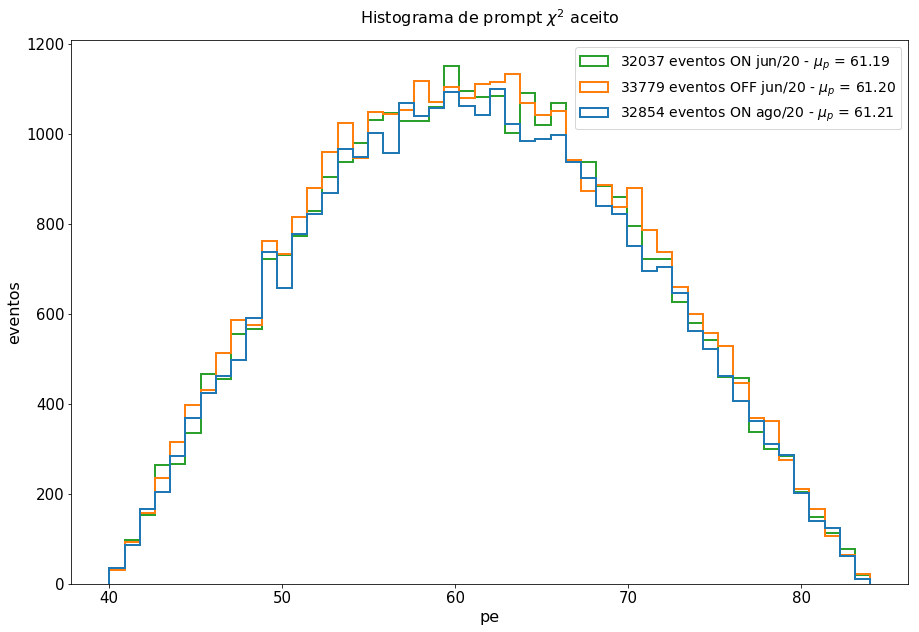

In [47]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 110])
plt.rcParams.update({'font.size': 15})
#ax.set_yscale('log')

#plt.hist(h_promptChiON,#], 
plt.hist([h_promptChiON2,h_promptChiOFF,h_promptChiON],#], 
         #weights=[w_promptChiOFF,w_promptChiON],#w_promptChiON2], ## com ou sem peso ? - 09/11/2021
         bins = 50,histtype='step', linewidth=2) #, density=True)
#plt.hist([h_delayChiON,h_delayChiOFF])
#plt.legend(labels=['Total_p_Charge','Timestamp','Total_p_Charge + Timestamp'],loc='upper right')
plt.legend(labels=[str(len(h_promptChiON2))+' eventos ON jun/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptChiON2)),
                   str(len(h_promptChiOFF))+' eventos OFF jun/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptChiOFF)),
                   str(len(h_promptChiON))+' eventos ON ago/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptChiON))],
                  #str(len(h_promptChiON))+' eventos ON ago/20 - media = {0:.2f}'.format(np.average(h_promptChiON,weights=w_promptChiON))],
                  #str(len(h_promptChiON2))+' eventos ON set/20 - media = {0:.2f}'.format(np.average(h_promptChiON2,weights=w_promptChiON2))],
           loc='upper right', fontsize=14)
plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de prompt $\chi^2$ aceito', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Prompt_chi2_Aceito_w.png')
#plt.savefig('histogramas/Hist_Prompt_w.png')
plt.savefig('histogramas/Hist_Prompt_chi2_Aceito.png')
plt.show() 

## Histograma de delay com chi^2 aceito

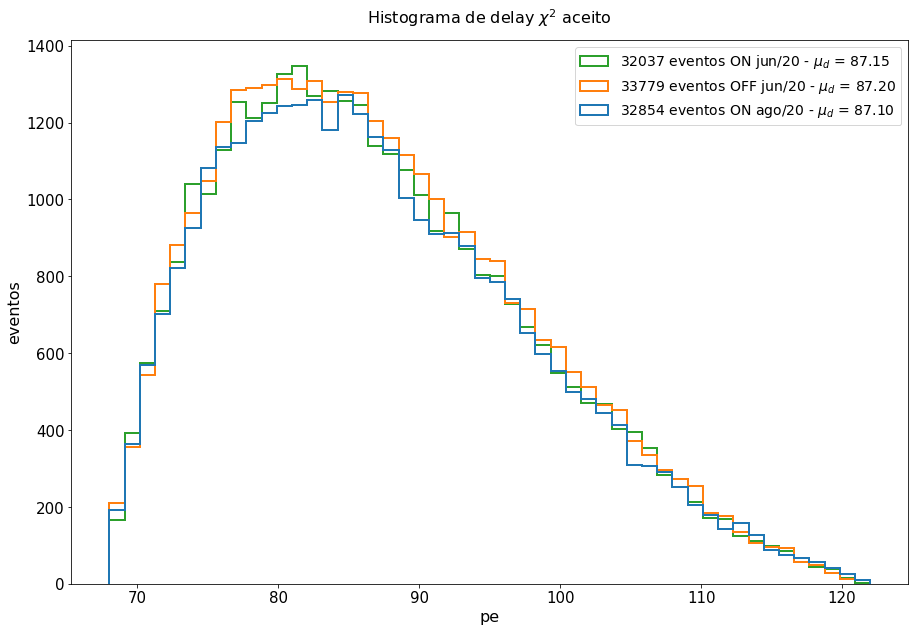

In [38]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 100])
plt.rcParams.update({'font.size': 15})

#ax.set_yscale('log')

plt.hist([h_delayChiON2,h_delayChiOFF,h_delayChiON],
        # weights=[w_delayChiOFF,w_delayChiON],#w_delayChiON2], ## com ou sem peso - 09/11/2021
         bins = 50,histtype='step', linewidth=2) #, density=True)
#plt.hist([h_delayChiON,h_delayChiOFF])
#plt.legend(labels=['Total_p_Charge','Timestamp','Total_p_Charge + Timestamp'],loc='upper right')
plt.legend(labels=[str(len(h_delayChiON2))+' eventos ON jun/20 - $\mu_d$ = {0:.2f}'.format(np.average(h_delayChiON2)),
                   str(len(h_delayChiOFF))+' eventos OFF jun/20 - $\mu_d$ = {0:.2f}'.format(np.average(h_delayChiOFF)),
                   str(len(h_delayChiON))+' eventos ON ago/20 - $\mu_d$ = {0:.2f}'.format(np.average(h_delayChiON))],
                  #com peso - 17/11/2021
                  #str(len(h_delayChiON))+' eventos ON ago/20 - media = {0:.2f}'.format(np.average(h_delayChiON,weights=w_delayChiON))],
                  #str(len(h_delayChiON2))+' eventos ON set/20 - media = {0:.2f}'.format(np.average(h_delayChiON2,weights=w_delayChiON2))],
           loc='upper right', fontsize=14)
plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de delay $\chi^2$ aceito', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Delay_chi2_Aceito_w.png')
plt.savefig('histogramas/Hist_Delay_chi2_Aceito.png')
plt.show() 

## Histograma intervalo de tempo chi^2 aceito

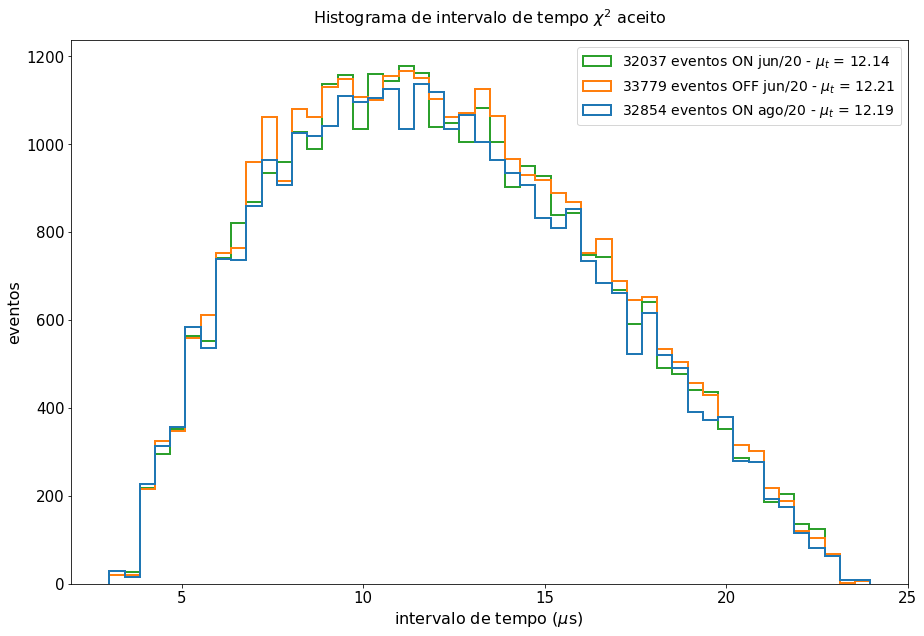

In [19]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 100])
plt.rcParams.update({'font.size': 15})

#ax.set_yscale('log')

## o np.average usa um parâmetro de peso opcional. Se não for fornecido, é equivalente a np.mean
## https://www.ti-enxame.com/pt/python/np.mean-vs-np.average-em-python-numpy/1043186187/


plt.hist([h_timeChiON2,h_timeChiOFF,h_timeChiON], 
         #weights=[w_timeChiOFF,w_timeChiON,w_timeChiON2], ## com ou sem peso ? - 09/11/2021
         bins = 50,histtype='step', linewidth=2) #, density=True)
plt.legend(labels=[str(len(h_timeChiON2))+' eventos ON jun/20 - $\mu_t$ = {0:.2f}'.format(np.average(h_timeChiON2)),
                   str(len(h_timeChiOFF))+' eventos OFF jun/20 - $\mu_t$ = {0:.2f}'.format(np.average(h_timeChiOFF)),
                   str(len(h_timeChiON))+' eventos ON ago/20 - $\mu_t$ = {0:.2f}'.format(np.average(h_timeChiON))],
                  #str(len(h_timeChiON2))+' eventos ON set/20 - media = {0:.2f}'.format(np.average(h_timeChiON2,weights=w_timeChiON2))],
           loc='upper right', fontsize=14)
plt.ylabel('eventos', size=16)
plt.xlabel('intervalo de tempo ($\mu$s) ', size=16)
plt.title('Histograma de intervalo de tempo $\chi^2$ aceito', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Tempo_chi2_Aceito_w.png')
plt.savefig('histogramas/Hist_Tempo_chi2_Aceito.png')
plt.show() 

## Histograma de delay chi^2 aceito + multiplicidade PMT

### Lista ON

In [58]:
print('Inicio',datetime.datetime.now())
h_delay25ChiON = []

for sListDt in list_ON:
    #print(sListDt)
    #print(sListDt[6:8])
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])

    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)
    #print(lista)

    #print('Inicio',datetime.datetime.now())

    for file in lista:
        df = pd.read_parquet(file)
        #print(file)
        h_delay25ChiON.extend(df[((df['chi_square']<chi_sq_tab)&(df['d_mPMTs']>=25)
                                 &(df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_Total_pe'].values)
        #break
    
    #print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2021-11-16 17:01:18.860121
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Fim 2021-11-16 17:12:27.710599


In [62]:
h_delay25ChiON2 = []
print('Inicio',datetime.datetime.now())


for sListDt in list_ONA:
    #print(sListDt)
    #print(sListDt[6:8])
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])

    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)
    #print(lista)

    for file in lista:
        df = pd.read_parquet(file)
        #print(file)
        #print(file)
        h_delay25ChiON2.extend(df[((df['chi_square']<chi_sq_tab)&(df['d_mPMTs']>=25)
                                 &(df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_Total_pe'].values)
        #break
    
    #print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2021-11-16 17:48:48.010087
data/20200615
data/20200616
data/20200617
data/20200618
data/20200619
Fim 2021-11-16 17:59:56.713927


### Lista OFF

In [60]:
h_delay25ChiOFF = []
print('Inicio',datetime.datetime.now())

for sListDt in list_OFF:
    #print(sListDt)
    #print(sListDt[6:8])
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)
    #print(lista)

    for file in lista:
        df = pd.read_parquet(file)
        #print(file)
        h_delay25ChiOFF.extend(df[((df['chi_square']<chi_sq_tab)&(df['d_mPMTs']>=25)
                                 &(df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_Total_pe'].values)
        #break
    
    #print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2021-11-16 17:24:48.833367
data/20200629
data/20200630
data/20200701
data/20200702
data/20200703
Fim 2021-11-16 17:37:27.587938


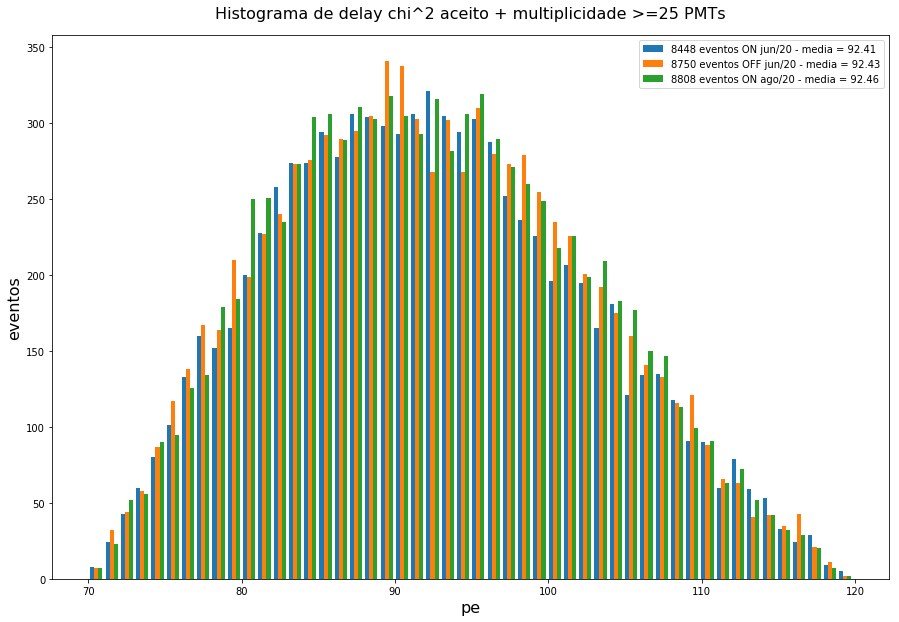

In [79]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 100])

#ax.set_yscale('log')

plt.hist([h_delay25ChiON2, h_delay25ChiOFF,h_delay25ChiON], bins = 50) #, density=True)
#plt.hist([h_delayChiON,h_delayChiOFF])
#plt.,legend(labels=['Total_p_Charge','Timestamp','Total_p_Charge + Timestamp'],loc='upper right')
plt.legend(labels=[str(len(h_delay25ChiON2))+' eventos ON jun/20 - media = {0:.2f}'.format(np.mean(h_delay25ChiON2)),
                   str(len(h_delay25ChiOFF))+' eventos OFF jun/20 - media = {0:.2f}'.format(np.mean(h_delay25ChiOFF)),
                   str(len(h_delay25ChiON))+' eventos ON ago/20 - media = {0:.2f}'.format(np.mean(h_delay25ChiON))
                  ],
           loc='upper right')
plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de delay chi^2 aceito + multiplicidade >=25 PMTs', size=16,y=1.02)
plt.savefig('histogramas/Hist_Delay_25chi2_Aceito.png')
plt.show() 

## Mapa ON / OFF

In [9]:
rh, rw = 150, 150
t_subOFF = [[0 for x in range(rw)] for y in range(rh)]  

print('Inicio',datetime.datetime.now())

for index1 in range(len(h_promptChiOFF)):
    i=int(h_promptChiOFF[index1]) #prompt int energy
    j=int(h_delayChiOFF[index1]) #delay int energy
   # t=int(h_timeChiOFF[index1]) #time interval - 13/09/2021
    if (i<rw)and(j<rh):
        #t_subOFF[i][j]=t_subOFF[i][j]+1 
        #t_subOFF[i][j]=t_subOFF[i][j]+(w_promptChiOFF[index1] * w_delayChiOFF[index1] * w_timeChiOFF[index1]) 
        #invertido para delay x prompt - 07/06/2022
        t_subOFF[j][i]+=(w_promptChiOFF[index1] * w_delayChiOFF[index1] * w_timeChiOFF[index1]) 
        #probabilidade independentes - 11/09/2021
    
#print(len(h_delay))
print('Fim',datetime.datetime.now())



Inicio 2022-06-08 01:12:28.959841
Fim 2022-06-08 01:12:29.212237


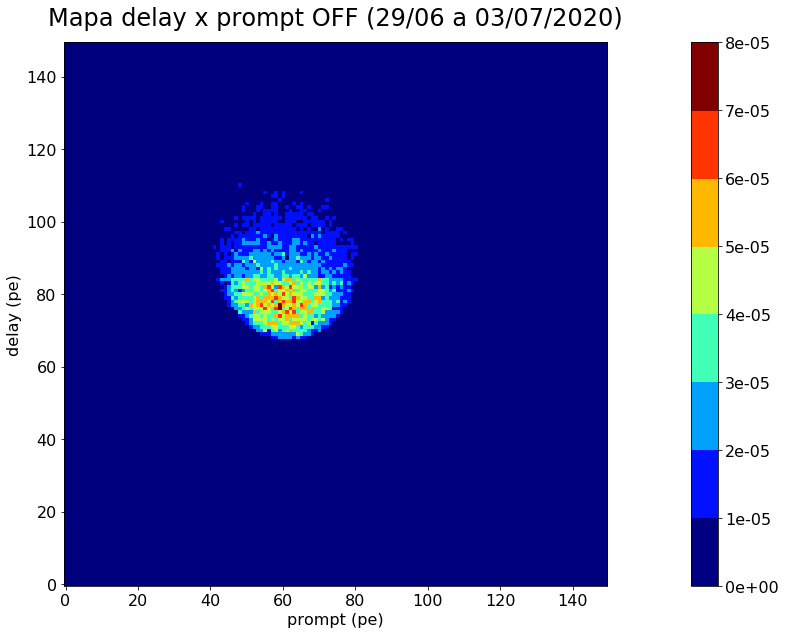

In [10]:
from matplotlib.colors import BoundaryNorm

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(np.min(t_subOFF),np.max(t_subOFF),10)
#bounds = [-0.000030, -0.000025, -0.000020, -0.000015, -0.000010, -0.000005, 
#          0, 0.000005, 0.000010, 0.000015, 0.000020, 0.000025, 0.000030]
bounds = [0, 1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5]
norm = BoundaryNorm(bounds, cmap.N)

fig=plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 16})

myplot=plt.imshow(t_subOFF,interpolation='none',norm=norm,cmap=cmap,origin='lower')

plt.colorbar(myplot, format='%.0e')

#invertido para delay x prompt - 07/06/2022
#plt.colorbar()
plt.xlabel('prompt (pe)', size=16)
plt.ylabel('delay (pe)', size=16)
plt.title('Mapa delay x prompt OFF (29/06 a 03/07/2020)', size=24,y=1.02)
plt.savefig('histogramas/Mapa-delay-prompt-OFF-chi20200629.png')
plt.show()

In [6]:
print(len(h_promptChiON))

32854


In [5]:
t_subON = [[0 for x in range(rw)] for y in range(rh)]  

print('Inicio',datetime.datetime.now())

for index1 in range(len(h_promptChiON)):
    i=int(h_promptChiON[index1]) #prompt int energy
    j=int(h_delayChiON[index1]) #delay int energy
   # t=int(h_timeChiON[index1]) #time interval - 13/09/2021
    if (i<rw)and(j<rh):
        #t_subON[i][j]=t_subON[i][j]+1 #
        #t_subON[i][j]=t_subON[i][j]+(w_promptChiON[index1] * w_delayChiON[index1] * w_timeChiON[index1]) #probabilidade independentes - 11/09/2021
        #invertido para delay x prompt - 07/06/2022
        t_subON[j][i]+=(w_promptChiON[index1] * w_delayChiON[index1] * w_timeChiON[index1]) #probabilidade independentes - 11/09/2021
    
#print(len(h_delay))
print('Fim',datetime.datetime.now())



Inicio 2022-06-08 00:48:53.852969
Fim 2022-06-08 00:48:54.050291


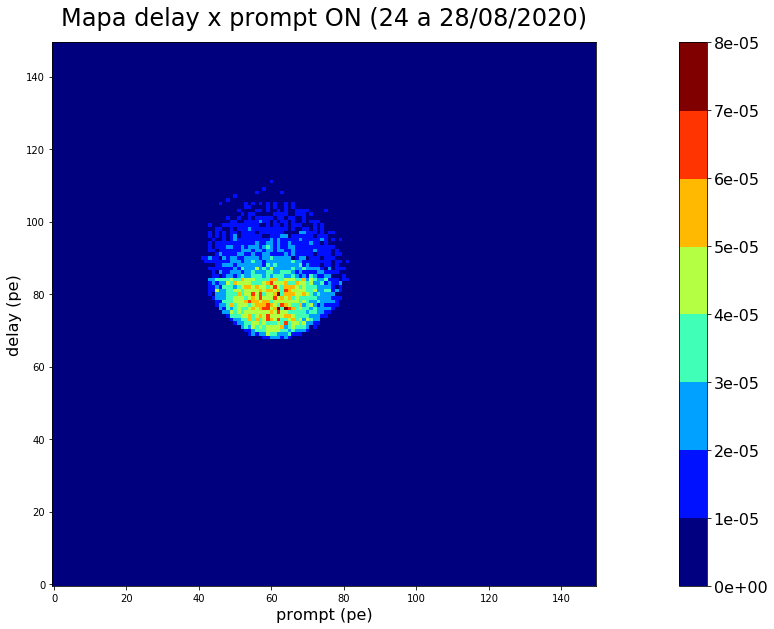

In [6]:
from matplotlib.colors import BoundaryNorm

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(np.min(t_subON),np.max(t_subON),10)
bounds = [0, 1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5]
norm = BoundaryNorm(bounds, cmap.N)

fig=plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 16})

myplot=plt.imshow(t_subON,interpolation='none',norm=norm,cmap=cmap,origin='lower')
plt.colorbar(myplot, format='%.0e')

#fmt = '%1.2f'
#cb = plt.colorbar(cax1,fraction=0.046, pad=0.04, format = fmt)
#cb.update_ticks

#invertido para delay x prompt - 07/06/2022
#plt.colorbar()
plt.xlabel('prompt (pe)', size=16)
plt.ylabel('delay (pe)', size=16)
plt.title('Mapa delay x prompt ON (24 a 28/08/2020)', size=24,y=1.02)
plt.savefig('histogramas/Mapa-delay-prompt-ON-chi20200824.png')
plt.show()

In [ ]:
'''
t_subOFF = [[0 for x in range(rw)] for y in range(rh)]  

print('Inicio',datetime.datetime.now())

for index1 in range(len(h_promptChiOFF)):
    i=int(h_promptChiOFF[index1]) #prompt int energy
    j=int(h_delay25ChiOFF[index1]) #delay int energy
   # t=int(h_timeChiOFF[index1]) #time interval - 13/09/2021
    if (i<rh)and(j<rw):
        t_subOFF[i][j]=t_subOFF[i][j]+1 #(w_promptChiOFF[index1] * w_delayChiOFF[index1] * w_timeChiOFF[index1]) 
        #probabilidade independentes - 11/09/2021
    
#print(len(h_delay))
print('Fim',datetime.datetime.now())

t_subON = [[0 for x in range(rw)] for y in range(rh)]  

print('Inicio',datetime.datetime.now())

for index1 in range(len(h_promptChiON)):
    i=int(h_promptChiON[index1]) #prompt int energy
    j=int(h_delay25ChiON[index1]) #delay int energy
   # t=int(h_timeChiON[index1]) #time interval - 13/09/2021
    if (i<rh)and(j<rw):
        t_subON[i][j]=t_subON[i][j]+1 #(w_promptChiON[index1] * w_delayChiON[index1] * w_timeChiON[index1]) #probabilidade independentes - 11/09/2021
    
#print(len(h_delay))
print('Fim',datetime.datetime.now())
'''



In [12]:
alfa = 1
print(alfa)

t_subONOFF = [[(t_subON[y][x] - (t_subOFF[y][x]*alfa)) for x in range(rw)] for y in range(rh)]  
#print(t_subONOFF)

print(np.sum(t_subONOFF))

print('fim')

1
-0.0005110185567895193
fim


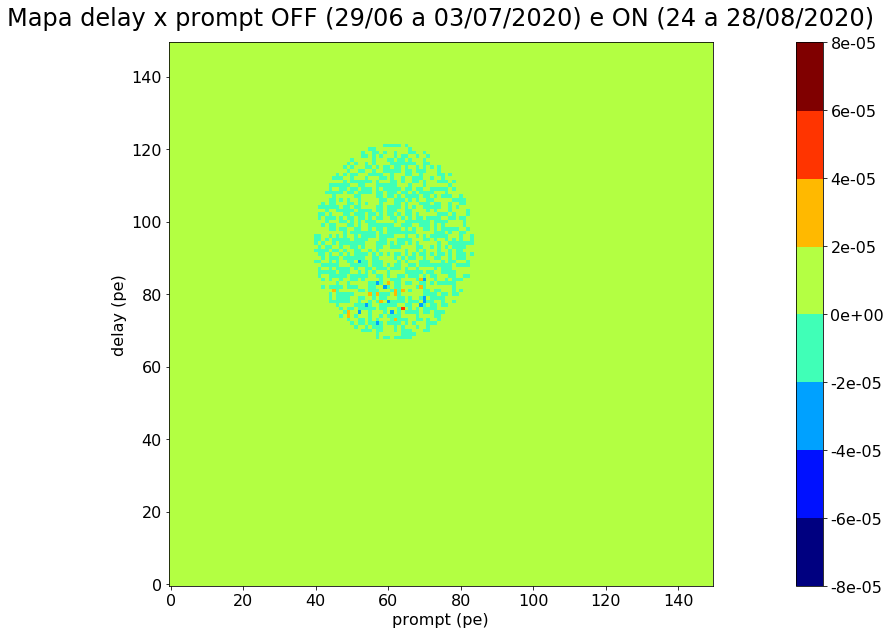

In [13]:
from matplotlib.colors import BoundaryNorm

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(np.min(t_subONOFF),np.max(t_subONOFF),10)
bounds = [-8e-5, -6e-5, -4e-5, -2e-5, 0, 2e-5, 4e-5, 6e-5, 8e-5]
norm = BoundaryNorm(bounds, cmap.N)

fig=plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 16})

myplot=plt.imshow(t_subONOFF,interpolation='none',norm=norm,cmap=cmap,origin='lower')
plt.colorbar(myplot, format='%.0e')

#invertido para delay x prompt - 07/06/2022
#plt.colorbar()
plt.xlabel('prompt (pe)', size=16)
plt.ylabel('delay (pe)', size=16)
plt.title('Mapa delay x prompt OFF (29/06 a 03/07/2020) e ON (24 a 28/08/2020)', size=24,y=1.02)
plt.savefig('histogramas/Mapa-delay-prompt-ONOFF-chi2020junago.png')
plt.show()

In [14]:

h_mapa = []
h_mapaT = []
h_mapaON = []
h_mapaOFF = []
print('Inicio',datetime.datetime.now())

#aqui tanto faz a inversão - 07/06/2022
for i in range(150):
    for j in range(150):
        if (t_subON[i][j]!=0)or(t_subOFF[i][j]!=0):
            h_mapa.append(t_subON[i][j] - t_subOFF[i][j])
            h_mapaT.append(t_subON[i][j] + t_subOFF[i][j])
            h_mapaON.append(t_subON[i][j])
            h_mapaOFF.append(t_subOFF[i][j])
    #break
    
#print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2022-06-08 01:13:56.474651
Fim 2022-06-08 01:13:56.533686


In [15]:
#print(h_mapa)
print(np.sum(h_mapa))
print(np.sum(h_mapaT))
print(np.sum(h_mapaON))
print(np.sum(h_mapaOFF))
print(np.sum(h_mapa)/np.sum(h_mapaT))

-0.0005110185567895195
0.06291562453669544
0.031202302989952965
0.03171332154674249
-0.008122283781693508


C:\Users\RetailAdmin\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


['params x', array([37.02000027,  0.        ,  7.        ])]


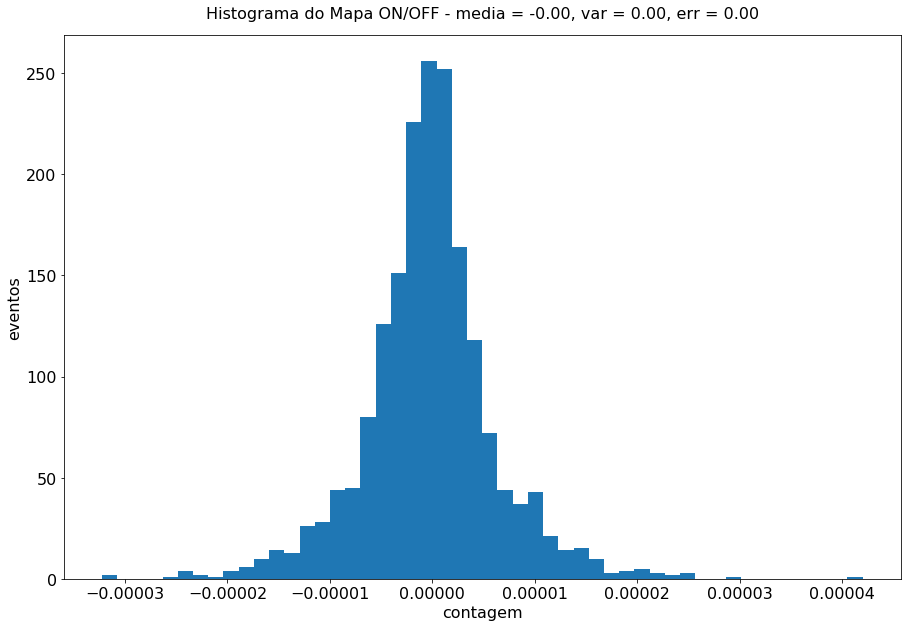

In [16]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

plt.hist(h_mapa, bins = 50) #, density=True)
#plt.hist(t_subONOFF, bins = 50) #, density=True)

x_data = np.histogram(h_mapa, bins=50) #int(np.amax(h_mapa)))
xx_data = np.linspace(int(np.amin(h_mapa)), int(np.amax(h_mapa)), num=len(x_data[0]))
params_x, params_covariance_x = optimize.curve_fit(fnt_fit_gauss_2, xx_data, x_data[0], [300,0,7])
print(['params x',params_x])
#mult_amp = 2.8#fator para plot amplitude da gaussiana
#plt.plot(xx_data, fnt_fit_gauss_2(xx_data, mult_amp*params_x[0], params_x[1], params_x[2]), label='Fitted function', color='r')
plt.plot(xx_data, fnt_fit_gauss_2(xx_data, params_x[0], params_x[1], params_x[2]), label='Fitted function', color='r')

plt.ylabel('eventos', size=16)
plt.xlabel('contagem', size=16)
plt.title('Histograma do Mapa ON/OFF - media = {0:.2f}, var = {1:.2f}, err = {2:.2f}'.format(np.mean(h_mapa),np.var(h_mapa),(np.var(h_mapa)/8831)**0.5), size=16,y=1.02)
plt.savefig('histogramas/Hist_Mapa-ONOFF.png')
plt.show() 

## Significância

In [17]:
#S_sub = [[0 for x in range(rw)] for y in range(rh)]  
S_subA = [[0 for x in range(rw)] for y in range(rh)]  
gw=gh=1

#t_subONOFF = [[(t_subON[y][x] - (t_subOFF[y][x]*alfa)) for x in range(rw)] for y in range(rh)]  


for i in range(rh): #pe delay
    for j in range(rw):  #pe prompt
        num_S = (t_subON[i//gh][j//gw] - alfa*t_subOFF[i//gh][j//gw])
        div_S = (alfa*(t_subON[i//gh][j//gw]) + t_subOFF[i//gh][j//gw])**0.5
        if (div_S!=0):
            S_subA[i][j] = num_S / div_S
       # print (i, j, t_subON[i//gh][j//gw], t_subOFF[i//gh][j//gw], num_S, div_S, S_subA[i][j])
        
print('fim')

0 0 0 0 0 0.0 0
0 1 0 0 0 0.0 0
0 2 0 0 0 0.0 0
0 3 0 0 0 0.0 0
0 4 0 0 0 0.0 0
0 5 0 0 0 0.0 0
0 6 0 0 0 0.0 0
0 7 0 0 0 0.0 0
0 8 0 0 0 0.0 0
0 9 0 0 0 0.0 0
0 10 0 0 0 0.0 0
0 11 0 0 0 0.0 0
0 12 0 0 0 0.0 0
0 13 0 0 0 0.0 0
0 14 0 0 0 0.0 0
0 15 0 0 0 0.0 0
0 16 0 0 0 0.0 0
0 17 0 0 0 0.0 0
0 18 0 0 0 0.0 0
0 19 0 0 0 0.0 0
0 20 0 0 0 0.0 0
0 21 0 0 0 0.0 0
0 22 0 0 0 0.0 0
0 23 0 0 0 0.0 0
0 24 0 0 0 0.0 0
0 25 0 0 0 0.0 0
0 26 0 0 0 0.0 0
0 27 0 0 0 0.0 0
0 28 0 0 0 0.0 0
0 29 0 0 0 0.0 0
0 30 0 0 0 0.0 0
0 31 0 0 0 0.0 0
0 32 0 0 0 0.0 0
0 33 0 0 0 0.0 0
0 34 0 0 0 0.0 0
0 35 0 0 0 0.0 0
0 36 0 0 0 0.0 0
0 37 0 0 0 0.0 0
0 38 0 0 0 0.0 0
0 39 0 0 0 0.0 0
0 40 0 0 0 0.0 0
0 41 0 0 0 0.0 0
0 42 0 0 0 0.0 0
0 43 0 0 0 0.0 0
0 44 0 0 0 0.0 0
0 45 0 0 0 0.0 0
0 46 0 0 0 0.0 0
0 47 0 0 0 0.0 0
0 48 0 0 0 0.0 0
0 49 0 0 0 0.0 0
0 50 0 0 0 0.0 0
0 51 0 0 0 0.0 0
0 52 0 0 0 0.0 0
0 53 0 0 0 0.0 0
0 54 0 0 0 0.0 0
0 55 0 0 0 0.0 0
0 56 0 0 0 0.0 0
0 57 0 0 0 0.0 0
0 58 0 0 0 0.0 0
0 59 0 

3 94 0 0 0 0.0 0
3 95 0 0 0 0.0 0
3 96 0 0 0 0.0 0
3 97 0 0 0 0.0 0
3 98 0 0 0 0.0 0
3 99 0 0 0 0.0 0
3 100 0 0 0 0.0 0
3 101 0 0 0 0.0 0
3 102 0 0 0 0.0 0
3 103 0 0 0 0.0 0
3 104 0 0 0 0.0 0
3 105 0 0 0 0.0 0
3 106 0 0 0 0.0 0
3 107 0 0 0 0.0 0
3 108 0 0 0 0.0 0
3 109 0 0 0 0.0 0
3 110 0 0 0 0.0 0
3 111 0 0 0 0.0 0
3 112 0 0 0 0.0 0
3 113 0 0 0 0.0 0
3 114 0 0 0 0.0 0
3 115 0 0 0 0.0 0
3 116 0 0 0 0.0 0
3 117 0 0 0 0.0 0
3 118 0 0 0 0.0 0
3 119 0 0 0 0.0 0
3 120 0 0 0 0.0 0
3 121 0 0 0 0.0 0
3 122 0 0 0 0.0 0
3 123 0 0 0 0.0 0
3 124 0 0 0 0.0 0
3 125 0 0 0 0.0 0
3 126 0 0 0 0.0 0
3 127 0 0 0 0.0 0
3 128 0 0 0 0.0 0
3 129 0 0 0 0.0 0
3 130 0 0 0 0.0 0
3 131 0 0 0 0.0 0
3 132 0 0 0 0.0 0
3 133 0 0 0 0.0 0
3 134 0 0 0 0.0 0
3 135 0 0 0 0.0 0
3 136 0 0 0 0.0 0
3 137 0 0 0 0.0 0
3 138 0 0 0 0.0 0
3 139 0 0 0 0.0 0
3 140 0 0 0 0.0 0
3 141 0 0 0 0.0 0
3 142 0 0 0 0.0 0
3 143 0 0 0 0.0 0
3 144 0 0 0 0.0 0
3 145 0 0 0 0.0 0
3 146 0 0 0 0.0 0
3 147 0 0 0 0.0 0
3 148 0 0 0 0.0 0
3 149 0 0 0 0.0 

6 144 0 0 0 0.0 0
6 145 0 0 0 0.0 0
6 146 0 0 0 0.0 0
6 147 0 0 0 0.0 0
6 148 0 0 0 0.0 0
6 149 0 0 0 0.0 0
7 0 0 0 0 0.0 0
7 1 0 0 0 0.0 0
7 2 0 0 0 0.0 0
7 3 0 0 0 0.0 0
7 4 0 0 0 0.0 0
7 5 0 0 0 0.0 0
7 6 0 0 0 0.0 0
7 7 0 0 0 0.0 0
7 8 0 0 0 0.0 0
7 9 0 0 0 0.0 0
7 10 0 0 0 0.0 0
7 11 0 0 0 0.0 0
7 12 0 0 0 0.0 0
7 13 0 0 0 0.0 0
7 14 0 0 0 0.0 0
7 15 0 0 0 0.0 0
7 16 0 0 0 0.0 0
7 17 0 0 0 0.0 0
7 18 0 0 0 0.0 0
7 19 0 0 0 0.0 0
7 20 0 0 0 0.0 0
7 21 0 0 0 0.0 0
7 22 0 0 0 0.0 0
7 23 0 0 0 0.0 0
7 24 0 0 0 0.0 0
7 25 0 0 0 0.0 0
7 26 0 0 0 0.0 0
7 27 0 0 0 0.0 0
7 28 0 0 0 0.0 0
7 29 0 0 0 0.0 0
7 30 0 0 0 0.0 0
7 31 0 0 0 0.0 0
7 32 0 0 0 0.0 0
7 33 0 0 0 0.0 0
7 34 0 0 0 0.0 0
7 35 0 0 0 0.0 0
7 36 0 0 0 0.0 0
7 37 0 0 0 0.0 0
7 38 0 0 0 0.0 0
7 39 0 0 0 0.0 0
7 40 0 0 0 0.0 0
7 41 0 0 0 0.0 0
7 42 0 0 0 0.0 0
7 43 0 0 0 0.0 0
7 44 0 0 0 0.0 0
7 45 0 0 0 0.0 0
7 46 0 0 0 0.0 0
7 47 0 0 0 0.0 0
7 48 0 0 0 0.0 0
7 49 0 0 0 0.0 0
7 50 0 0 0 0.0 0
7 51 0 0 0 0.0 0
7 52 0 0 0 0.0 0
7

10 43 0 0 0 0.0 0
10 44 0 0 0 0.0 0
10 45 0 0 0 0.0 0
10 46 0 0 0 0.0 0
10 47 0 0 0 0.0 0
10 48 0 0 0 0.0 0
10 49 0 0 0 0.0 0
10 50 0 0 0 0.0 0
10 51 0 0 0 0.0 0
10 52 0 0 0 0.0 0
10 53 0 0 0 0.0 0
10 54 0 0 0 0.0 0
10 55 0 0 0 0.0 0
10 56 0 0 0 0.0 0
10 57 0 0 0 0.0 0
10 58 0 0 0 0.0 0
10 59 0 0 0 0.0 0
10 60 0 0 0 0.0 0
10 61 0 0 0 0.0 0
10 62 0 0 0 0.0 0
10 63 0 0 0 0.0 0
10 64 0 0 0 0.0 0
10 65 0 0 0 0.0 0
10 66 0 0 0 0.0 0
10 67 0 0 0 0.0 0
10 68 0 0 0 0.0 0
10 69 0 0 0 0.0 0
10 70 0 0 0 0.0 0
10 71 0 0 0 0.0 0
10 72 0 0 0 0.0 0
10 73 0 0 0 0.0 0
10 74 0 0 0 0.0 0
10 75 0 0 0 0.0 0
10 76 0 0 0 0.0 0
10 77 0 0 0 0.0 0
10 78 0 0 0 0.0 0
10 79 0 0 0 0.0 0
10 80 0 0 0 0.0 0
10 81 0 0 0 0.0 0
10 82 0 0 0 0.0 0
10 83 0 0 0 0.0 0
10 84 0 0 0 0.0 0
10 85 0 0 0 0.0 0
10 86 0 0 0 0.0 0
10 87 0 0 0 0.0 0
10 88 0 0 0 0.0 0
10 89 0 0 0 0.0 0
10 90 0 0 0 0.0 0
10 91 0 0 0 0.0 0
10 92 0 0 0 0.0 0
10 93 0 0 0 0.0 0
10 94 0 0 0 0.0 0
10 95 0 0 0 0.0 0
10 96 0 0 0 0.0 0
10 97 0 0 0 0.0 0
10 98 0 0 

13 93 0 0 0 0.0 0
13 94 0 0 0 0.0 0
13 95 0 0 0 0.0 0
13 96 0 0 0 0.0 0
13 97 0 0 0 0.0 0
13 98 0 0 0 0.0 0
13 99 0 0 0 0.0 0
13 100 0 0 0 0.0 0
13 101 0 0 0 0.0 0
13 102 0 0 0 0.0 0
13 103 0 0 0 0.0 0
13 104 0 0 0 0.0 0
13 105 0 0 0 0.0 0
13 106 0 0 0 0.0 0
13 107 0 0 0 0.0 0
13 108 0 0 0 0.0 0
13 109 0 0 0 0.0 0
13 110 0 0 0 0.0 0
13 111 0 0 0 0.0 0
13 112 0 0 0 0.0 0
13 113 0 0 0 0.0 0
13 114 0 0 0 0.0 0
13 115 0 0 0 0.0 0
13 116 0 0 0 0.0 0
13 117 0 0 0 0.0 0
13 118 0 0 0 0.0 0
13 119 0 0 0 0.0 0
13 120 0 0 0 0.0 0
13 121 0 0 0 0.0 0
13 122 0 0 0 0.0 0
13 123 0 0 0 0.0 0
13 124 0 0 0 0.0 0
13 125 0 0 0 0.0 0
13 126 0 0 0 0.0 0
13 127 0 0 0 0.0 0
13 128 0 0 0 0.0 0
13 129 0 0 0 0.0 0
13 130 0 0 0 0.0 0
13 131 0 0 0 0.0 0
13 132 0 0 0 0.0 0
13 133 0 0 0 0.0 0
13 134 0 0 0 0.0 0
13 135 0 0 0 0.0 0
13 136 0 0 0 0.0 0
13 137 0 0 0 0.0 0
13 138 0 0 0 0.0 0
13 139 0 0 0 0.0 0
13 140 0 0 0 0.0 0
13 141 0 0 0 0.0 0
13 142 0 0 0 0.0 0
13 143 0 0 0 0.0 0
13 144 0 0 0 0.0 0
13 145 0 0 0 0.0 0


16 142 0 0 0 0.0 0
16 143 0 0 0 0.0 0
16 144 0 0 0 0.0 0
16 145 0 0 0 0.0 0
16 146 0 0 0 0.0 0
16 147 0 0 0 0.0 0
16 148 0 0 0 0.0 0
16 149 0 0 0 0.0 0
17 0 0 0 0 0.0 0
17 1 0 0 0 0.0 0
17 2 0 0 0 0.0 0
17 3 0 0 0 0.0 0
17 4 0 0 0 0.0 0
17 5 0 0 0 0.0 0
17 6 0 0 0 0.0 0
17 7 0 0 0 0.0 0
17 8 0 0 0 0.0 0
17 9 0 0 0 0.0 0
17 10 0 0 0 0.0 0
17 11 0 0 0 0.0 0
17 12 0 0 0 0.0 0
17 13 0 0 0 0.0 0
17 14 0 0 0 0.0 0
17 15 0 0 0 0.0 0
17 16 0 0 0 0.0 0
17 17 0 0 0 0.0 0
17 18 0 0 0 0.0 0
17 19 0 0 0 0.0 0
17 20 0 0 0 0.0 0
17 21 0 0 0 0.0 0
17 22 0 0 0 0.0 0
17 23 0 0 0 0.0 0
17 24 0 0 0 0.0 0
17 25 0 0 0 0.0 0
17 26 0 0 0 0.0 0
17 27 0 0 0 0.0 0
17 28 0 0 0 0.0 0
17 29 0 0 0 0.0 0
17 30 0 0 0 0.0 0
17 31 0 0 0 0.0 0
17 32 0 0 0 0.0 0
17 33 0 0 0 0.0 0
17 34 0 0 0 0.0 0
17 35 0 0 0 0.0 0
17 36 0 0 0 0.0 0
17 37 0 0 0 0.0 0
17 38 0 0 0 0.0 0
17 39 0 0 0 0.0 0
17 40 0 0 0 0.0 0
17 41 0 0 0 0.0 0
17 42 0 0 0 0.0 0
17 43 0 0 0 0.0 0
17 44 0 0 0 0.0 0
17 45 0 0 0 0.0 0
17 46 0 0 0 0.0 0
17 47 0 0 0 

20 42 0 0 0 0.0 0
20 43 0 0 0 0.0 0
20 44 0 0 0 0.0 0
20 45 0 0 0 0.0 0
20 46 0 0 0 0.0 0
20 47 0 0 0 0.0 0
20 48 0 0 0 0.0 0
20 49 0 0 0 0.0 0
20 50 0 0 0 0.0 0
20 51 0 0 0 0.0 0
20 52 0 0 0 0.0 0
20 53 0 0 0 0.0 0
20 54 0 0 0 0.0 0
20 55 0 0 0 0.0 0
20 56 0 0 0 0.0 0
20 57 0 0 0 0.0 0
20 58 0 0 0 0.0 0
20 59 0 0 0 0.0 0
20 60 0 0 0 0.0 0
20 61 0 0 0 0.0 0
20 62 0 0 0 0.0 0
20 63 0 0 0 0.0 0
20 64 0 0 0 0.0 0
20 65 0 0 0 0.0 0
20 66 0 0 0 0.0 0
20 67 0 0 0 0.0 0
20 68 0 0 0 0.0 0
20 69 0 0 0 0.0 0
20 70 0 0 0 0.0 0
20 71 0 0 0 0.0 0
20 72 0 0 0 0.0 0
20 73 0 0 0 0.0 0
20 74 0 0 0 0.0 0
20 75 0 0 0 0.0 0
20 76 0 0 0 0.0 0
20 77 0 0 0 0.0 0
20 78 0 0 0 0.0 0
20 79 0 0 0 0.0 0
20 80 0 0 0 0.0 0
20 81 0 0 0 0.0 0
20 82 0 0 0 0.0 0
20 83 0 0 0 0.0 0
20 84 0 0 0 0.0 0
20 85 0 0 0 0.0 0
20 86 0 0 0 0.0 0
20 87 0 0 0 0.0 0
20 88 0 0 0 0.0 0
20 89 0 0 0 0.0 0
20 90 0 0 0 0.0 0
20 91 0 0 0 0.0 0
20 92 0 0 0 0.0 0
20 93 0 0 0 0.0 0
20 94 0 0 0 0.0 0
20 95 0 0 0 0.0 0
20 96 0 0 0 0.0 0
20 97 0 0 

23 91 0 0 0 0.0 0
23 92 0 0 0 0.0 0
23 93 0 0 0 0.0 0
23 94 0 0 0 0.0 0
23 95 0 0 0 0.0 0
23 96 0 0 0 0.0 0
23 97 0 0 0 0.0 0
23 98 0 0 0 0.0 0
23 99 0 0 0 0.0 0
23 100 0 0 0 0.0 0
23 101 0 0 0 0.0 0
23 102 0 0 0 0.0 0
23 103 0 0 0 0.0 0
23 104 0 0 0 0.0 0
23 105 0 0 0 0.0 0
23 106 0 0 0 0.0 0
23 107 0 0 0 0.0 0
23 108 0 0 0 0.0 0
23 109 0 0 0 0.0 0
23 110 0 0 0 0.0 0
23 111 0 0 0 0.0 0
23 112 0 0 0 0.0 0
23 113 0 0 0 0.0 0
23 114 0 0 0 0.0 0
23 115 0 0 0 0.0 0
23 116 0 0 0 0.0 0
23 117 0 0 0 0.0 0
23 118 0 0 0 0.0 0
23 119 0 0 0 0.0 0
23 120 0 0 0 0.0 0
23 121 0 0 0 0.0 0
23 122 0 0 0 0.0 0
23 123 0 0 0 0.0 0
23 124 0 0 0 0.0 0
23 125 0 0 0 0.0 0
23 126 0 0 0 0.0 0
23 127 0 0 0 0.0 0
23 128 0 0 0 0.0 0
23 129 0 0 0 0.0 0
23 130 0 0 0 0.0 0
23 131 0 0 0 0.0 0
23 132 0 0 0 0.0 0
23 133 0 0 0 0.0 0
23 134 0 0 0 0.0 0
23 135 0 0 0 0.0 0
23 136 0 0 0 0.0 0
23 137 0 0 0 0.0 0
23 138 0 0 0 0.0 0
23 139 0 0 0 0.0 0
23 140 0 0 0 0.0 0
23 141 0 0 0 0.0 0
23 142 0 0 0 0.0 0
23 143 0 0 0 0.0 0
23

26 141 0 0 0 0.0 0
26 142 0 0 0 0.0 0
26 143 0 0 0 0.0 0
26 144 0 0 0 0.0 0
26 145 0 0 0 0.0 0
26 146 0 0 0 0.0 0
26 147 0 0 0 0.0 0
26 148 0 0 0 0.0 0
26 149 0 0 0 0.0 0
27 0 0 0 0 0.0 0
27 1 0 0 0 0.0 0
27 2 0 0 0 0.0 0
27 3 0 0 0 0.0 0
27 4 0 0 0 0.0 0
27 5 0 0 0 0.0 0
27 6 0 0 0 0.0 0
27 7 0 0 0 0.0 0
27 8 0 0 0 0.0 0
27 9 0 0 0 0.0 0
27 10 0 0 0 0.0 0
27 11 0 0 0 0.0 0
27 12 0 0 0 0.0 0
27 13 0 0 0 0.0 0
27 14 0 0 0 0.0 0
27 15 0 0 0 0.0 0
27 16 0 0 0 0.0 0
27 17 0 0 0 0.0 0
27 18 0 0 0 0.0 0
27 19 0 0 0 0.0 0
27 20 0 0 0 0.0 0
27 21 0 0 0 0.0 0
27 22 0 0 0 0.0 0
27 23 0 0 0 0.0 0
27 24 0 0 0 0.0 0
27 25 0 0 0 0.0 0
27 26 0 0 0 0.0 0
27 27 0 0 0 0.0 0
27 28 0 0 0 0.0 0
27 29 0 0 0 0.0 0
27 30 0 0 0 0.0 0
27 31 0 0 0 0.0 0
27 32 0 0 0 0.0 0
27 33 0 0 0 0.0 0
27 34 0 0 0 0.0 0
27 35 0 0 0 0.0 0
27 36 0 0 0 0.0 0
27 37 0 0 0 0.0 0
27 38 0 0 0 0.0 0
27 39 0 0 0 0.0 0
27 40 0 0 0 0.0 0
27 41 0 0 0 0.0 0
27 42 0 0 0 0.0 0
27 43 0 0 0 0.0 0
27 44 0 0 0 0.0 0
27 45 0 0 0 0.0 0
27 46 0 0 0

30 40 0 0 0 0.0 0
30 41 0 0 0 0.0 0
30 42 0 0 0 0.0 0
30 43 0 0 0 0.0 0
30 44 0 0 0 0.0 0
30 45 0 0 0 0.0 0
30 46 0 0 0 0.0 0
30 47 0 0 0 0.0 0
30 48 0 0 0 0.0 0
30 49 0 0 0 0.0 0
30 50 0 0 0 0.0 0
30 51 0 0 0 0.0 0
30 52 0 0 0 0.0 0
30 53 0 0 0 0.0 0
30 54 0 0 0 0.0 0
30 55 0 0 0 0.0 0
30 56 0 0 0 0.0 0
30 57 0 0 0 0.0 0
30 58 0 0 0 0.0 0
30 59 0 0 0 0.0 0
30 60 0 0 0 0.0 0
30 61 0 0 0 0.0 0
30 62 0 0 0 0.0 0
30 63 0 0 0 0.0 0
30 64 0 0 0 0.0 0
30 65 0 0 0 0.0 0
30 66 0 0 0 0.0 0
30 67 0 0 0 0.0 0
30 68 0 0 0 0.0 0
30 69 0 0 0 0.0 0
30 70 0 0 0 0.0 0
30 71 0 0 0 0.0 0
30 72 0 0 0 0.0 0
30 73 0 0 0 0.0 0
30 74 0 0 0 0.0 0
30 75 0 0 0 0.0 0
30 76 0 0 0 0.0 0
30 77 0 0 0 0.0 0
30 78 0 0 0 0.0 0
30 79 0 0 0 0.0 0
30 80 0 0 0 0.0 0
30 81 0 0 0 0.0 0
30 82 0 0 0 0.0 0
30 83 0 0 0 0.0 0
30 84 0 0 0 0.0 0
30 85 0 0 0 0.0 0
30 86 0 0 0 0.0 0
30 87 0 0 0 0.0 0
30 88 0 0 0 0.0 0
30 89 0 0 0 0.0 0
30 90 0 0 0 0.0 0
30 91 0 0 0 0.0 0
30 92 0 0 0 0.0 0
30 93 0 0 0 0.0 0
30 94 0 0 0 0.0 0
30 95 0 0 

33 90 0 0 0 0.0 0
33 91 0 0 0 0.0 0
33 92 0 0 0 0.0 0
33 93 0 0 0 0.0 0
33 94 0 0 0 0.0 0
33 95 0 0 0 0.0 0
33 96 0 0 0 0.0 0
33 97 0 0 0 0.0 0
33 98 0 0 0 0.0 0
33 99 0 0 0 0.0 0
33 100 0 0 0 0.0 0
33 101 0 0 0 0.0 0
33 102 0 0 0 0.0 0
33 103 0 0 0 0.0 0
33 104 0 0 0 0.0 0
33 105 0 0 0 0.0 0
33 106 0 0 0 0.0 0
33 107 0 0 0 0.0 0
33 108 0 0 0 0.0 0
33 109 0 0 0 0.0 0
33 110 0 0 0 0.0 0
33 111 0 0 0 0.0 0
33 112 0 0 0 0.0 0
33 113 0 0 0 0.0 0
33 114 0 0 0 0.0 0
33 115 0 0 0 0.0 0
33 116 0 0 0 0.0 0
33 117 0 0 0 0.0 0
33 118 0 0 0 0.0 0
33 119 0 0 0 0.0 0
33 120 0 0 0 0.0 0
33 121 0 0 0 0.0 0
33 122 0 0 0 0.0 0
33 123 0 0 0 0.0 0
33 124 0 0 0 0.0 0
33 125 0 0 0 0.0 0
33 126 0 0 0 0.0 0
33 127 0 0 0 0.0 0
33 128 0 0 0 0.0 0
33 129 0 0 0 0.0 0
33 130 0 0 0 0.0 0
33 131 0 0 0 0.0 0
33 132 0 0 0 0.0 0
33 133 0 0 0 0.0 0
33 134 0 0 0 0.0 0
33 135 0 0 0 0.0 0
33 136 0 0 0 0.0 0
33 137 0 0 0 0.0 0
33 138 0 0 0 0.0 0
33 139 0 0 0 0.0 0
33 140 0 0 0 0.0 0
33 141 0 0 0 0.0 0
33 142 0 0 0 0.0 0
33 

36 139 0 0 0 0.0 0
36 140 0 0 0 0.0 0
36 141 0 0 0 0.0 0
36 142 0 0 0 0.0 0
36 143 0 0 0 0.0 0
36 144 0 0 0 0.0 0
36 145 0 0 0 0.0 0
36 146 0 0 0 0.0 0
36 147 0 0 0 0.0 0
36 148 0 0 0 0.0 0
36 149 0 0 0 0.0 0
37 0 0 0 0 0.0 0
37 1 0 0 0 0.0 0
37 2 0 0 0 0.0 0
37 3 0 0 0 0.0 0
37 4 0 0 0 0.0 0
37 5 0 0 0 0.0 0
37 6 0 0 0 0.0 0
37 7 0 0 0 0.0 0
37 8 0 0 0 0.0 0
37 9 0 0 0 0.0 0
37 10 0 0 0 0.0 0
37 11 0 0 0 0.0 0
37 12 0 0 0 0.0 0
37 13 0 0 0 0.0 0
37 14 0 0 0 0.0 0
37 15 0 0 0 0.0 0
37 16 0 0 0 0.0 0
37 17 0 0 0 0.0 0
37 18 0 0 0 0.0 0
37 19 0 0 0 0.0 0
37 20 0 0 0 0.0 0
37 21 0 0 0 0.0 0
37 22 0 0 0 0.0 0
37 23 0 0 0 0.0 0
37 24 0 0 0 0.0 0
37 25 0 0 0 0.0 0
37 26 0 0 0 0.0 0
37 27 0 0 0 0.0 0
37 28 0 0 0 0.0 0
37 29 0 0 0 0.0 0
37 30 0 0 0 0.0 0
37 31 0 0 0 0.0 0
37 32 0 0 0 0.0 0
37 33 0 0 0 0.0 0
37 34 0 0 0 0.0 0
37 35 0 0 0 0.0 0
37 36 0 0 0 0.0 0
37 37 0 0 0 0.0 0
37 38 0 0 0 0.0 0
37 39 0 0 0 0.0 0
37 40 0 0 0 0.0 0
37 41 0 0 0 0.0 0
37 42 0 0 0 0.0 0
37 43 0 0 0 0.0 0
37 44 0 0

40 39 0 0 0 0.0 0
40 40 0 0 0 0.0 0
40 41 0 0 0 0.0 0
40 42 0 0 0 0.0 0
40 43 0 0 0 0.0 0
40 44 0 0 0 0.0 0
40 45 0 0 0 0.0 0
40 46 0 0 0 0.0 0
40 47 0 0 0 0.0 0
40 48 0 0 0 0.0 0
40 49 0 0 0 0.0 0
40 50 0 0 0 0.0 0
40 51 0 0 0 0.0 0
40 52 0 0 0 0.0 0
40 53 0 0 0 0.0 0
40 54 0 0 0 0.0 0
40 55 0 0 0 0.0 0
40 56 0 0 0 0.0 0
40 57 0 0 0 0.0 0
40 58 0 0 0 0.0 0
40 59 0 0 0 0.0 0
40 60 0 0 0 0.0 0
40 61 0 0 0 0.0 0
40 62 0 0 0 0.0 0
40 63 0 0 0 0.0 0
40 64 0 0 0 0.0 0
40 65 0 0 0 0.0 0
40 66 0 0 0 0.0 0
40 67 0 0 0 0.0 0
40 68 0 0 0 0.0 0
40 69 0 0 0 0.0 0
40 70 0 0 0 0.0 0
40 71 0 0 0 0.0 0
40 72 0 0 0 0.0 0
40 73 0 0 0 0.0 0
40 74 0 0 0 0.0 0
40 75 0 0 0 0.0 0
40 76 0 0 0 0.0 0
40 77 0 0 0 0.0 0
40 78 0 0 0 0.0 0
40 79 0 0 0 0.0 0
40 80 0 0 0 0.0 0
40 81 0 0 0 0.0 0
40 82 0 0 0 0.0 0
40 83 0 0 0 0.0 0
40 84 0 0 0 0.0 0
40 85 0 0 0 0.0 0
40 86 0 0 0 0.0 0
40 87 0 0 0 0.0 0
40 88 0 0 0 0.0 0
40 89 0 0 0 0.0 0
40 90 0 0 0 0.0 0
40 91 0 0 0 0.0 0
40 92 0 0 0 0.0 0
40 93 0 0 0 0.0 0
40 94 0 0 

43 88 0 0 0 0.0 0
43 89 0 0 0 0.0 0
43 90 0 0 0 0.0 0
43 91 0 0 0 0.0 0
43 92 0 0 0 0.0 0
43 93 0 0 0 0.0 0
43 94 0 0 0 0.0 0
43 95 0 0 0 0.0 0
43 96 0 0 0 0.0 0
43 97 0 0 0 0.0 0
43 98 0 0 0 0.0 0
43 99 0 0 0 0.0 0
43 100 0 0 0 0.0 0
43 101 0 0 0 0.0 0
43 102 0 0 0 0.0 0
43 103 0 0 0 0.0 0
43 104 0 0 0 0.0 0
43 105 0 0 0 0.0 0
43 106 0 0 0 0.0 0
43 107 0 0 0 0.0 0
43 108 0 0 0 0.0 0
43 109 0 0 0 0.0 0
43 110 0 0 0 0.0 0
43 111 0 0 0 0.0 0
43 112 0 0 0 0.0 0
43 113 0 0 0 0.0 0
43 114 0 0 0 0.0 0
43 115 0 0 0 0.0 0
43 116 0 0 0 0.0 0
43 117 0 0 0 0.0 0
43 118 0 0 0 0.0 0
43 119 0 0 0 0.0 0
43 120 0 0 0 0.0 0
43 121 0 0 0 0.0 0
43 122 0 0 0 0.0 0
43 123 0 0 0 0.0 0
43 124 0 0 0 0.0 0
43 125 0 0 0 0.0 0
43 126 0 0 0 0.0 0
43 127 0 0 0 0.0 0
43 128 0 0 0 0.0 0
43 129 0 0 0 0.0 0
43 130 0 0 0 0.0 0
43 131 0 0 0 0.0 0
43 132 0 0 0 0.0 0
43 133 0 0 0 0.0 0
43 134 0 0 0 0.0 0
43 135 0 0 0 0.0 0
43 136 0 0 0 0.0 0
43 137 0 0 0 0.0 0
43 138 0 0 0 0.0 0
43 139 0 0 0 0.0 0
43 140 0 0 0 0.0 0
43 14

46 138 0 0 0 0.0 0
46 139 0 0 0 0.0 0
46 140 0 0 0 0.0 0
46 141 0 0 0 0.0 0
46 142 0 0 0 0.0 0
46 143 0 0 0 0.0 0
46 144 0 0 0 0.0 0
46 145 0 0 0 0.0 0
46 146 0 0 0 0.0 0
46 147 0 0 0 0.0 0
46 148 0 0 0 0.0 0
46 149 0 0 0 0.0 0
47 0 0 0 0 0.0 0
47 1 0 0 0 0.0 0
47 2 0 0 0 0.0 0
47 3 0 0 0 0.0 0
47 4 0 0 0 0.0 0
47 5 0 0 0 0.0 0
47 6 0 0 0 0.0 0
47 7 0 0 0 0.0 0
47 8 0 0 0 0.0 0
47 9 0 0 0 0.0 0
47 10 0 0 0 0.0 0
47 11 0 0 0 0.0 0
47 12 0 0 0 0.0 0
47 13 0 0 0 0.0 0
47 14 0 0 0 0.0 0
47 15 0 0 0 0.0 0
47 16 0 0 0 0.0 0
47 17 0 0 0 0.0 0
47 18 0 0 0 0.0 0
47 19 0 0 0 0.0 0
47 20 0 0 0 0.0 0
47 21 0 0 0 0.0 0
47 22 0 0 0 0.0 0
47 23 0 0 0 0.0 0
47 24 0 0 0 0.0 0
47 25 0 0 0 0.0 0
47 26 0 0 0 0.0 0
47 27 0 0 0 0.0 0
47 28 0 0 0 0.0 0
47 29 0 0 0 0.0 0
47 30 0 0 0 0.0 0
47 31 0 0 0 0.0 0
47 32 0 0 0 0.0 0
47 33 0 0 0 0.0 0
47 34 0 0 0 0.0 0
47 35 0 0 0 0.0 0
47 36 0 0 0 0.0 0
47 37 0 0 0 0.0 0
47 38 0 0 0 0.0 0
47 39 0 0 0 0.0 0
47 40 0 0 0 0.0 0
47 41 0 0 0 0.0 0
47 42 0 0 0 0.0 0
47 43 0 

50 37 0 0 0 0.0 0
50 38 0 0 0 0.0 0
50 39 0 0 0 0.0 0
50 40 0 0 0 0.0 0
50 41 0 0 0 0.0 0
50 42 0 0 0 0.0 0
50 43 0 0 0 0.0 0
50 44 0 0 0 0.0 0
50 45 0 0 0 0.0 0
50 46 0 0 0 0.0 0
50 47 0 0 0 0.0 0
50 48 0 0 0 0.0 0
50 49 0 0 0 0.0 0
50 50 0 0 0 0.0 0
50 51 0 0 0 0.0 0
50 52 0 0 0 0.0 0
50 53 0 0 0 0.0 0
50 54 0 0 0 0.0 0
50 55 0 0 0 0.0 0
50 56 0 0 0 0.0 0
50 57 0 0 0 0.0 0
50 58 0 0 0 0.0 0
50 59 0 0 0 0.0 0
50 60 0 0 0 0.0 0
50 61 0 0 0 0.0 0
50 62 0 0 0 0.0 0
50 63 0 0 0 0.0 0
50 64 0 0 0 0.0 0
50 65 0 0 0 0.0 0
50 66 0 0 0 0.0 0
50 67 0 0 0 0.0 0
50 68 0 0 0 0.0 0
50 69 0 0 0 0.0 0
50 70 0 0 0 0.0 0
50 71 0 0 0 0.0 0
50 72 0 0 0 0.0 0
50 73 0 0 0 0.0 0
50 74 0 0 0 0.0 0
50 75 0 0 0 0.0 0
50 76 0 0 0 0.0 0
50 77 0 0 0 0.0 0
50 78 0 0 0 0.0 0
50 79 0 0 0 0.0 0
50 80 0 0 0 0.0 0
50 81 0 0 0 0.0 0
50 82 0 0 0 0.0 0
50 83 0 0 0 0.0 0
50 84 0 0 0 0.0 0
50 85 0 0 0 0.0 0
50 86 0 0 0 0.0 0
50 87 0 0 0 0.0 0
50 88 0 0 0 0.0 0
50 89 0 0 0 0.0 0
50 90 0 0 0 0.0 0
50 91 0 0 0 0.0 0
50 92 0 0 

53 87 0 0 0 0.0 0
53 88 0 0 0 0.0 0
53 89 0 0 0 0.0 0
53 90 0 0 0 0.0 0
53 91 0 0 0 0.0 0
53 92 0 0 0 0.0 0
53 93 0 0 0 0.0 0
53 94 0 0 0 0.0 0
53 95 0 0 0 0.0 0
53 96 0 0 0 0.0 0
53 97 0 0 0 0.0 0
53 98 0 0 0 0.0 0
53 99 0 0 0 0.0 0
53 100 0 0 0 0.0 0
53 101 0 0 0 0.0 0
53 102 0 0 0 0.0 0
53 103 0 0 0 0.0 0
53 104 0 0 0 0.0 0
53 105 0 0 0 0.0 0
53 106 0 0 0 0.0 0
53 107 0 0 0 0.0 0
53 108 0 0 0 0.0 0
53 109 0 0 0 0.0 0
53 110 0 0 0 0.0 0
53 111 0 0 0 0.0 0
53 112 0 0 0 0.0 0
53 113 0 0 0 0.0 0
53 114 0 0 0 0.0 0
53 115 0 0 0 0.0 0
53 116 0 0 0 0.0 0
53 117 0 0 0 0.0 0
53 118 0 0 0 0.0 0
53 119 0 0 0 0.0 0
53 120 0 0 0 0.0 0
53 121 0 0 0 0.0 0
53 122 0 0 0 0.0 0
53 123 0 0 0 0.0 0
53 124 0 0 0 0.0 0
53 125 0 0 0 0.0 0
53 126 0 0 0 0.0 0
53 127 0 0 0 0.0 0
53 128 0 0 0 0.0 0
53 129 0 0 0 0.0 0
53 130 0 0 0 0.0 0
53 131 0 0 0 0.0 0
53 132 0 0 0 0.0 0
53 133 0 0 0 0.0 0
53 134 0 0 0 0.0 0
53 135 0 0 0 0.0 0
53 136 0 0 0 0.0 0
53 137 0 0 0 0.0 0
53 138 0 0 0 0.0 0
53 139 0 0 0 0.0 0
53 140

56 136 0 0 0 0.0 0
56 137 0 0 0 0.0 0
56 138 0 0 0 0.0 0
56 139 0 0 0 0.0 0
56 140 0 0 0 0.0 0
56 141 0 0 0 0.0 0
56 142 0 0 0 0.0 0
56 143 0 0 0 0.0 0
56 144 0 0 0 0.0 0
56 145 0 0 0 0.0 0
56 146 0 0 0 0.0 0
56 147 0 0 0 0.0 0
56 148 0 0 0 0.0 0
56 149 0 0 0 0.0 0
57 0 0 0 0 0.0 0
57 1 0 0 0 0.0 0
57 2 0 0 0 0.0 0
57 3 0 0 0 0.0 0
57 4 0 0 0 0.0 0
57 5 0 0 0 0.0 0
57 6 0 0 0 0.0 0
57 7 0 0 0 0.0 0
57 8 0 0 0 0.0 0
57 9 0 0 0 0.0 0
57 10 0 0 0 0.0 0
57 11 0 0 0 0.0 0
57 12 0 0 0 0.0 0
57 13 0 0 0 0.0 0
57 14 0 0 0 0.0 0
57 15 0 0 0 0.0 0
57 16 0 0 0 0.0 0
57 17 0 0 0 0.0 0
57 18 0 0 0 0.0 0
57 19 0 0 0 0.0 0
57 20 0 0 0 0.0 0
57 21 0 0 0 0.0 0
57 22 0 0 0 0.0 0
57 23 0 0 0 0.0 0
57 24 0 0 0 0.0 0
57 25 0 0 0 0.0 0
57 26 0 0 0 0.0 0
57 27 0 0 0 0.0 0
57 28 0 0 0 0.0 0
57 29 0 0 0 0.0 0
57 30 0 0 0 0.0 0
57 31 0 0 0 0.0 0
57 32 0 0 0 0.0 0
57 33 0 0 0 0.0 0
57 34 0 0 0 0.0 0
57 35 0 0 0 0.0 0
57 36 0 0 0 0.0 0
57 37 0 0 0 0.0 0
57 38 0 0 0 0.0 0
57 39 0 0 0 0.0 0
57 40 0 0 0 0.0 0
57 41 

60 36 0 0 0 0.0 0
60 37 0 0 0 0.0 0
60 38 0 0 0 0.0 0
60 39 0 0 0 0.0 0
60 40 0 0 0 0.0 0
60 41 0 0 0 0.0 0
60 42 0 0 0 0.0 0
60 43 0 0 0 0.0 0
60 44 0 0 0 0.0 0
60 45 0 0 0 0.0 0
60 46 0 0 0 0.0 0
60 47 0 0 0 0.0 0
60 48 0 0 0 0.0 0
60 49 0 0 0 0.0 0
60 50 0 0 0 0.0 0
60 51 0 0 0 0.0 0
60 52 0 0 0 0.0 0
60 53 0 0 0 0.0 0
60 54 0 0 0 0.0 0
60 55 0 0 0 0.0 0
60 56 0 0 0 0.0 0
60 57 0 0 0 0.0 0
60 58 0 0 0 0.0 0
60 59 0 0 0 0.0 0
60 60 0 0 0 0.0 0
60 61 0 0 0 0.0 0
60 62 0 0 0 0.0 0
60 63 0 0 0 0.0 0
60 64 0 0 0 0.0 0
60 65 0 0 0 0.0 0
60 66 0 0 0 0.0 0
60 67 0 0 0 0.0 0
60 68 0 0 0 0.0 0
60 69 0 0 0 0.0 0
60 70 0 0 0 0.0 0
60 71 0 0 0 0.0 0
60 72 0 0 0 0.0 0
60 73 0 0 0 0.0 0
60 74 0 0 0 0.0 0
60 75 0 0 0 0.0 0
60 76 0 0 0 0.0 0
60 77 0 0 0 0.0 0
60 78 0 0 0 0.0 0
60 79 0 0 0 0.0 0
60 80 0 0 0 0.0 0
60 81 0 0 0 0.0 0
60 82 0 0 0 0.0 0
60 83 0 0 0 0.0 0
60 84 0 0 0 0.0 0
60 85 0 0 0 0.0 0
60 86 0 0 0 0.0 0
60 87 0 0 0 0.0 0
60 88 0 0 0 0.0 0
60 89 0 0 0 0.0 0
60 90 0 0 0 0.0 0
60 91 0 0 

63 85 0 0 0 0.0 0
63 86 0 0 0 0.0 0
63 87 0 0 0 0.0 0
63 88 0 0 0 0.0 0
63 89 0 0 0 0.0 0
63 90 0 0 0 0.0 0
63 91 0 0 0 0.0 0
63 92 0 0 0 0.0 0
63 93 0 0 0 0.0 0
63 94 0 0 0 0.0 0
63 95 0 0 0 0.0 0
63 96 0 0 0 0.0 0
63 97 0 0 0 0.0 0
63 98 0 0 0 0.0 0
63 99 0 0 0 0.0 0
63 100 0 0 0 0.0 0
63 101 0 0 0 0.0 0
63 102 0 0 0 0.0 0
63 103 0 0 0 0.0 0
63 104 0 0 0 0.0 0
63 105 0 0 0 0.0 0
63 106 0 0 0 0.0 0
63 107 0 0 0 0.0 0
63 108 0 0 0 0.0 0
63 109 0 0 0 0.0 0
63 110 0 0 0 0.0 0
63 111 0 0 0 0.0 0
63 112 0 0 0 0.0 0
63 113 0 0 0 0.0 0
63 114 0 0 0 0.0 0
63 115 0 0 0 0.0 0
63 116 0 0 0 0.0 0
63 117 0 0 0 0.0 0
63 118 0 0 0 0.0 0
63 119 0 0 0 0.0 0
63 120 0 0 0 0.0 0
63 121 0 0 0 0.0 0
63 122 0 0 0 0.0 0
63 123 0 0 0 0.0 0
63 124 0 0 0 0.0 0
63 125 0 0 0 0.0 0
63 126 0 0 0 0.0 0
63 127 0 0 0 0.0 0
63 128 0 0 0 0.0 0
63 129 0 0 0 0.0 0
63 130 0 0 0 0.0 0
63 131 0 0 0 0.0 0
63 132 0 0 0 0.0 0
63 133 0 0 0 0.0 0
63 134 0 0 0 0.0 0
63 135 0 0 0 0.0 0
63 136 0 0 0 0.0 0
63 137 0 0 0 0.0 0
63 138 0

66 135 0 0 0 0.0 0
66 136 0 0 0 0.0 0
66 137 0 0 0 0.0 0
66 138 0 0 0 0.0 0
66 139 0 0 0 0.0 0
66 140 0 0 0 0.0 0
66 141 0 0 0 0.0 0
66 142 0 0 0 0.0 0
66 143 0 0 0 0.0 0
66 144 0 0 0 0.0 0
66 145 0 0 0 0.0 0
66 146 0 0 0 0.0 0
66 147 0 0 0 0.0 0
66 148 0 0 0 0.0 0
66 149 0 0 0 0.0 0
67 0 0 0 0 0.0 0
67 1 0 0 0 0.0 0
67 2 0 0 0 0.0 0
67 3 0 0 0 0.0 0
67 4 0 0 0 0.0 0
67 5 0 0 0 0.0 0
67 6 0 0 0 0.0 0
67 7 0 0 0 0.0 0
67 8 0 0 0 0.0 0
67 9 0 0 0 0.0 0
67 10 0 0 0 0.0 0
67 11 0 0 0 0.0 0
67 12 0 0 0 0.0 0
67 13 0 0 0 0.0 0
67 14 0 0 0 0.0 0
67 15 0 0 0 0.0 0
67 16 0 0 0 0.0 0
67 17 0 0 0 0.0 0
67 18 0 0 0 0.0 0
67 19 0 0 0 0.0 0
67 20 0 0 0 0.0 0
67 21 0 0 0 0.0 0
67 22 0 0 0 0.0 0
67 23 0 0 0 0.0 0
67 24 0 0 0 0.0 0
67 25 0 0 0 0.0 0
67 26 0 0 0 0.0 0
67 27 0 0 0 0.0 0
67 28 0 0 0 0.0 0
67 29 0 0 0 0.0 0
67 30 0 0 0 0.0 0
67 31 0 0 0 0.0 0
67 32 0 0 0 0.0 0
67 33 0 0 0 0.0 0
67 34 0 0 0 0.0 0
67 35 0 0 0 0.0 0
67 36 0 0 0 0.0 0
67 37 0 0 0 0.0 0
67 38 0 0 0 0.0 0
67 39 0 0 0 0.0 0
67 40

69 113 0 0 0 0.0 0
69 114 0 0 0 0.0 0
69 115 0 0 0 0.0 0
69 116 0 0 0 0.0 0
69 117 0 0 0 0.0 0
69 118 0 0 0 0.0 0
69 119 0 0 0 0.0 0
69 120 0 0 0 0.0 0
69 121 0 0 0 0.0 0
69 122 0 0 0 0.0 0
69 123 0 0 0 0.0 0
69 124 0 0 0 0.0 0
69 125 0 0 0 0.0 0
69 126 0 0 0 0.0 0
69 127 0 0 0 0.0 0
69 128 0 0 0 0.0 0
69 129 0 0 0 0.0 0
69 130 0 0 0 0.0 0
69 131 0 0 0 0.0 0
69 132 0 0 0 0.0 0
69 133 0 0 0 0.0 0
69 134 0 0 0 0.0 0
69 135 0 0 0 0.0 0
69 136 0 0 0 0.0 0
69 137 0 0 0 0.0 0
69 138 0 0 0 0.0 0
69 139 0 0 0 0.0 0
69 140 0 0 0 0.0 0
69 141 0 0 0 0.0 0
69 142 0 0 0 0.0 0
69 143 0 0 0 0.0 0
69 144 0 0 0 0.0 0
69 145 0 0 0 0.0 0
69 146 0 0 0 0.0 0
69 147 0 0 0 0.0 0
69 148 0 0 0 0.0 0
69 149 0 0 0 0.0 0
70 0 0 0 0 0.0 0
70 1 0 0 0 0.0 0
70 2 0 0 0 0.0 0
70 3 0 0 0 0.0 0
70 4 0 0 0 0.0 0
70 5 0 0 0 0.0 0
70 6 0 0 0 0.0 0
70 7 0 0 0 0.0 0
70 8 0 0 0 0.0 0
70 9 0 0 0 0.0 0
70 10 0 0 0 0.0 0
70 11 0 0 0 0.0 0
70 12 0 0 0 0.0 0
70 13 0 0 0 0.0 0
70 14 0 0 0 0.0 0
70 15 0 0 0 0.0 0
70 16 0 0 0 0.0 0
7

71 98 0 0 0 0.0 0
71 99 0 0 0 0.0 0
71 100 0 0 0 0.0 0
71 101 0 0 0 0.0 0
71 102 0 0 0 0.0 0
71 103 0 0 0 0.0 0
71 104 0 0 0 0.0 0
71 105 0 0 0 0.0 0
71 106 0 0 0 0.0 0
71 107 0 0 0 0.0 0
71 108 0 0 0 0.0 0
71 109 0 0 0 0.0 0
71 110 0 0 0 0.0 0
71 111 0 0 0 0.0 0
71 112 0 0 0 0.0 0
71 113 0 0 0 0.0 0
71 114 0 0 0 0.0 0
71 115 0 0 0 0.0 0
71 116 0 0 0 0.0 0
71 117 0 0 0 0.0 0
71 118 0 0 0 0.0 0
71 119 0 0 0 0.0 0
71 120 0 0 0 0.0 0
71 121 0 0 0 0.0 0
71 122 0 0 0 0.0 0
71 123 0 0 0 0.0 0
71 124 0 0 0 0.0 0
71 125 0 0 0 0.0 0
71 126 0 0 0 0.0 0
71 127 0 0 0 0.0 0
71 128 0 0 0 0.0 0
71 129 0 0 0 0.0 0
71 130 0 0 0 0.0 0
71 131 0 0 0 0.0 0
71 132 0 0 0 0.0 0
71 133 0 0 0 0.0 0
71 134 0 0 0 0.0 0
71 135 0 0 0 0.0 0
71 136 0 0 0 0.0 0
71 137 0 0 0 0.0 0
71 138 0 0 0 0.0 0
71 139 0 0 0 0.0 0
71 140 0 0 0 0.0 0
71 141 0 0 0 0.0 0
71 142 0 0 0 0.0 0
71 143 0 0 0 0.0 0
71 144 0 0 0 0.0 0
71 145 0 0 0 0.0 0
71 146 0 0 0 0.0 0
71 147 0 0 0 0.0 0
71 148 0 0 0 0.0 0
71 149 0 0 0 0.0 0
72 0 0 0 0 0.0

73 84 0 0 0 0.0 0
73 85 0 0 0 0.0 0
73 86 0 0 0 0.0 0
73 87 0 0 0 0.0 0
73 88 0 0 0 0.0 0
73 89 0 0 0 0.0 0
73 90 0 0 0 0.0 0
73 91 0 0 0 0.0 0
73 92 0 0 0 0.0 0
73 93 0 0 0 0.0 0
73 94 0 0 0 0.0 0
73 95 0 0 0 0.0 0
73 96 0 0 0 0.0 0
73 97 0 0 0 0.0 0
73 98 0 0 0 0.0 0
73 99 0 0 0 0.0 0
73 100 0 0 0 0.0 0
73 101 0 0 0 0.0 0
73 102 0 0 0 0.0 0
73 103 0 0 0 0.0 0
73 104 0 0 0 0.0 0
73 105 0 0 0 0.0 0
73 106 0 0 0 0.0 0
73 107 0 0 0 0.0 0
73 108 0 0 0 0.0 0
73 109 0 0 0 0.0 0
73 110 0 0 0 0.0 0
73 111 0 0 0 0.0 0
73 112 0 0 0 0.0 0
73 113 0 0 0 0.0 0
73 114 0 0 0 0.0 0
73 115 0 0 0 0.0 0
73 116 0 0 0 0.0 0
73 117 0 0 0 0.0 0
73 118 0 0 0 0.0 0
73 119 0 0 0 0.0 0
73 120 0 0 0 0.0 0
73 121 0 0 0 0.0 0
73 122 0 0 0 0.0 0
73 123 0 0 0 0.0 0
73 124 0 0 0 0.0 0
73 125 0 0 0 0.0 0
73 126 0 0 0 0.0 0
73 127 0 0 0 0.0 0
73 128 0 0 0 0.0 0
73 129 0 0 0 0.0 0
73 130 0 0 0 0.0 0
73 131 0 0 0 0.0 0
73 132 0 0 0 0.0 0
73 133 0 0 0 0.0 0
73 134 0 0 0 0.0 0
73 135 0 0 0 0.0 0
73 136 0 0 0 0.0 0
73 137 0 

75 69 3.236287208790705e-05 3.02318076675316e-05 2.1310644203754507e-06 0.007911679957849574 0.00026935675251387223
75 70 2.983806907289728e-05 3.403524943400397e-05 -4.197180361106693e-06 0.007992078484781118 -0.0005251675604911984
75 71 3.7491140335078204e-05 4.1107358736890526e-05 -3.616218401812322e-06 0.008865579454946457 -0.0004078941957702145
75 72 3.142246958671685e-05 2.180400680282654e-05 9.618462783890306e-06 0.007295647770386355 0.0013183836564770097
75 73 2.418192692980448e-05 2.5042673880401955e-05 -8.607469505974762e-07 0.007016024573090265 -0.00012268300112557235
75 74 2.0587459601805515e-05 2.2531431160694443e-05 -1.943971558888928e-06 0.006566497602413326 -0.00029604389989794215
75 75 1.7374880032334602e-05 2.6602548416822104e-05 -9.227668384487502e-06 0.006631547967794299 -0.0013914803043423797
75 76 1.302457970970137e-05 1.0881737641777705e-05 2.1428420679236643e-06 0.0048894086913939885 0.0004382620073661161
75 77 0 0 0 0.0 0
75 78 0 0 0 0.0 0
75 79 0 0 0 0.0 0
75 

77 55 4.30274035783289e-05 4.994138260345214e-05 -6.913979025123239e-06 0.009642032264091478 -0.0007170665722486783
77 56 5.229279828880511e-05 5.2042045108678824e-05 2.507531801262852e-07 0.010214442882383941 2.4548884654173338e-05
77 57 5.064965198893913e-05 4.566058276095999e-05 4.989069227979139e-06 0.009813777802146283 0.0005083739746877115
77 58 5.004454939256285e-05 5.703661998564064e-05 -6.992070593077787e-06 0.010348003158977267 -0.0006756927385562221
77 59 6.226935114619689e-05 7.774655435632156e-05 -1.5477203210124672e-05 0.01183283167726637 -0.0013079881157998716
77 60 5.2440351653797504e-05 5.704624447507546e-05 -4.605892821277956e-06 0.010463584286891035 -0.00044018308592862394
77 61 4.3512710936210346e-05 4.547253306152544e-05 -1.959822125315097e-06 0.00943319903308182 -0.00020775795341984048
77 62 3.560862413646517e-05 4.895450787218059e-05 -1.334588373571542e-05 0.009195821442842709 -0.001451298703293417
77 63 6.678011016870179e-05 5.97073988149363e-05 7.07271135376549

78 119 0 0 0 0.0 0
78 120 0 0 0 0.0 0
78 121 0 0 0 0.0 0
78 122 0 0 0 0.0 0
78 123 0 0 0 0.0 0
78 124 0 0 0 0.0 0
78 125 0 0 0 0.0 0
78 126 0 0 0 0.0 0
78 127 0 0 0 0.0 0
78 128 0 0 0 0.0 0
78 129 0 0 0 0.0 0
78 130 0 0 0 0.0 0
78 131 0 0 0 0.0 0
78 132 0 0 0 0.0 0
78 133 0 0 0 0.0 0
78 134 0 0 0 0.0 0
78 135 0 0 0 0.0 0
78 136 0 0 0 0.0 0
78 137 0 0 0 0.0 0
78 138 0 0 0 0.0 0
78 139 0 0 0 0.0 0
78 140 0 0 0 0.0 0
78 141 0 0 0 0.0 0
78 142 0 0 0 0.0 0
78 143 0 0 0 0.0 0
78 144 0 0 0 0.0 0
78 145 0 0 0 0.0 0
78 146 0 0 0 0.0 0
78 147 0 0 0 0.0 0
78 148 0 0 0 0.0 0
78 149 0 0 0 0.0 0
79 0 0 0 0 0.0 0
79 1 0 0 0 0.0 0
79 2 0 0 0 0.0 0
79 3 0 0 0 0.0 0
79 4 0 0 0 0.0 0
79 5 0 0 0 0.0 0
79 6 0 0 0 0.0 0
79 7 0 0 0 0.0 0
79 8 0 0 0 0.0 0
79 9 0 0 0 0.0 0
79 10 0 0 0 0.0 0
79 11 0 0 0 0.0 0
79 12 0 0 0 0.0 0
79 13 0 0 0 0.0 0
79 14 0 0 0 0.0 0
79 15 0 0 0 0.0 0
79 16 0 0 0 0.0 0
79 17 0 0 0 0.0 0
79 18 0 0 0 0.0 0
79 19 0 0 0 0.0 0
79 20 0 0 0 0.0 0
79 21 0 0 0 0.0 0
79 22 0 0 0 0.0 0
79 23 0

80 104 0 0 0 0.0 0
80 105 0 0 0 0.0 0
80 106 0 0 0 0.0 0
80 107 0 0 0 0.0 0
80 108 0 0 0 0.0 0
80 109 0 0 0 0.0 0
80 110 0 0 0 0.0 0
80 111 0 0 0 0.0 0
80 112 0 0 0 0.0 0
80 113 0 0 0 0.0 0
80 114 0 0 0 0.0 0
80 115 0 0 0 0.0 0
80 116 0 0 0 0.0 0
80 117 0 0 0 0.0 0
80 118 0 0 0 0.0 0
80 119 0 0 0 0.0 0
80 120 0 0 0 0.0 0
80 121 0 0 0 0.0 0
80 122 0 0 0 0.0 0
80 123 0 0 0 0.0 0
80 124 0 0 0 0.0 0
80 125 0 0 0 0.0 0
80 126 0 0 0 0.0 0
80 127 0 0 0 0.0 0
80 128 0 0 0 0.0 0
80 129 0 0 0 0.0 0
80 130 0 0 0 0.0 0
80 131 0 0 0 0.0 0
80 132 0 0 0 0.0 0
80 133 0 0 0 0.0 0
80 134 0 0 0 0.0 0
80 135 0 0 0 0.0 0
80 136 0 0 0 0.0 0
80 137 0 0 0 0.0 0
80 138 0 0 0 0.0 0
80 139 0 0 0 0.0 0
80 140 0 0 0 0.0 0
80 141 0 0 0 0.0 0
80 142 0 0 0 0.0 0
80 143 0 0 0 0.0 0
80 144 0 0 0 0.0 0
80 145 0 0 0 0.0 0
80 146 0 0 0 0.0 0
80 147 0 0 0 0.0 0
80 148 0 0 0 0.0 0
80 149 0 0 0 0.0 0
81 0 0 0 0 0.0 0
81 1 0 0 0 0.0 0
81 2 0 0 0 0.0 0
81 3 0 0 0 0.0 0
81 4 0 0 0 0.0 0
81 5 0 0 0 0.0 0
81 6 0 0 0 0.0 0
81 7 0 

82 90 0 0 0 0.0 0
82 91 0 0 0 0.0 0
82 92 0 0 0 0.0 0
82 93 0 0 0 0.0 0
82 94 0 0 0 0.0 0
82 95 0 0 0 0.0 0
82 96 0 0 0 0.0 0
82 97 0 0 0 0.0 0
82 98 0 0 0 0.0 0
82 99 0 0 0 0.0 0
82 100 0 0 0 0.0 0
82 101 0 0 0 0.0 0
82 102 0 0 0 0.0 0
82 103 0 0 0 0.0 0
82 104 0 0 0 0.0 0
82 105 0 0 0 0.0 0
82 106 0 0 0 0.0 0
82 107 0 0 0 0.0 0
82 108 0 0 0 0.0 0
82 109 0 0 0 0.0 0
82 110 0 0 0 0.0 0
82 111 0 0 0 0.0 0
82 112 0 0 0 0.0 0
82 113 0 0 0 0.0 0
82 114 0 0 0 0.0 0
82 115 0 0 0 0.0 0
82 116 0 0 0 0.0 0
82 117 0 0 0 0.0 0
82 118 0 0 0 0.0 0
82 119 0 0 0 0.0 0
82 120 0 0 0 0.0 0
82 121 0 0 0 0.0 0
82 122 0 0 0 0.0 0
82 123 0 0 0 0.0 0
82 124 0 0 0 0.0 0
82 125 0 0 0 0.0 0
82 126 0 0 0 0.0 0
82 127 0 0 0 0.0 0
82 128 0 0 0 0.0 0
82 129 0 0 0 0.0 0
82 130 0 0 0 0.0 0
82 131 0 0 0 0.0 0
82 132 0 0 0 0.0 0
82 133 0 0 0 0.0 0
82 134 0 0 0 0.0 0
82 135 0 0 0 0.0 0
82 136 0 0 0 0.0 0
82 137 0 0 0 0.0 0
82 138 0 0 0 0.0 0
82 139 0 0 0 0.0 0
82 140 0 0 0 0.0 0
82 141 0 0 0 0.0 0
82 142 0 0 0 0.0 0
82 

84 75 3.685536535412187e-05 2.1421506704379996e-05 1.543385864974187e-05 0.0076339290053354485 0.0020217451117183504
84 76 1.8447600581901466e-05 2.7058072816205083e-05 -8.610472234303616e-06 0.006745789308754502 -0.0012764217558839525
84 77 1.4420306336989593e-05 1.26827648137299e-05 1.7375415232596925e-06 0.005206061001440484 0.0003337535850576714
84 78 1.2739113777983545e-05 1.951639259980271e-05 -6.7772788218191635e-06 0.005679393134639145 -0.00119331038742219
84 79 8.3529156443735e-06 1.505429166863668e-05 -6.70137602426318e-06 0.004838099555921744 -0.0013851256979738708
84 80 1.4192950654767223e-05 1.4709359901438998e-05 -5.164092466717748e-07 0.005376086918587368 -9.605671457549044e-05
84 81 1.0314084361747102e-05 8.27736938100032e-06 2.0367149807467816e-06 0.004311780808754942 0.0004723605097483835
84 82 0 0 0 0.0 0
84 83 0 0 0 0.0 0
84 84 0 0 0 0.0 0
84 85 0 0 0 0.0 0
84 86 0 0 0 0.0 0
84 87 0 0 0 0.0 0
84 88 0 0 0 0.0 0
84 89 0 0 0 0.0 0
84 90 0 0 0 0.0 0
84 91 0 0 0 0.0 0
84

85 139 0 0 0 0.0 0
85 140 0 0 0 0.0 0
85 141 0 0 0 0.0 0
85 142 0 0 0 0.0 0
85 143 0 0 0 0.0 0
85 144 0 0 0 0.0 0
85 145 0 0 0 0.0 0
85 146 0 0 0 0.0 0
85 147 0 0 0 0.0 0
85 148 0 0 0 0.0 0
85 149 0 0 0 0.0 0
86 0 0 0 0 0.0 0
86 1 0 0 0 0.0 0
86 2 0 0 0 0.0 0
86 3 0 0 0 0.0 0
86 4 0 0 0 0.0 0
86 5 0 0 0 0.0 0
86 6 0 0 0 0.0 0
86 7 0 0 0 0.0 0
86 8 0 0 0 0.0 0
86 9 0 0 0 0.0 0
86 10 0 0 0 0.0 0
86 11 0 0 0 0.0 0
86 12 0 0 0 0.0 0
86 13 0 0 0 0.0 0
86 14 0 0 0 0.0 0
86 15 0 0 0 0.0 0
86 16 0 0 0 0.0 0
86 17 0 0 0 0.0 0
86 18 0 0 0 0.0 0
86 19 0 0 0 0.0 0
86 20 0 0 0 0.0 0
86 21 0 0 0 0.0 0
86 22 0 0 0 0.0 0
86 23 0 0 0 0.0 0
86 24 0 0 0 0.0 0
86 25 0 0 0 0.0 0
86 26 0 0 0 0.0 0
86 27 0 0 0 0.0 0
86 28 0 0 0 0.0 0
86 29 0 0 0 0.0 0
86 30 0 0 0 0.0 0
86 31 0 0 0 0.0 0
86 32 0 0 0 0.0 0
86 33 0 0 0 0.0 0
86 34 0 0 0 0.0 0
86 35 0 0 0 0.0 0
86 36 0 0 0 0.0 0
86 37 0 0 0 0.0 0
86 38 0 0 0 0.0 0
86 39 0 0 0 0.0 0
86 40 0 0 0 0.0 0
86 41 2.3052287390679055e-06 2.3593699552336877e-06 -5.41412161

87 53 2.6726557444707424e-05 1.4798037235301417e-05 1.1928520209406007e-05 0.006443957998001604 0.0018511170018652
87 54 2.9340732686864322e-05 4.1342207710061903e-05 -1.2001475023197581e-05 0.008407314695961263 -0.0014275039602077574
87 55 2.5287388964306483e-05 2.871683321403999e-05 -3.4294442497335073e-06 0.007348756505582864 -0.00046667000697711943
87 56 4.28898331448697e-05 3.1932699233824994e-05 1.0957133911044705e-05 0.008650001871600647 0.001266720409277453
87 57 2.725840987260203e-05 2.7328633121174085e-05 -7.022324857205496e-08 0.007388304473543041 -9.504650061934926e-06
87 58 3.3045376729633864e-05 3.6541966503478556e-05 -3.4965897738446924e-06 0.008341902854451879 -0.00041915973307920314
87 59 2.2533116382436385e-05 2.8393423102191006e-05 -5.860306719754621e-06 0.0071362833102832585 -0.0008211987199709437
87 60 4.0747406086410905e-05 2.8528732596773618e-05 1.2218673489637287e-05 0.008323228861636842 0.0014680208477692116
87 61 2.710490348466838e-05 2.7951014646832443e-05 -8

88 117 0 0 0 0.0 0
88 118 0 0 0 0.0 0
88 119 0 0 0 0.0 0
88 120 0 0 0 0.0 0
88 121 0 0 0 0.0 0
88 122 0 0 0 0.0 0
88 123 0 0 0 0.0 0
88 124 0 0 0 0.0 0
88 125 0 0 0 0.0 0
88 126 0 0 0 0.0 0
88 127 0 0 0 0.0 0
88 128 0 0 0 0.0 0
88 129 0 0 0 0.0 0
88 130 0 0 0 0.0 0
88 131 0 0 0 0.0 0
88 132 0 0 0 0.0 0
88 133 0 0 0 0.0 0
88 134 0 0 0 0.0 0
88 135 0 0 0 0.0 0
88 136 0 0 0 0.0 0
88 137 0 0 0 0.0 0
88 138 0 0 0 0.0 0
88 139 0 0 0 0.0 0
88 140 0 0 0 0.0 0
88 141 0 0 0 0.0 0
88 142 0 0 0 0.0 0
88 143 0 0 0 0.0 0
88 144 0 0 0 0.0 0
88 145 0 0 0 0.0 0
88 146 0 0 0 0.0 0
88 147 0 0 0 0.0 0
88 148 0 0 0 0.0 0
88 149 0 0 0 0.0 0
89 0 0 0 0 0.0 0
89 1 0 0 0 0.0 0
89 2 0 0 0 0.0 0
89 3 0 0 0 0.0 0
89 4 0 0 0 0.0 0
89 5 0 0 0 0.0 0
89 6 0 0 0 0.0 0
89 7 0 0 0 0.0 0
89 8 0 0 0 0.0 0
89 9 0 0 0 0.0 0
89 10 0 0 0 0.0 0
89 11 0 0 0 0.0 0
89 12 0 0 0 0.0 0
89 13 0 0 0 0.0 0
89 14 0 0 0 0.0 0
89 15 0 0 0 0.0 0
89 16 0 0 0 0.0 0
89 17 0 0 0 0.0 0
89 18 0 0 0 0.0 0
89 19 0 0 0 0.0 0
89 20 0 0 0 0.0 0
89 21

91 95 0 0 0 0.0 0
91 96 0 0 0 0.0 0
91 97 0 0 0 0.0 0
91 98 0 0 0 0.0 0
91 99 0 0 0 0.0 0
91 100 0 0 0 0.0 0
91 101 0 0 0 0.0 0
91 102 0 0 0 0.0 0
91 103 0 0 0 0.0 0
91 104 0 0 0 0.0 0
91 105 0 0 0 0.0 0
91 106 0 0 0 0.0 0
91 107 0 0 0 0.0 0
91 108 0 0 0 0.0 0
91 109 0 0 0 0.0 0
91 110 0 0 0 0.0 0
91 111 0 0 0 0.0 0
91 112 0 0 0 0.0 0
91 113 0 0 0 0.0 0
91 114 0 0 0 0.0 0
91 115 0 0 0 0.0 0
91 116 0 0 0 0.0 0
91 117 0 0 0 0.0 0
91 118 0 0 0 0.0 0
91 119 0 0 0 0.0 0
91 120 0 0 0 0.0 0
91 121 0 0 0 0.0 0
91 122 0 0 0 0.0 0
91 123 0 0 0 0.0 0
91 124 0 0 0 0.0 0
91 125 0 0 0 0.0 0
91 126 0 0 0 0.0 0
91 127 0 0 0 0.0 0
91 128 0 0 0 0.0 0
91 129 0 0 0 0.0 0
91 130 0 0 0 0.0 0
91 131 0 0 0 0.0 0
91 132 0 0 0 0.0 0
91 133 0 0 0 0.0 0
91 134 0 0 0 0.0 0
91 135 0 0 0 0.0 0
91 136 0 0 0 0.0 0
91 137 0 0 0 0.0 0
91 138 0 0 0 0.0 0
91 139 0 0 0 0.0 0
91 140 0 0 0 0.0 0
91 141 0 0 0 0.0 0
91 142 0 0 0 0.0 0
91 143 0 0 0 0.0 0
91 144 0 0 0 0.0 0
91 145 0 0 0 0.0 0
91 146 0 0 0 0.0 0
91 147 0 0 0 0.0 

93 9 0 0 0 0.0 0
93 10 0 0 0 0.0 0
93 11 0 0 0 0.0 0
93 12 0 0 0 0.0 0
93 13 0 0 0 0.0 0
93 14 0 0 0 0.0 0
93 15 0 0 0 0.0 0
93 16 0 0 0 0.0 0
93 17 0 0 0 0.0 0
93 18 0 0 0 0.0 0
93 19 0 0 0 0.0 0
93 20 0 0 0 0.0 0
93 21 0 0 0 0.0 0
93 22 0 0 0 0.0 0
93 23 0 0 0 0.0 0
93 24 0 0 0 0.0 0
93 25 0 0 0 0.0 0
93 26 0 0 0 0.0 0
93 27 0 0 0 0.0 0
93 28 0 0 0 0.0 0
93 29 0 0 0 0.0 0
93 30 0 0 0 0.0 0
93 31 0 0 0 0.0 0
93 32 0 0 0 0.0 0
93 33 0 0 0 0.0 0
93 34 0 0 0 0.0 0
93 35 0 0 0 0.0 0
93 36 0 0 0 0.0 0
93 37 0 0 0 0.0 0
93 38 0 0 0 0.0 0
93 39 0 0 0 0.0 0
93 40 8.48226771945762e-07 7.340642504514486e-07 1.1416252149431339e-07 0.0012578914986584536 9.075704988551729e-05
93 41 5.255051857040991e-06 1.1426040091494488e-05 -6.1709882344534965e-06 0.004084249251519241 -0.0015109235148070455
93 42 8.802983301818607e-06 7.381757218117135e-06 1.421226083701472e-06 0.004023026288745295 0.0003532728800896614
93 43 1.4474335967683414e-05 1.549143400078756e-05 -1.0170980331041452e-06 0.0054740999231353

94 73 1.3772366590209218e-05 1.102735018648275e-05 2.7450164037264674e-06 0.004979931402809878 0.0005512157059387642
94 74 8.719834357343496e-06 1.2113570906422613e-05 -3.3937365490791177e-06 0.004564362525453704 -0.0007435291412883064
94 75 1.1013550270369545e-05 6.855201501809709e-06 4.158348768559836e-06 0.00422714463582443 0.0009837252156735875
94 76 9.603153305487934e-06 6.9813542840582246e-06 2.6217990214297097e-06 0.004072408082393777 0.0006437957514043156
94 77 8.600880874609641e-06 9.37547490104036e-06 -7.745940264307191e-07 0.004239853272891646 -0.00018269359257860212
94 78 3.7714274739429747e-06 4.8149183917684916e-06 -1.0434909178255169e-06 0.002930246724375179 -0.0003561102582745902
94 79 8.827013336345522e-06 1.3130182092756256e-05 -4.303168756410734e-06 0.004685850555566383 -0.0009183324788920005
94 80 4.316848415295881e-06 9.305475151432048e-06 -4.988626736136167e-06 0.0036908432053838224 -0.001351622504271997
94 81 6.4821575801708044e-06 7.144331306907111e-06 -6.621737

95 138 0 0 0 0.0 0
95 139 0 0 0 0.0 0
95 140 0 0 0 0.0 0
95 141 0 0 0 0.0 0
95 142 0 0 0 0.0 0
95 143 0 0 0 0.0 0
95 144 0 0 0 0.0 0
95 145 0 0 0 0.0 0
95 146 0 0 0 0.0 0
95 147 0 0 0 0.0 0
95 148 0 0 0 0.0 0
95 149 0 0 0 0.0 0
96 0 0 0 0 0.0 0
96 1 0 0 0 0.0 0
96 2 0 0 0 0.0 0
96 3 0 0 0 0.0 0
96 4 0 0 0 0.0 0
96 5 0 0 0 0.0 0
96 6 0 0 0 0.0 0
96 7 0 0 0 0.0 0
96 8 0 0 0 0.0 0
96 9 0 0 0 0.0 0
96 10 0 0 0 0.0 0
96 11 0 0 0 0.0 0
96 12 0 0 0 0.0 0
96 13 0 0 0 0.0 0
96 14 0 0 0 0.0 0
96 15 0 0 0 0.0 0
96 16 0 0 0 0.0 0
96 17 0 0 0 0.0 0
96 18 0 0 0 0.0 0
96 19 0 0 0 0.0 0
96 20 0 0 0 0.0 0
96 21 0 0 0 0.0 0
96 22 0 0 0 0.0 0
96 23 0 0 0 0.0 0
96 24 0 0 0 0.0 0
96 25 0 0 0 0.0 0
96 26 0 0 0 0.0 0
96 27 0 0 0 0.0 0
96 28 0 0 0 0.0 0
96 29 0 0 0 0.0 0
96 30 0 0 0 0.0 0
96 31 0 0 0 0.0 0
96 32 0 0 0 0.0 0
96 33 0 0 0 0.0 0
96 34 0 0 0 0.0 0
96 35 0 0 0 0.0 0
96 36 0 0 0 0.0 0
96 37 0 0 0 0.0 0
96 38 0 0 0 0.0 0
96 39 0 0 0 0.0 0
96 40 8.928702862586987e-08 3.39735123345918e-06 -3.3080642048

97 52 1.3436149005698615e-05 1.4291357034293217e-05 -8.552080285946025e-07 0.005265691411390515 -0.00016241134578161067
97 53 1.0475008313867278e-05 2.058606032536225e-05 -1.0111052011494973e-05 0.005573245790311919 -0.0018142124700603031
97 54 1.1425996109093855e-05 1.7381631952558343e-05 -5.955635843464487e-06 0.0053672738016289235 -0.0011096202771800092
97 55 1.6009418721113824e-05 1.6202316193318658e-05 -1.9289747220483335e-07 0.00567553829292275 -3.398752016973817e-05
97 56 5.892544903111766e-06 1.88677152466838e-05 -1.2975170343572036e-05 0.004975968262539017 -0.0026075669415446348
97 57 1.5864866410776798e-05 1.1825518431702262e-05 4.039347979074536e-06 0.005262165413827188 0.0007676208673449333
97 58 1.1818111030737812e-05 1.687547871924936e-05 -5.057367688511549e-06 0.005356639781615632 -0.0009441306294047985
97 59 1.9259775306637063e-05 1.4673369702012617e-05 4.5864056046244465e-06 0.005825216305739185 0.0007873365320538872
97 60 1.1641721743063126e-05 1.7510996065260522e-05 

98 116 0 0 0 0.0 0
98 117 0 0 0 0.0 0
98 118 0 0 0 0.0 0
98 119 0 0 0 0.0 0
98 120 0 0 0 0.0 0
98 121 0 0 0 0.0 0
98 122 0 0 0 0.0 0
98 123 0 0 0 0.0 0
98 124 0 0 0 0.0 0
98 125 0 0 0 0.0 0
98 126 0 0 0 0.0 0
98 127 0 0 0 0.0 0
98 128 0 0 0 0.0 0
98 129 0 0 0 0.0 0
98 130 0 0 0 0.0 0
98 131 0 0 0 0.0 0
98 132 0 0 0 0.0 0
98 133 0 0 0 0.0 0
98 134 0 0 0 0.0 0
98 135 0 0 0 0.0 0
98 136 0 0 0 0.0 0
98 137 0 0 0 0.0 0
98 138 0 0 0 0.0 0
98 139 0 0 0 0.0 0
98 140 0 0 0 0.0 0
98 141 0 0 0 0.0 0
98 142 0 0 0 0.0 0
98 143 0 0 0 0.0 0
98 144 0 0 0 0.0 0
98 145 0 0 0 0.0 0
98 146 0 0 0 0.0 0
98 147 0 0 0 0.0 0
98 148 0 0 0 0.0 0
98 149 0 0 0 0.0 0
99 0 0 0 0 0.0 0
99 1 0 0 0 0.0 0
99 2 0 0 0 0.0 0
99 3 0 0 0 0.0 0
99 4 0 0 0 0.0 0
99 5 0 0 0 0.0 0
99 6 0 0 0 0.0 0
99 7 0 0 0 0.0 0
99 8 0 0 0 0.0 0
99 9 0 0 0 0.0 0
99 10 0 0 0 0.0 0
99 11 0 0 0 0.0 0
99 12 0 0 0 0.0 0
99 13 0 0 0 0.0 0
99 14 0 0 0 0.0 0
99 15 0 0 0 0.0 0
99 16 0 0 0 0.0 0
99 17 0 0 0 0.0 0
99 18 0 0 0 0.0 0
99 19 0 0 0 0.0 0
99 2

100 30 0 0 0 0.0 0
100 31 0 0 0 0.0 0
100 32 0 0 0 0.0 0
100 33 0 0 0 0.0 0
100 34 0 0 0 0.0 0
100 35 0 0 0 0.0 0
100 36 0 0 0 0.0 0
100 37 0 0 0 0.0 0
100 38 0 0 0 0.0 0
100 39 0 0 0 0.0 0
100 40 0 0 0 0.0 0
100 41 1.7092581306609636e-06 8.48226771945762e-07 8.610313587152016e-07 0.0015992138389242152 0.0005384091468933347
100 42 7.009971186787864e-06 6.2392945282815895e-06 7.706766585062749e-07 0.0036399540814506786 0.0002117270276659993
100 43 4.7255359932339475e-06 1.3863823424150754e-05 -9.138287430916807e-06 0.0043115379410814305 -0.0021194960025388804
100 44 8.862427055823654e-06 6.685723595917161e-06 2.1767034599064936e-06 0.003943114334094412 0.0005520264632160107
100 45 9.065752961039929e-06 9.03408295787471e-06 3.167000316521947e-08 0.004254390193542975 7.4440758192057825e-06
100 46 9.113125106278656e-06 4.597960539802199e-06 4.515164566476458e-06 0.0037028483152947078 0.0012193760537871502
100 47 4.2794031336838125e-06 6.800579325792711e-06 -2.5211761921088985e-06 0.0033286

101 94 0 0 0 0.0 0
101 95 0 0 0 0.0 0
101 96 0 0 0 0.0 0
101 97 0 0 0 0.0 0
101 98 0 0 0 0.0 0
101 99 0 0 0 0.0 0
101 100 0 0 0 0.0 0
101 101 0 0 0 0.0 0
101 102 0 0 0 0.0 0
101 103 0 0 0 0.0 0
101 104 0 0 0 0.0 0
101 105 0 0 0 0.0 0
101 106 0 0 0 0.0 0
101 107 0 0 0 0.0 0
101 108 0 0 0 0.0 0
101 109 0 0 0 0.0 0
101 110 0 0 0 0.0 0
101 111 0 0 0 0.0 0
101 112 0 0 0 0.0 0
101 113 0 0 0 0.0 0
101 114 0 0 0 0.0 0
101 115 0 0 0 0.0 0
101 116 0 0 0 0.0 0
101 117 0 0 0 0.0 0
101 118 0 0 0 0.0 0
101 119 0 0 0 0.0 0
101 120 0 0 0 0.0 0
101 121 0 0 0 0.0 0
101 122 0 0 0 0.0 0
101 123 0 0 0 0.0 0
101 124 0 0 0 0.0 0
101 125 0 0 0 0.0 0
101 126 0 0 0 0.0 0
101 127 0 0 0 0.0 0
101 128 0 0 0 0.0 0
101 129 0 0 0 0.0 0
101 130 0 0 0 0.0 0
101 131 0 0 0 0.0 0
101 132 0 0 0 0.0 0
101 133 0 0 0 0.0 0
101 134 0 0 0 0.0 0
101 135 0 0 0 0.0 0
101 136 0 0 0 0.0 0
101 137 0 0 0 0.0 0
101 138 0 0 0 0.0 0
101 139 0 0 0 0.0 0
101 140 0 0 0 0.0 0
101 141 0 0 0 0.0 0
101 142 0 0 0 0.0 0
101 143 0 0 0 0.0 0
101 14

103 8 0 0 0 0.0 0
103 9 0 0 0 0.0 0
103 10 0 0 0 0.0 0
103 11 0 0 0 0.0 0
103 12 0 0 0 0.0 0
103 13 0 0 0 0.0 0
103 14 0 0 0 0.0 0
103 15 0 0 0 0.0 0
103 16 0 0 0 0.0 0
103 17 0 0 0 0.0 0
103 18 0 0 0 0.0 0
103 19 0 0 0 0.0 0
103 20 0 0 0 0.0 0
103 21 0 0 0 0.0 0
103 22 0 0 0 0.0 0
103 23 0 0 0 0.0 0
103 24 0 0 0 0.0 0
103 25 0 0 0 0.0 0
103 26 0 0 0 0.0 0
103 27 0 0 0 0.0 0
103 28 0 0 0 0.0 0
103 29 0 0 0 0.0 0
103 30 0 0 0 0.0 0
103 31 0 0 0 0.0 0
103 32 0 0 0 0.0 0
103 33 0 0 0 0.0 0
103 34 0 0 0 0.0 0
103 35 0 0 0 0.0 0
103 36 0 0 0 0.0 0
103 37 0 0 0 0.0 0
103 38 0 0 0 0.0 0
103 39 0 0 0 0.0 0
103 40 0 0 0 0.0 0
103 41 2.2493885228993653e-06 1.6417276421453015e-06 6.076608807540638e-07 0.0019725912311081245 0.0003080521048512943
103 42 5.20580603078446e-06 3.1078605309033e-06 2.09794549988116e-06 0.002883342949024233 0.0007276087295100073
103 43 2.4052657361944956e-06 5.928234793209149e-06 -3.5229690570146535e-06 0.002886780305011735 -0.0012203800375450921
103 44 4.105309199516502

104 72 8.98982275786855e-06 1.099847264707684e-05 -2.0086498892082902e-06 0.004470827149974084 -0.00044927925456029626
104 73 5.145385966617261e-06 6.072683941644629e-06 -9.27297975027368e-07 0.0033493387270119293 -0.0002768600164411097
104 74 3.6603657171611368e-06 5.741937021330866e-06 -2.081571304169729e-06 0.003066317455595882 -0.0006788505542278284
104 75 6.449571387027282e-06 3.6677875600353e-06 2.7817838269919816e-06 0.00318077961309214 0.0008745603799590877
104 76 4.144890036854554e-06 2.7693842165403744e-06 1.37550582031418e-06 0.002629500761246311 0.0005231053135965734
104 77 1.1940552609722393e-06 5.863877621511078e-06 -4.6698223605388395e-06 0.0026566770376700508 -0.001757768179693513
104 78 6.66414242881204e-06 5.757073117936599e-06 9.070693108754408e-07 0.003524374490139866 0.00025737029745651215
104 79 2.3244245685561554e-06 4.0537870998733095e-06 -1.7293625313171542e-06 0.0025255121596281147 -0.000684757158948625
104 80 4.206441757931989e-06 1.6265990205790921e-06 2.579

105 136 0 0 0 0.0 0
105 137 0 0 0 0.0 0
105 138 0 0 0 0.0 0
105 139 0 0 0 0.0 0
105 140 0 0 0 0.0 0
105 141 0 0 0 0.0 0
105 142 0 0 0 0.0 0
105 143 0 0 0 0.0 0
105 144 0 0 0 0.0 0
105 145 0 0 0 0.0 0
105 146 0 0 0 0.0 0
105 147 0 0 0 0.0 0
105 148 0 0 0 0.0 0
105 149 0 0 0 0.0 0
106 0 0 0 0 0.0 0
106 1 0 0 0 0.0 0
106 2 0 0 0 0.0 0
106 3 0 0 0 0.0 0
106 4 0 0 0 0.0 0
106 5 0 0 0 0.0 0
106 6 0 0 0 0.0 0
106 7 0 0 0 0.0 0
106 8 0 0 0 0.0 0
106 9 0 0 0 0.0 0
106 10 0 0 0 0.0 0
106 11 0 0 0 0.0 0
106 12 0 0 0 0.0 0
106 13 0 0 0 0.0 0
106 14 0 0 0 0.0 0
106 15 0 0 0 0.0 0
106 16 0 0 0 0.0 0
106 17 0 0 0 0.0 0
106 18 0 0 0 0.0 0
106 19 0 0 0 0.0 0
106 20 0 0 0 0.0 0
106 21 0 0 0 0.0 0
106 22 0 0 0 0.0 0
106 23 0 0 0 0.0 0
106 24 0 0 0 0.0 0
106 25 0 0 0 0.0 0
106 26 0 0 0 0.0 0
106 27 0 0 0 0.0 0
106 28 0 0 0 0.0 0
106 29 0 0 0 0.0 0
106 30 0 0 0 0.0 0
106 31 0 0 0 0.0 0
106 32 0 0 0 0.0 0
106 33 0 0 0 0.0 0
106 34 0 0 0 0.0 0
106 35 0 0 0 0.0 0
106 36 0 0 0 0.0 0
106 37 0 0 0 0.0 0
106 38 0

107 50 1.0925023160149765e-05 5.0148130177139284e-06 5.910210142435837e-06 0.003992472439211534 0.0014803383698756437
107 51 3.418140603014852e-06 3.432062470564553e-06 -1.3921867549701306e-08 0.0026172892605861135 -5.3191933193443255e-06
107 52 4.4164899266762195e-06 5.893250617167528e-06 -1.4767606904913082e-06 0.0032108784691800073 -0.0004599241935396087
107 53 9.290299804414903e-06 6.528403752909154e-06 2.7618960515057498e-06 0.003977273382271334 0.0006944194643035805
107 54 9.072382136665915e-06 6.016585766752705e-06 3.0557963699132102e-06 0.0038844520724831476 0.000786673722031479
107 55 7.899506754213765e-06 6.091055199342852e-06 1.8084515548709133e-06 0.0037403959621351074 0.00048349200811312126
107 56 6.156031634632402e-06 6.0845419997794155e-06 7.148963485298627e-08 0.0034986531171883584 2.0433473241965146e-05
107 57 4.610924748145163e-06 1.0334390614329295e-05 -5.723465866184131e-06 0.00386591714376737 -0.0014804936715758384
107 58 4.82997462113748e-06 1.3097241827360366e-05

108 114 0 0 0 0.0 0
108 115 0 0 0 0.0 0
108 116 0 0 0 0.0 0
108 117 0 0 0 0.0 0
108 118 0 0 0 0.0 0
108 119 0 0 0 0.0 0
108 120 0 0 0 0.0 0
108 121 0 0 0 0.0 0
108 122 0 0 0 0.0 0
108 123 0 0 0 0.0 0
108 124 0 0 0 0.0 0
108 125 0 0 0 0.0 0
108 126 0 0 0 0.0 0
108 127 0 0 0 0.0 0
108 128 0 0 0 0.0 0
108 129 0 0 0 0.0 0
108 130 0 0 0 0.0 0
108 131 0 0 0 0.0 0
108 132 0 0 0 0.0 0
108 133 0 0 0 0.0 0
108 134 0 0 0 0.0 0
108 135 0 0 0 0.0 0
108 136 0 0 0 0.0 0
108 137 0 0 0 0.0 0
108 138 0 0 0 0.0 0
108 139 0 0 0 0.0 0
108 140 0 0 0 0.0 0
108 141 0 0 0 0.0 0
108 142 0 0 0 0.0 0
108 143 0 0 0 0.0 0
108 144 0 0 0 0.0 0
108 145 0 0 0 0.0 0
108 146 0 0 0 0.0 0
108 147 0 0 0 0.0 0
108 148 0 0 0 0.0 0
108 149 0 0 0 0.0 0
109 0 0 0 0 0.0 0
109 1 0 0 0 0.0 0
109 2 0 0 0 0.0 0
109 3 0 0 0 0.0 0
109 4 0 0 0 0.0 0
109 5 0 0 0 0.0 0
109 6 0 0 0 0.0 0
109 7 0 0 0 0.0 0
109 8 0 0 0 0.0 0
109 9 0 0 0 0.0 0
109 10 0 0 0 0.0 0
109 11 0 0 0 0.0 0
109 12 0 0 0 0.0 0
109 13 0 0 0 0.0 0
109 14 0 0 0 0.0 0
109 1

110 100 0 0 0 0.0 0
110 101 0 0 0 0.0 0
110 102 0 0 0 0.0 0
110 103 0 0 0 0.0 0
110 104 0 0 0 0.0 0
110 105 0 0 0 0.0 0
110 106 0 0 0 0.0 0
110 107 0 0 0 0.0 0
110 108 0 0 0 0.0 0
110 109 0 0 0 0.0 0
110 110 0 0 0 0.0 0
110 111 0 0 0 0.0 0
110 112 0 0 0 0.0 0
110 113 0 0 0 0.0 0
110 114 0 0 0 0.0 0
110 115 0 0 0 0.0 0
110 116 0 0 0 0.0 0
110 117 0 0 0 0.0 0
110 118 0 0 0 0.0 0
110 119 0 0 0 0.0 0
110 120 0 0 0 0.0 0
110 121 0 0 0 0.0 0
110 122 0 0 0 0.0 0
110 123 0 0 0 0.0 0
110 124 0 0 0 0.0 0
110 125 0 0 0 0.0 0
110 126 0 0 0 0.0 0
110 127 0 0 0 0.0 0
110 128 0 0 0 0.0 0
110 129 0 0 0 0.0 0
110 130 0 0 0 0.0 0
110 131 0 0 0 0.0 0
110 132 0 0 0 0.0 0
110 133 0 0 0 0.0 0
110 134 0 0 0 0.0 0
110 135 0 0 0 0.0 0
110 136 0 0 0 0.0 0
110 137 0 0 0 0.0 0
110 138 0 0 0 0.0 0
110 139 0 0 0 0.0 0
110 140 0 0 0 0.0 0
110 141 0 0 0 0.0 0
110 142 0 0 0 0.0 0
110 143 0 0 0 0.0 0
110 144 0 0 0 0.0 0
110 145 0 0 0 0.0 0
110 146 0 0 0 0.0 0
110 147 0 0 0 0.0 0
110 148 0 0 0 0.0 0
110 149 0 0 0 0.0 0


112 85 0 0 0 0.0 0
112 86 0 0 0 0.0 0
112 87 0 0 0 0.0 0
112 88 0 0 0 0.0 0
112 89 0 0 0 0.0 0
112 90 0 0 0 0.0 0
112 91 0 0 0 0.0 0
112 92 0 0 0 0.0 0
112 93 0 0 0 0.0 0
112 94 0 0 0 0.0 0
112 95 0 0 0 0.0 0
112 96 0 0 0 0.0 0
112 97 0 0 0 0.0 0
112 98 0 0 0 0.0 0
112 99 0 0 0 0.0 0
112 100 0 0 0 0.0 0
112 101 0 0 0 0.0 0
112 102 0 0 0 0.0 0
112 103 0 0 0 0.0 0
112 104 0 0 0 0.0 0
112 105 0 0 0 0.0 0
112 106 0 0 0 0.0 0
112 107 0 0 0 0.0 0
112 108 0 0 0 0.0 0
112 109 0 0 0 0.0 0
112 110 0 0 0 0.0 0
112 111 0 0 0 0.0 0
112 112 0 0 0 0.0 0
112 113 0 0 0 0.0 0
112 114 0 0 0 0.0 0
112 115 0 0 0 0.0 0
112 116 0 0 0 0.0 0
112 117 0 0 0 0.0 0
112 118 0 0 0 0.0 0
112 119 0 0 0 0.0 0
112 120 0 0 0 0.0 0
112 121 0 0 0 0.0 0
112 122 0 0 0 0.0 0
112 123 0 0 0 0.0 0
112 124 0 0 0 0.0 0
112 125 0 0 0 0.0 0
112 126 0 0 0 0.0 0
112 127 0 0 0 0.0 0
112 128 0 0 0 0.0 0
112 129 0 0 0 0.0 0
112 130 0 0 0 0.0 0
112 131 0 0 0 0.0 0
112 132 0 0 0 0.0 0
112 133 0 0 0 0.0 0
112 134 0 0 0 0.0 0
112 135 0 0 0 0

114 70 1.910496524533522e-06 2.0147276288514598e-06 -1.0423110431793758e-07 0.0019812178460192056 -5.2609613085893424e-05
114 71 3.335893813996744e-06 1.0475374283417138e-06 2.28835638565503e-06 0.0020936645486654393 0.0010929909412248934
114 72 2.3422304301232783e-06 1.563534945592796e-06 7.786954845304823e-07 0.0019763009324786735 0.00039401665593197065
114 73 4.118897370137599e-06 3.2381343353847835e-06 8.807630347528154e-07 0.002712384874150861 0.0003247190482245065
114 74 0 2.2253740976641097e-06 -2.2253740976641097e-06 0.001491768781569084 -0.001491768781569084
114 75 1.2189375832094852e-06 8.033642720960471e-07 4.155733111134381e-07 0.0014220765996617525 0.0002922299060488613
114 76 0 0 0 0.0 0
114 77 0 0 0 0.0 0
114 78 0 0 0 0.0 0
114 79 0 0 0 0.0 0
114 80 0 0 0 0.0 0
114 81 0 0 0 0.0 0
114 82 0 0 0 0.0 0
114 83 0 0 0 0.0 0
114 84 0 0 0 0.0 0
114 85 0 0 0 0.0 0
114 86 0 0 0 0.0 0
114 87 0 0 0 0.0 0
114 88 0 0 0 0.0 0
114 89 0 0 0 0.0 0
114 90 0 0 0 0.0 0
114 91 0 0 0 0.0 0
114 

116 56 2.7425385006423997e-08 3.1787050662462495e-06 -3.1512796812398256e-06 0.0017905670753291187 -0.00175993389170333
116 57 4.579802607324681e-06 1.0749628133481377e-06 3.504839793976543e-06 0.0023779750672941924 0.0014738757534428514
116 58 2.3226282732426465e-06 8.776855168441248e-08 2.234859721558234e-06 0.0015525452730684084 0.001439481192803684
116 59 6.2608829874168654e-06 4.629285829860638e-06 1.6315971575562274e-06 0.003300025578276251 0.0004944195488352798
116 60 3.846257006888753e-06 3.5451577794387603e-06 3.010992274499924e-07 0.0027187156501420873 0.00011075054040103685
116 61 1.2734893172115387e-06 2.5855048105661114e-06 -1.3120154933545727e-06 0.0019644322660192816 -0.0006678853305607915
116 62 1.1007584305131257e-06 1.316478664560818e-06 -2.1572023404769243e-07 0.0015547466337233035 -0.000138749445966695
116 63 3.3117810011082404e-06 4.291318342935446e-06 -9.795373418272055e-07 0.00275737181824354 -0.0003552431106121828
116 64 1.0916528864845796e-06 4.38627614677724e-

118 41 0 0 0 0.0 0
118 42 0 0 0 0.0 0
118 43 0 0 0 0.0 0
118 44 0 0 0 0.0 0
118 45 0 0 0 0.0 0
118 46 0 0 0 0.0 0
118 47 0 0 0 0.0 0
118 48 0 0 0 0.0 0
118 49 0 0 0 0.0 0
118 50 0 0 0 0.0 0
118 51 8.928702862586987e-08 0.0 8.928702862586987e-08 0.00029880935163724355 0.00029880935163724355
118 52 0 0 0 0.0 0
118 53 7.208958344545719e-07 1.0683604505417906e-06 -3.474646160872187e-07 0.0013376308478038185 -0.0002597612163757299
118 54 1.1007584305131257e-06 1.171484046153932e-06 -7.072561564080634e-08 0.0015073959256502777 -4.6919070456088645e-05
118 55 1.971622049834172e-06 0 1.971622049834172e-06 0.001404144597195806 0.001404144597195806
118 56 1.3197020644118595e-06 2.8033625043451774e-06 -1.483660439933318e-06 0.002030533075021689 -0.0007306753375181885
118 57 2.992894649487143e-06 2.9820860423474552e-06 1.0808607139687967e-08 0.0024443773628134015 4.421824266629437e-06
118 58 0 3.609521155343459e-06 -3.609521155343459e-06 0.0018998739840693274 -0.0018998739840693274
118 59 1.1126870

120 27 0 0 0 0.0 0
120 28 0 0 0 0.0 0
120 29 0 0 0 0.0 0
120 30 0 0 0 0.0 0
120 31 0 0 0 0.0 0
120 32 0 0 0 0.0 0
120 33 0 0 0 0.0 0
120 34 0 0 0 0.0 0
120 35 0 0 0 0.0 0
120 36 0 0 0 0.0 0
120 37 0 0 0 0.0 0
120 38 0 0 0 0.0 0
120 39 0 0 0 0.0 0
120 40 0 0 0 0.0 0
120 41 0 0 0 0.0 0
120 42 0 0 0 0.0 0
120 43 0 0 0 0.0 0
120 44 0 0 0 0.0 0
120 45 0 0 0 0.0 0
120 46 0 0 0 0.0 0
120 47 0 0 0 0.0 0
120 48 0 0 0 0.0 0
120 49 0 0 0 0.0 0
120 50 0 0 0 0.0 0
120 51 0 0 0 0.0 0
120 52 0 0 0 0.0 0
120 53 0 0 0 0.0 0
120 54 0 0 0 0.0 0
120 55 8.338012410019166e-07 1.5961775097689557e-06 -7.62376268767039e-07 0.001558838911103669 -0.0004890667427766935
120 56 4.464351431293496e-08 2.245699261485376e-06 -2.2010557471724407e-06 0.0015133878471159702 -0.0014543897331850155
120 57 2.3945157676937844e-07 0 2.3945157676937844e-07 0.0004893378963143754 0.0004893378963143754
120 58 0 0 0 0.0 0
120 59 1.6235602618590875e-06 8.754568896590469e-07 7.481033722000405e-07 0.0015808279955511083 0.00047323514911

122 84 0 0 0 0.0 0
122 85 0 0 0 0.0 0
122 86 0 0 0 0.0 0
122 87 0 0 0 0.0 0
122 88 0 0 0 0.0 0
122 89 0 0 0 0.0 0
122 90 0 0 0 0.0 0
122 91 0 0 0 0.0 0
122 92 0 0 0 0.0 0
122 93 0 0 0 0.0 0
122 94 0 0 0 0.0 0
122 95 0 0 0 0.0 0
122 96 0 0 0 0.0 0
122 97 0 0 0 0.0 0
122 98 0 0 0 0.0 0
122 99 0 0 0 0.0 0
122 100 0 0 0 0.0 0
122 101 0 0 0 0.0 0
122 102 0 0 0 0.0 0
122 103 0 0 0 0.0 0
122 104 0 0 0 0.0 0
122 105 0 0 0 0.0 0
122 106 0 0 0 0.0 0
122 107 0 0 0 0.0 0
122 108 0 0 0 0.0 0
122 109 0 0 0 0.0 0
122 110 0 0 0 0.0 0
122 111 0 0 0 0.0 0
122 112 0 0 0 0.0 0
122 113 0 0 0 0.0 0
122 114 0 0 0 0.0 0
122 115 0 0 0 0.0 0
122 116 0 0 0 0.0 0
122 117 0 0 0 0.0 0
122 118 0 0 0 0.0 0
122 119 0 0 0 0.0 0
122 120 0 0 0 0.0 0
122 121 0 0 0 0.0 0
122 122 0 0 0 0.0 0
122 123 0 0 0 0.0 0
122 124 0 0 0 0.0 0
122 125 0 0 0 0.0 0
122 126 0 0 0 0.0 0
122 127 0 0 0 0.0 0
122 128 0 0 0 0.0 0
122 129 0 0 0 0.0 0
122 130 0 0 0 0.0 0
122 131 0 0 0 0.0 0
122 132 0 0 0 0.0 0
122 133 0 0 0 0.0 0
122 134 0 0 0 0.

125 62 0 0 0 0.0 0
125 63 0 0 0 0.0 0
125 64 0 0 0 0.0 0
125 65 0 0 0 0.0 0
125 66 0 0 0 0.0 0
125 67 0 0 0 0.0 0
125 68 0 0 0 0.0 0
125 69 0 0 0 0.0 0
125 70 0 0 0 0.0 0
125 71 0 0 0 0.0 0
125 72 0 0 0 0.0 0
125 73 0 0 0 0.0 0
125 74 0 0 0 0.0 0
125 75 0 0 0 0.0 0
125 76 0 0 0 0.0 0
125 77 0 0 0 0.0 0
125 78 0 0 0 0.0 0
125 79 0 0 0 0.0 0
125 80 0 0 0 0.0 0
125 81 0 0 0 0.0 0
125 82 0 0 0 0.0 0
125 83 0 0 0 0.0 0
125 84 0 0 0 0.0 0
125 85 0 0 0 0.0 0
125 86 0 0 0 0.0 0
125 87 0 0 0 0.0 0
125 88 0 0 0 0.0 0
125 89 0 0 0 0.0 0
125 90 0 0 0 0.0 0
125 91 0 0 0 0.0 0
125 92 0 0 0 0.0 0
125 93 0 0 0 0.0 0
125 94 0 0 0 0.0 0
125 95 0 0 0 0.0 0
125 96 0 0 0 0.0 0
125 97 0 0 0 0.0 0
125 98 0 0 0 0.0 0
125 99 0 0 0 0.0 0
125 100 0 0 0 0.0 0
125 101 0 0 0 0.0 0
125 102 0 0 0 0.0 0
125 103 0 0 0 0.0 0
125 104 0 0 0 0.0 0
125 105 0 0 0 0.0 0
125 106 0 0 0 0.0 0
125 107 0 0 0 0.0 0
125 108 0 0 0 0.0 0
125 109 0 0 0 0.0 0
125 110 0 0 0 0.0 0
125 111 0 0 0 0.0 0
125 112 0 0 0 0.0 0
125 113 0 0 0 0.0 

128 40 0 0 0 0.0 0
128 41 0 0 0 0.0 0
128 42 0 0 0 0.0 0
128 43 0 0 0 0.0 0
128 44 0 0 0 0.0 0
128 45 0 0 0 0.0 0
128 46 0 0 0 0.0 0
128 47 0 0 0 0.0 0
128 48 0 0 0 0.0 0
128 49 0 0 0 0.0 0
128 50 0 0 0 0.0 0
128 51 0 0 0 0.0 0
128 52 0 0 0 0.0 0
128 53 0 0 0 0.0 0
128 54 0 0 0 0.0 0
128 55 0 0 0 0.0 0
128 56 0 0 0 0.0 0
128 57 0 0 0 0.0 0
128 58 0 0 0 0.0 0
128 59 0 0 0 0.0 0
128 60 0 0 0 0.0 0
128 61 0 0 0 0.0 0
128 62 0 0 0 0.0 0
128 63 0 0 0 0.0 0
128 64 0 0 0 0.0 0
128 65 0 0 0 0.0 0
128 66 0 0 0 0.0 0
128 67 0 0 0 0.0 0
128 68 0 0 0 0.0 0
128 69 0 0 0 0.0 0
128 70 0 0 0 0.0 0
128 71 0 0 0 0.0 0
128 72 0 0 0 0.0 0
128 73 0 0 0 0.0 0
128 74 0 0 0 0.0 0
128 75 0 0 0 0.0 0
128 76 0 0 0 0.0 0
128 77 0 0 0 0.0 0
128 78 0 0 0 0.0 0
128 79 0 0 0 0.0 0
128 80 0 0 0 0.0 0
128 81 0 0 0 0.0 0
128 82 0 0 0 0.0 0
128 83 0 0 0 0.0 0
128 84 0 0 0 0.0 0
128 85 0 0 0 0.0 0
128 86 0 0 0 0.0 0
128 87 0 0 0 0.0 0
128 88 0 0 0 0.0 0
128 89 0 0 0 0.0 0
128 90 0 0 0 0.0 0
128 91 0 0 0 0.0 0
128 92 0 0 0

131 18 0 0 0 0.0 0
131 19 0 0 0 0.0 0
131 20 0 0 0 0.0 0
131 21 0 0 0 0.0 0
131 22 0 0 0 0.0 0
131 23 0 0 0 0.0 0
131 24 0 0 0 0.0 0
131 25 0 0 0 0.0 0
131 26 0 0 0 0.0 0
131 27 0 0 0 0.0 0
131 28 0 0 0 0.0 0
131 29 0 0 0 0.0 0
131 30 0 0 0 0.0 0
131 31 0 0 0 0.0 0
131 32 0 0 0 0.0 0
131 33 0 0 0 0.0 0
131 34 0 0 0 0.0 0
131 35 0 0 0 0.0 0
131 36 0 0 0 0.0 0
131 37 0 0 0 0.0 0
131 38 0 0 0 0.0 0
131 39 0 0 0 0.0 0
131 40 0 0 0 0.0 0
131 41 0 0 0 0.0 0
131 42 0 0 0 0.0 0
131 43 0 0 0 0.0 0
131 44 0 0 0 0.0 0
131 45 0 0 0 0.0 0
131 46 0 0 0 0.0 0
131 47 0 0 0 0.0 0
131 48 0 0 0 0.0 0
131 49 0 0 0 0.0 0
131 50 0 0 0 0.0 0
131 51 0 0 0 0.0 0
131 52 0 0 0 0.0 0
131 53 0 0 0 0.0 0
131 54 0 0 0 0.0 0
131 55 0 0 0 0.0 0
131 56 0 0 0 0.0 0
131 57 0 0 0 0.0 0
131 58 0 0 0 0.0 0
131 59 0 0 0 0.0 0
131 60 0 0 0 0.0 0
131 61 0 0 0 0.0 0
131 62 0 0 0 0.0 0
131 63 0 0 0 0.0 0
131 64 0 0 0 0.0 0
131 65 0 0 0 0.0 0
131 66 0 0 0 0.0 0
131 67 0 0 0 0.0 0
131 68 0 0 0 0.0 0
131 69 0 0 0 0.0 0
131 70 0 0 0

133 146 0 0 0 0.0 0
133 147 0 0 0 0.0 0
133 148 0 0 0 0.0 0
133 149 0 0 0 0.0 0
134 0 0 0 0 0.0 0
134 1 0 0 0 0.0 0
134 2 0 0 0 0.0 0
134 3 0 0 0 0.0 0
134 4 0 0 0 0.0 0
134 5 0 0 0 0.0 0
134 6 0 0 0 0.0 0
134 7 0 0 0 0.0 0
134 8 0 0 0 0.0 0
134 9 0 0 0 0.0 0
134 10 0 0 0 0.0 0
134 11 0 0 0 0.0 0
134 12 0 0 0 0.0 0
134 13 0 0 0 0.0 0
134 14 0 0 0 0.0 0
134 15 0 0 0 0.0 0
134 16 0 0 0 0.0 0
134 17 0 0 0 0.0 0
134 18 0 0 0 0.0 0
134 19 0 0 0 0.0 0
134 20 0 0 0 0.0 0
134 21 0 0 0 0.0 0
134 22 0 0 0 0.0 0
134 23 0 0 0 0.0 0
134 24 0 0 0 0.0 0
134 25 0 0 0 0.0 0
134 26 0 0 0 0.0 0
134 27 0 0 0 0.0 0
134 28 0 0 0 0.0 0
134 29 0 0 0 0.0 0
134 30 0 0 0 0.0 0
134 31 0 0 0 0.0 0
134 32 0 0 0 0.0 0
134 33 0 0 0 0.0 0
134 34 0 0 0 0.0 0
134 35 0 0 0 0.0 0
134 36 0 0 0 0.0 0
134 37 0 0 0 0.0 0
134 38 0 0 0 0.0 0
134 39 0 0 0 0.0 0
134 40 0 0 0 0.0 0
134 41 0 0 0 0.0 0
134 42 0 0 0 0.0 0
134 43 0 0 0 0.0 0
134 44 0 0 0 0.0 0
134 45 0 0 0 0.0 0
134 46 0 0 0 0.0 0
134 47 0 0 0 0.0 0
134 48 0 0 0 0.0 0

136 124 0 0 0 0.0 0
136 125 0 0 0 0.0 0
136 126 0 0 0 0.0 0
136 127 0 0 0 0.0 0
136 128 0 0 0 0.0 0
136 129 0 0 0 0.0 0
136 130 0 0 0 0.0 0
136 131 0 0 0 0.0 0
136 132 0 0 0 0.0 0
136 133 0 0 0 0.0 0
136 134 0 0 0 0.0 0
136 135 0 0 0 0.0 0
136 136 0 0 0 0.0 0
136 137 0 0 0 0.0 0
136 138 0 0 0 0.0 0
136 139 0 0 0 0.0 0
136 140 0 0 0 0.0 0
136 141 0 0 0 0.0 0
136 142 0 0 0 0.0 0
136 143 0 0 0 0.0 0
136 144 0 0 0 0.0 0
136 145 0 0 0 0.0 0
136 146 0 0 0 0.0 0
136 147 0 0 0 0.0 0
136 148 0 0 0 0.0 0
136 149 0 0 0 0.0 0
137 0 0 0 0 0.0 0
137 1 0 0 0 0.0 0
137 2 0 0 0 0.0 0
137 3 0 0 0 0.0 0
137 4 0 0 0 0.0 0
137 5 0 0 0 0.0 0
137 6 0 0 0 0.0 0
137 7 0 0 0 0.0 0
137 8 0 0 0 0.0 0
137 9 0 0 0 0.0 0
137 10 0 0 0 0.0 0
137 11 0 0 0 0.0 0
137 12 0 0 0 0.0 0
137 13 0 0 0 0.0 0
137 14 0 0 0 0.0 0
137 15 0 0 0 0.0 0
137 16 0 0 0 0.0 0
137 17 0 0 0 0.0 0
137 18 0 0 0 0.0 0
137 19 0 0 0 0.0 0
137 20 0 0 0 0.0 0
137 21 0 0 0 0.0 0
137 22 0 0 0 0.0 0
137 23 0 0 0 0.0 0
137 24 0 0 0 0.0 0
137 25 0 0 0 0.

139 102 0 0 0 0.0 0
139 103 0 0 0 0.0 0
139 104 0 0 0 0.0 0
139 105 0 0 0 0.0 0
139 106 0 0 0 0.0 0
139 107 0 0 0 0.0 0
139 108 0 0 0 0.0 0
139 109 0 0 0 0.0 0
139 110 0 0 0 0.0 0
139 111 0 0 0 0.0 0
139 112 0 0 0 0.0 0
139 113 0 0 0 0.0 0
139 114 0 0 0 0.0 0
139 115 0 0 0 0.0 0
139 116 0 0 0 0.0 0
139 117 0 0 0 0.0 0
139 118 0 0 0 0.0 0
139 119 0 0 0 0.0 0
139 120 0 0 0 0.0 0
139 121 0 0 0 0.0 0
139 122 0 0 0 0.0 0
139 123 0 0 0 0.0 0
139 124 0 0 0 0.0 0
139 125 0 0 0 0.0 0
139 126 0 0 0 0.0 0
139 127 0 0 0 0.0 0
139 128 0 0 0 0.0 0
139 129 0 0 0 0.0 0
139 130 0 0 0 0.0 0
139 131 0 0 0 0.0 0
139 132 0 0 0 0.0 0
139 133 0 0 0 0.0 0
139 134 0 0 0 0.0 0
139 135 0 0 0 0.0 0
139 136 0 0 0 0.0 0
139 137 0 0 0 0.0 0
139 138 0 0 0 0.0 0
139 139 0 0 0 0.0 0
139 140 0 0 0 0.0 0
139 141 0 0 0 0.0 0
139 142 0 0 0 0.0 0
139 143 0 0 0 0.0 0
139 144 0 0 0 0.0 0
139 145 0 0 0 0.0 0
139 146 0 0 0 0.0 0
139 147 0 0 0 0.0 0
139 148 0 0 0 0.0 0
139 149 0 0 0 0.0 0
140 0 0 0 0 0.0 0
140 1 0 0 0 0.0 0
140 

142 81 0 0 0 0.0 0
142 82 0 0 0 0.0 0
142 83 0 0 0 0.0 0
142 84 0 0 0 0.0 0
142 85 0 0 0 0.0 0
142 86 0 0 0 0.0 0
142 87 0 0 0 0.0 0
142 88 0 0 0 0.0 0
142 89 0 0 0 0.0 0
142 90 0 0 0 0.0 0
142 91 0 0 0 0.0 0
142 92 0 0 0 0.0 0
142 93 0 0 0 0.0 0
142 94 0 0 0 0.0 0
142 95 0 0 0 0.0 0
142 96 0 0 0 0.0 0
142 97 0 0 0 0.0 0
142 98 0 0 0 0.0 0
142 99 0 0 0 0.0 0
142 100 0 0 0 0.0 0
142 101 0 0 0 0.0 0
142 102 0 0 0 0.0 0
142 103 0 0 0 0.0 0
142 104 0 0 0 0.0 0
142 105 0 0 0 0.0 0
142 106 0 0 0 0.0 0
142 107 0 0 0 0.0 0
142 108 0 0 0 0.0 0
142 109 0 0 0 0.0 0
142 110 0 0 0 0.0 0
142 111 0 0 0 0.0 0
142 112 0 0 0 0.0 0
142 113 0 0 0 0.0 0
142 114 0 0 0 0.0 0
142 115 0 0 0 0.0 0
142 116 0 0 0 0.0 0
142 117 0 0 0 0.0 0
142 118 0 0 0 0.0 0
142 119 0 0 0 0.0 0
142 120 0 0 0 0.0 0
142 121 0 0 0 0.0 0
142 122 0 0 0 0.0 0
142 123 0 0 0 0.0 0
142 124 0 0 0 0.0 0
142 125 0 0 0 0.0 0
142 126 0 0 0 0.0 0
142 127 0 0 0 0.0 0
142 128 0 0 0 0.0 0
142 129 0 0 0 0.0 0
142 130 0 0 0 0.0 0
142 131 0 0 0 0.0 0

145 59 0 0 0 0.0 0
145 60 0 0 0 0.0 0
145 61 0 0 0 0.0 0
145 62 0 0 0 0.0 0
145 63 0 0 0 0.0 0
145 64 0 0 0 0.0 0
145 65 0 0 0 0.0 0
145 66 0 0 0 0.0 0
145 67 0 0 0 0.0 0
145 68 0 0 0 0.0 0
145 69 0 0 0 0.0 0
145 70 0 0 0 0.0 0
145 71 0 0 0 0.0 0
145 72 0 0 0 0.0 0
145 73 0 0 0 0.0 0
145 74 0 0 0 0.0 0
145 75 0 0 0 0.0 0
145 76 0 0 0 0.0 0
145 77 0 0 0 0.0 0
145 78 0 0 0 0.0 0
145 79 0 0 0 0.0 0
145 80 0 0 0 0.0 0
145 81 0 0 0 0.0 0
145 82 0 0 0 0.0 0
145 83 0 0 0 0.0 0
145 84 0 0 0 0.0 0
145 85 0 0 0 0.0 0
145 86 0 0 0 0.0 0
145 87 0 0 0 0.0 0
145 88 0 0 0 0.0 0
145 89 0 0 0 0.0 0
145 90 0 0 0 0.0 0
145 91 0 0 0 0.0 0
145 92 0 0 0 0.0 0
145 93 0 0 0 0.0 0
145 94 0 0 0 0.0 0
145 95 0 0 0 0.0 0
145 96 0 0 0 0.0 0
145 97 0 0 0 0.0 0
145 98 0 0 0 0.0 0
145 99 0 0 0 0.0 0
145 100 0 0 0 0.0 0
145 101 0 0 0 0.0 0
145 102 0 0 0 0.0 0
145 103 0 0 0 0.0 0
145 104 0 0 0 0.0 0
145 105 0 0 0 0.0 0
145 106 0 0 0 0.0 0
145 107 0 0 0 0.0 0
145 108 0 0 0 0.0 0
145 109 0 0 0 0.0 0
145 110 0 0 0 0.0 0
1

148 37 0 0 0 0.0 0
148 38 0 0 0 0.0 0
148 39 0 0 0 0.0 0
148 40 0 0 0 0.0 0
148 41 0 0 0 0.0 0
148 42 0 0 0 0.0 0
148 43 0 0 0 0.0 0
148 44 0 0 0 0.0 0
148 45 0 0 0 0.0 0
148 46 0 0 0 0.0 0
148 47 0 0 0 0.0 0
148 48 0 0 0 0.0 0
148 49 0 0 0 0.0 0
148 50 0 0 0 0.0 0
148 51 0 0 0 0.0 0
148 52 0 0 0 0.0 0
148 53 0 0 0 0.0 0
148 54 0 0 0 0.0 0
148 55 0 0 0 0.0 0
148 56 0 0 0 0.0 0
148 57 0 0 0 0.0 0
148 58 0 0 0 0.0 0
148 59 0 0 0 0.0 0
148 60 0 0 0 0.0 0
148 61 0 0 0 0.0 0
148 62 0 0 0 0.0 0
148 63 0 0 0 0.0 0
148 64 0 0 0 0.0 0
148 65 0 0 0 0.0 0
148 66 0 0 0 0.0 0
148 67 0 0 0 0.0 0
148 68 0 0 0 0.0 0
148 69 0 0 0 0.0 0
148 70 0 0 0 0.0 0
148 71 0 0 0 0.0 0
148 72 0 0 0 0.0 0
148 73 0 0 0 0.0 0
148 74 0 0 0 0.0 0
148 75 0 0 0 0.0 0
148 76 0 0 0 0.0 0
148 77 0 0 0 0.0 0
148 78 0 0 0 0.0 0
148 79 0 0 0 0.0 0
148 80 0 0 0 0.0 0
148 81 0 0 0 0.0 0
148 82 0 0 0 0.0 0
148 83 0 0 0 0.0 0
148 84 0 0 0 0.0 0
148 85 0 0 0 0.0 0
148 86 0 0 0 0.0 0
148 87 0 0 0 0.0 0
148 88 0 0 0 0.0 0
148 89 0 0 0

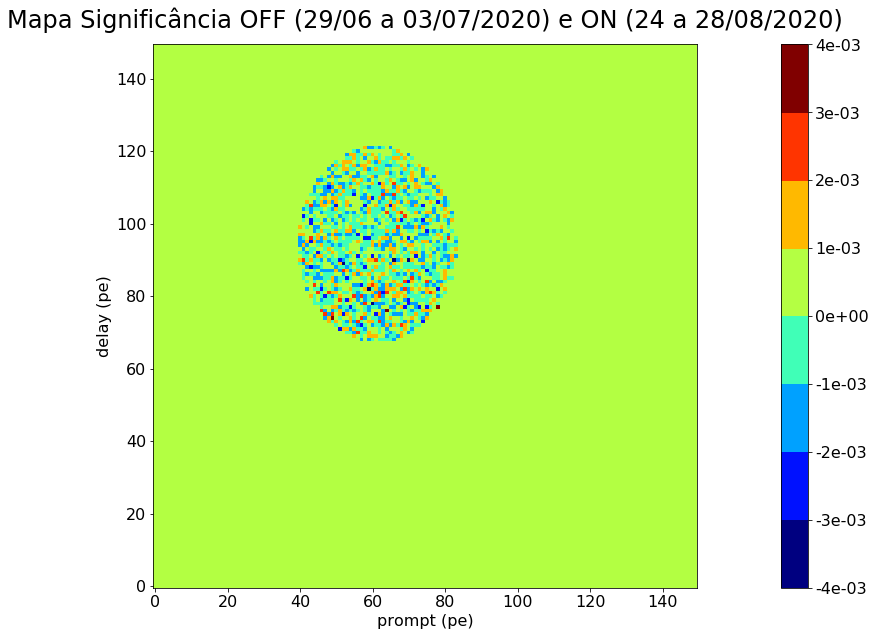

In [18]:
from matplotlib.colors import BoundaryNorm

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(np.min(S_subA),np.max(S_subA),10)
bounds = [-4e-3, -3e-3, -2e-3, -1e-3, 0, 1e-3, 2e-3, 3e-3, 4e-3]
norm = BoundaryNorm(bounds, cmap.N)

fig=plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 16})

myplot=plt.imshow(S_subA,interpolation='none',norm=norm,cmap=cmap,origin='lower')
plt.colorbar(myplot, format='%.0e')

#invertido para delay x prompt - 07/06/2022

#plt.colorbar()
plt.xlabel('prompt (pe)', size=16)
plt.ylabel('delay (pe)', size=16)
plt.title('Mapa Significância OFF (29/06 a 03/07/2020) e ON (24 a 28/08/2020)', size=24,y=1.02)
plt.savefig('histogramas/Mapa-Significancia-ONOFF.png')
plt.show()

In [19]:

h_Smapa = []
print('Inicio',datetime.datetime.now())

#tanto faz a inversão - 07/06/2022
for i in range(150):  
    for j in range(150):
        if (S_subA[i][j]!=0):
            h_Smapa.append(S_subA[i][j])
    #break
    
#print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2022-06-09 07:14:25.516569
Fim 2022-06-09 07:14:25.547820


C:\Users\RetailAdmin\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


['params x', array([37.,  0.,  7.])]


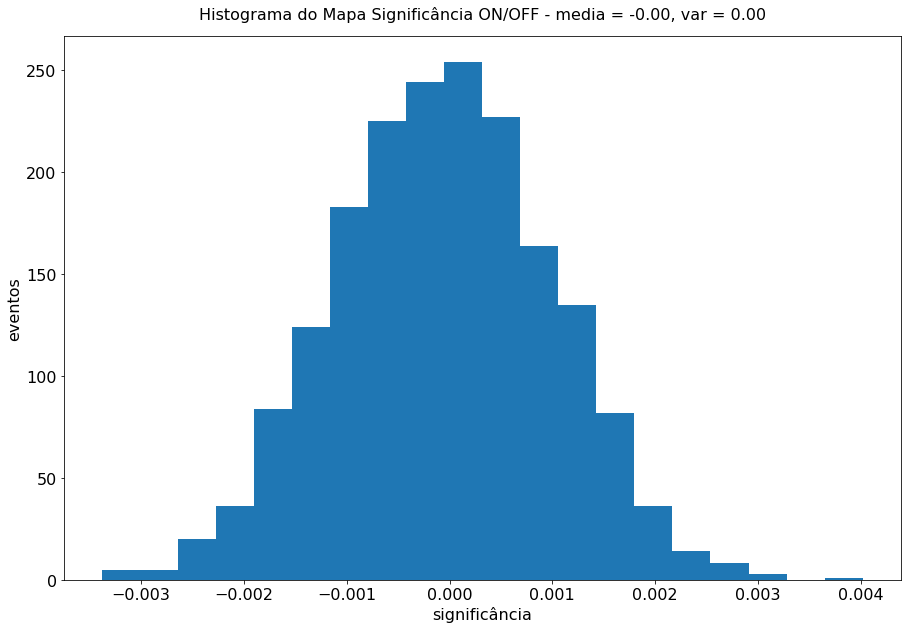

In [20]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

plt.hist(h_Smapa, bins = 20) #, density=True)
#plt.hist(t_subONOFF, bins = 50) #, density=True)

x_data = np.histogram(h_Smapa, bins=50) #int(np.amax(h_mapa)))
xx_data = np.linspace(int(np.amin(h_Smapa)), int(np.amax(h_Smapa)), num=len(x_data[0]))
params_x, params_covariance_x = optimize.curve_fit(fnt_fit_gauss_2, xx_data, x_data[0], [300,0,7])
print(['params x',params_x])
#mult_amp = 2.8#fator para plot amplitude da gaussiana
#plt.plot(xx_data, fnt_fit_gauss_2(xx_data, mult_amp*params_x[0], params_x[1], params_x[2]), label='Fitted function', color='r')
plt.plot(xx_data, fnt_fit_gauss_2(xx_data, params_x[0], params_x[1], params_x[2]), label='Fitted function', color='r')

plt.ylabel('eventos', size=16)
plt.xlabel('significância', size=16)
plt.title('Histograma do Mapa Significância ON/OFF - media = {0:.2f}, var = {1:.2f}'.format(np.mean(h_Smapa),np.var(h_Smapa)), size=16,y=1.02)
plt.savefig('histogramas/Hist_Mapa_Signif-ONOFF.png')
plt.show() 

## Outras pesquisas

In [89]:
print('Inicio',datetime.datetime.now())
h_PChiON = []

for sListDt in list_ON:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        df['chi_2']=((df['p_Total_pe'] - prompt_mean)**2)/prompt_var
        h_PChiON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                          ]['chi_2'].values)
        
print('Fim',datetime.datetime.now())




Inicio 2021-11-18 12:16:59.559992
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Fim 2021-11-18 12:30:56.218512


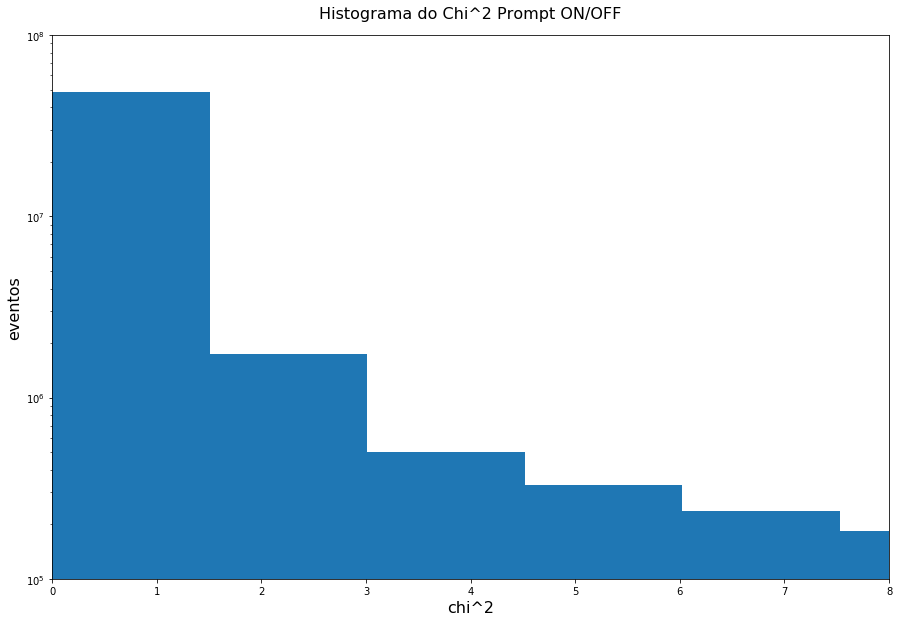

In [97]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')
ax.set_ylim([10**5, 10**8])
ax.set_xlim([0, 8])

plt.hist(h_PChiON, bins = 100) #, density=True)

plt.ylabel('eventos', size=16)
plt.xlabel('chi^2', size=16)
plt.title('Histograma do Chi^2 Prompt ON/OFF', size=16,y=1.02)
#plt.savefig('histogramas/Hist_PChi2-ON.png')
plt.show() 

In [91]:
print('Inicio',datetime.datetime.now())
h_DChiON = []

for sListDt in list_ON:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        df['chi_2']=((df['d_Total_pe'] - delay_mean)**2)/delay_var
        h_DChiON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                          ]['chi_2'].values)
        
print('Fim',datetime.datetime.now())



Inicio 2021-11-18 12:53:45.001325
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Fim 2021-11-18 13:09:56.717705


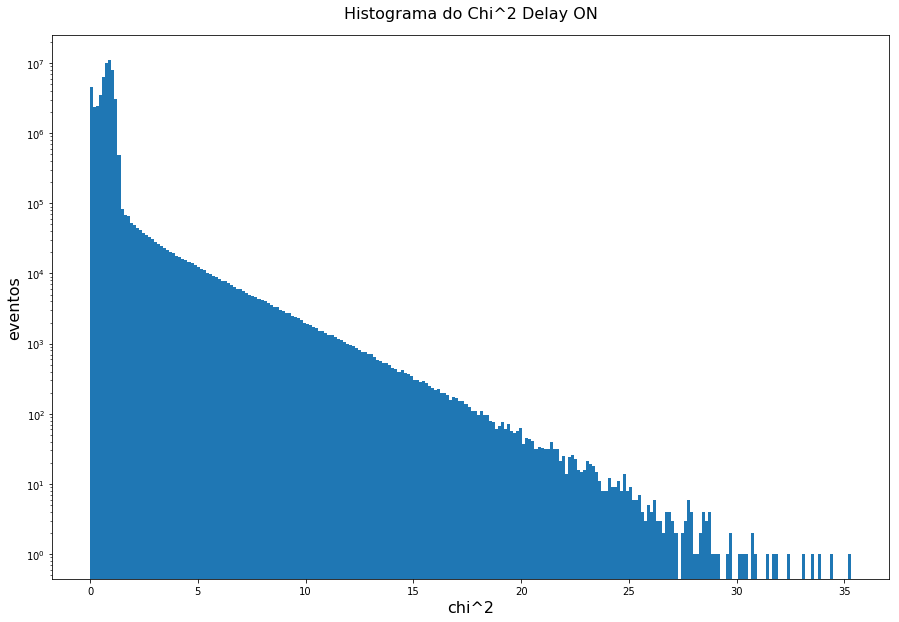

In [98]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

plt.hist(h_DChiON, bins = 250) #, density=True)

plt.ylabel('eventos', size=16)
plt.xlabel('chi^2', size=16)
plt.title('Histograma do Chi^2 Delay ON', size=16,y=1.02)
plt.savefig('histogramas/Hist_DChi2-ON.png')
plt.show() 

In [ ]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

plt.hist([h_PChiON,h_DChiON], bins = 500) #, density=True)

plt.ylabel('eventos', size=16)
plt.xlabel('chi^2', size=16)
plt.title('Histograma do Chi^2 Promtp / Delay ON', size=16,y=1.02)
#plt.savefig('histogramas/Hist_DChi2-ON.png')
plt.show() 

In [124]:
print('Inicio',datetime.datetime.now())
h_p_ON = []


for sListDt in list_ON:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)
    qPairs = 0

    for file in lista:
        df = pd.read_parquet(file)
        qPairs += df[((df['p_satured']==0)&(df['d_satured']==0)
                      #&(df['p_Total_pe']>=31)&(df['p_Total_pe']<=51) # 61 +- 30
                      &(df['d_Total_pe']>=85)&(df['d_Total_pe']<=100) # 95 +- 40
                      #&(df['d_timeInverval']>=150)&(df['d_timeInverval']<=200) #13 +- 6
                      &(df['d_mPMTs']>=25)
                     )]['Pair'].count()
    print(qPairs)
    for q in range(qPairs):
        h_p_ON.append(sDate)
        
    #break
    
    #print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2021-11-19 18:38:22.581870
data/20200824
95631
data/20200825
88946
data/20200826
89110
data/20200827
88093
data/20200828
96660
Fim 2021-11-19 18:49:26.355110


In [125]:
print('Inicio',datetime.datetime.now())
h_p_OFF = []


for sListDt in list_OFF:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)
    qPairs = 0

    for file in lista:
        df = pd.read_parquet(file)
        qPairs += df[((df['p_satured']==0)&(df['d_satured']==0)
                     # &(df['p_Total_pe']>=31)&(df['p_Total_pe']<=51) # 61 +- 30
                      &(df['d_Total_pe']>=85)&(df['d_Total_pe']<=100) # 95 +- 40
                      #&(df['d_timeInverval']>=150)&(df['d_timeInverval']<=200) #13 +- 6
                      &(df['d_mPMTs']>=25)
                     )]['Pair'].count()
    print(qPairs)
    for q in range(qPairs):
        h_p_OFF.append(sDate)
        
    #break
    
    #print(len(h_delay))
print('Fim',datetime.datetime.now())

Inicio 2021-11-19 18:49:26.577022
data/20200629
86502
data/20200630
92567
data/20200701
90875
data/20200702
89633
data/20200703
93779
Fim 2021-11-19 19:01:32.474679


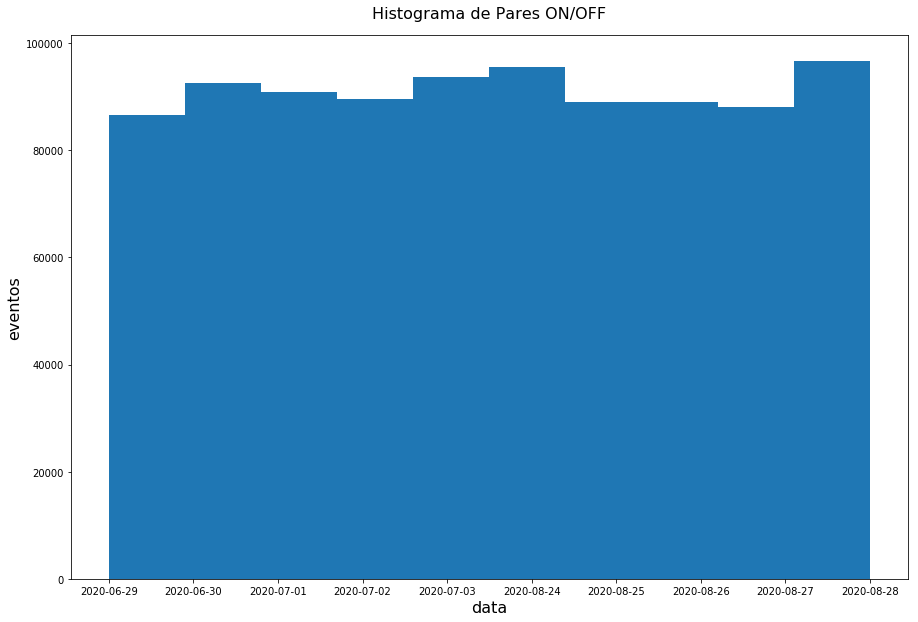

In [126]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_yscale('log')

h_p = []
h_p.extend(h_p_ON)
h_p.extend(h_p_OFF)

plt.hist(h_p) #, bins = 100) #, density=True)

plt.ylabel('eventos', size=16)
plt.xlabel('data', size=16)
plt.title('Histograma de Pares ON/OFF', size=16,y=1.02)
#plt.savefig('histogramas/Hist_PChi2-ON.png')
plt.show() 

In [156]:
print('Inicio',datetime.datetime.now())
h_PON = []

for sListDt in list_ON:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        h_PON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                      &(df['d_Total_pe']>=55)&(df['d_Total_pe']<=135) # 95 +- 40
                      #&(df['d_timeInverval']>=50)&(df['d_timeInverval']<=70) 
                         &(df['d_timeInverval']<=300) 
                          ]['d_timeInverval'].values)
        
    #break
        
print('Fim',datetime.datetime.now())



Inicio 2021-11-23 11:37:31.462552
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Fim 2021-11-23 11:48:52.405922


In [157]:
print('Inicio',datetime.datetime.now())
h_POFF = []

for sListDt in list_OFF:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        h_POFF.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                      &(df['d_Total_pe']>=55)&(df['d_Total_pe']<=135) # 95 +- 40
                      #&(df['d_timeInverval']>=50)&(df['d_timeInverval']<=70) 
                         &(df['d_timeInverval']<=300) 
                          ]['d_timeInverval'].values)
        
    #break
        
print('Fim',datetime.datetime.now())



Inicio 2021-11-23 11:48:52.596032
data/20200629
data/20200630
data/20200701
data/20200702
data/20200703
Fim 2021-11-23 12:00:21.832529


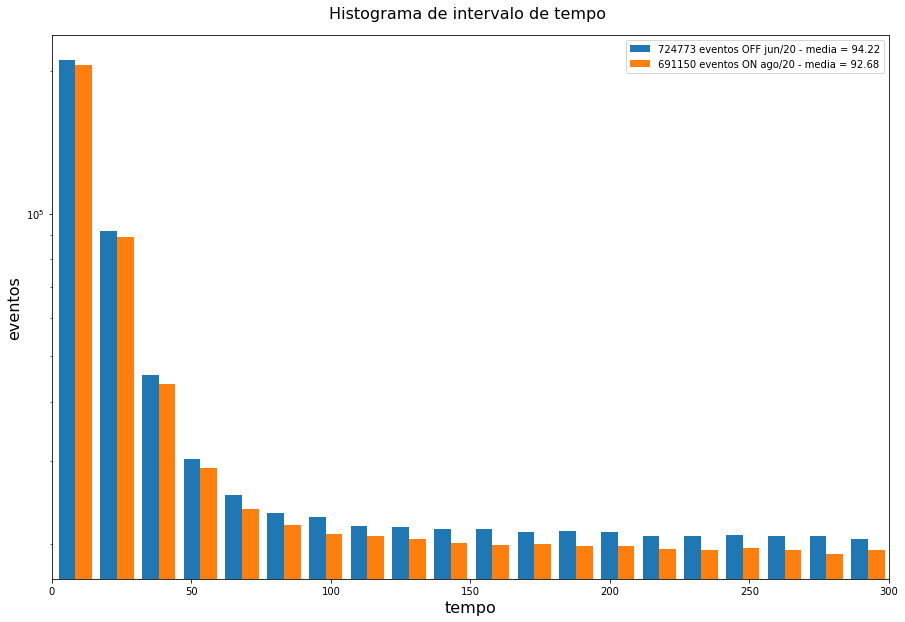

In [158]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 300])

ax.set_yscale('log')

plt.hist([h_POFF,h_PON], bins = 20) #, density=True)
plt.legend(labels=[str(len(h_POFF))+' eventos OFF jun/20 - media = {0:.2f}'.format(np.mean(h_POFF)),
                   str(len(h_PON))+' eventos ON ago/20 - media = {0:.2f}'.format(np.mean(h_PON))
                  ],
           loc='upper right')
plt.ylabel('eventos', size=16)
plt.xlabel('tempo', size=16)
plt.title('Histograma de intervalo de tempo ', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Delay_25chi2_Aceito.png')
plt.show() 

In [112]:
print('Inicio',datetime.datetime.now())
h_PChi_ON = []
h_DChi_ON = []
h_TChi_ON = []
h_iTChi_ON = []

h_DE_Chi_ON = []
h_PE_Chi_ON = []
h_PE_Chi_ON2 = []

for sListDt in list_ON:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        df['p_chi_2']=((df['p_Total_pe'] - prompt_mean)**2)/prompt_mean
        df['d_chi_2']=((df['d_Total_pe'] - delay_mean)**2)/delay_mean
        df['t_chi_2']=(((df['d_timeInverval']) - time_mean)**2)/time_var
        df['it_chi_2']=((df['d_timeInverval'] - itime_mean)**2)/itime_var
        df['pdt_chi_2']=((df['p_Total_pe'] - prompt_mean)**2)/prompt_mean + ((df['d_Total_pe'] - delay_mean)**2)/delay_mean + (((df['d_timeInverval']) - time_mean)**2)/time_var
        h_PChi_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(df['pdt_chi_2']<chi_sq_tab)
                          ]['p_chi_2'].values)
        h_DChi_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(df['pdt_chi_2']<chi_sq_tab)
                          ]['d_chi_2'].values)
        h_TChi_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(df['pdt_chi_2']<chi_sq_tab)
                          ]['t_chi_2'].values)
        h_iTChi_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(df['pdt_chi_2']<chi_sq_tab)
                          ]['it_chi_2'].values)
        
        h_iTChi_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(df['pdt_chi_2']<chi_sq_tab)
                          ]['it_chi_2'].values)
        
        h_DE_Chi_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(df['d_chi_2']<3.841)
                          ]['d_Total_pe'].values)
        h_PE_Chi_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(df['p_chi_2']<3.841)
                          ]['p_Total_pe'].values)
        h_PE_Chi_ON2.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(df['pdt_chi_2']<chi_sq_tab)
                          ]['p_Total_pe'].values)
        #break
        
print('Fim',datetime.datetime.now())



Inicio 2021-12-02 13:28:34.287474
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Fim 2021-12-02 13:41:45.395998


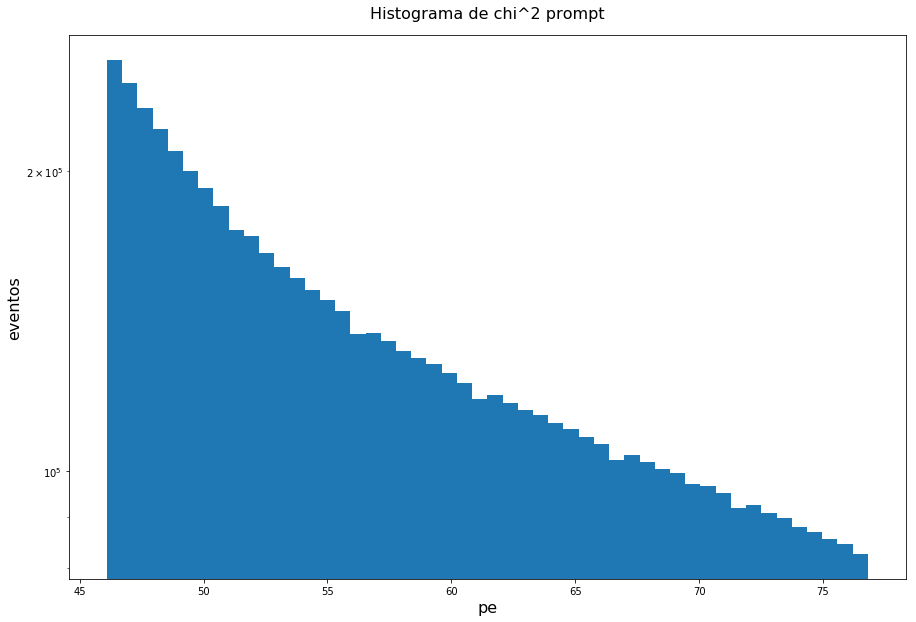

In [121]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 300])

ax.set_yscale('log')

#plt.hist([h_PE_Chi_ON,h_PE_Chi_ON2], bins = 50) #, density=True)
plt.hist(h_PE_Chi_ON, bins = 50) #, density=True)
#plt.legend(labels=[str(len(h_POFF))+' eventos OFF jun/20 - media = {0:.2f}'.format(np.mean(h_POFF)),
#                   str(len(h_PON))+' eventos ON ago/20 - media = {0:.2f}'.format(np.mean(h_PON))
#                  ],
#           loc='upper right')
plt.ylabel('eventos', size=16)
#plt.xlabel('chi^2', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de chi^2 prompt', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Delay_25chi2_Aceito.png')
plt.show() 

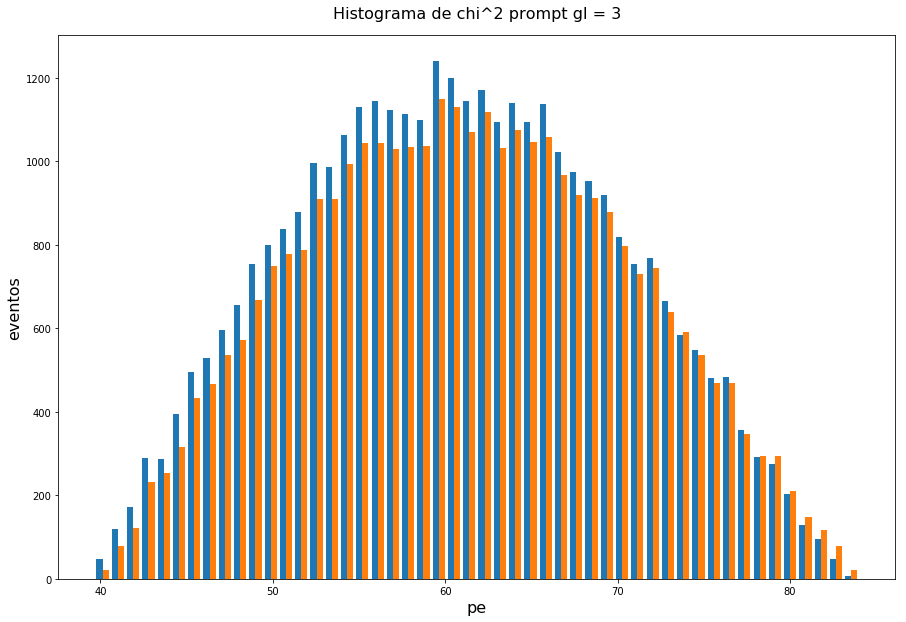

In [118]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 300])

#ax.set_yscale('log')

plt.hist([h_PE_Chi_ON2,h_promptChiON], bins = 50) #, density=True)
#plt.legend(labels=[str(len(h_POFF))+' eventos OFF jun/20 - media = {0:.2f}'.format(np.mean(h_POFF)),
#                   str(len(h_PON))+' eventos ON ago/20 - media = {0:.2f}'.format(np.mean(h_PON))
#                  ],
#           loc='upper right')
plt.ylabel('eventos', size=16)
#plt.xlabel('chi^2', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de chi^2 prompt gl = 3', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Delay_25chi2_Aceito.png')
plt.show() 

In [119]:
print(prompt_mean, delay_mean, time_mean, time_var, chi_sq_tab)

61.45215100965759 94.3970297029703 12.7 12.7 7.815


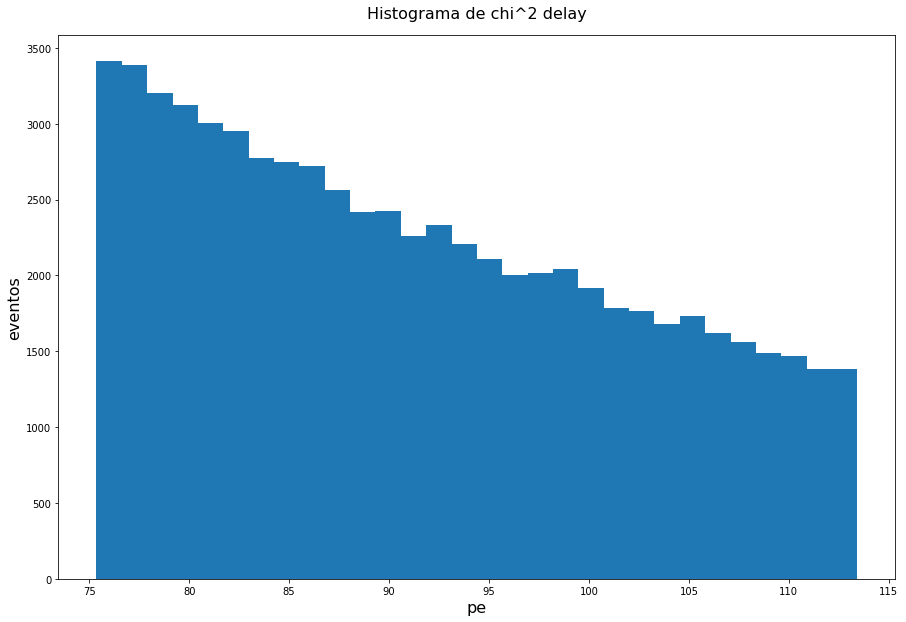

In [35]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 300])

#ax.set_yscale('log')

plt.hist(h_DE_Chi_ON, bins = 30) #, density=True)
#plt.legend(labels=[str(len(h_POFF))+' eventos OFF jun/20 - media = {0:.2f}'.format(np.mean(h_POFF)),
#                   str(len(h_PON))+' eventos ON ago/20 - media = {0:.2f}'.format(np.mean(h_PON))
#                  ],
#           loc='upper right')
plt.ylabel('eventos', size=16)
#plt.xlabel('chi^2', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de chi^2 delay', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Delay_25chi2_Aceito.png')
plt.show() 

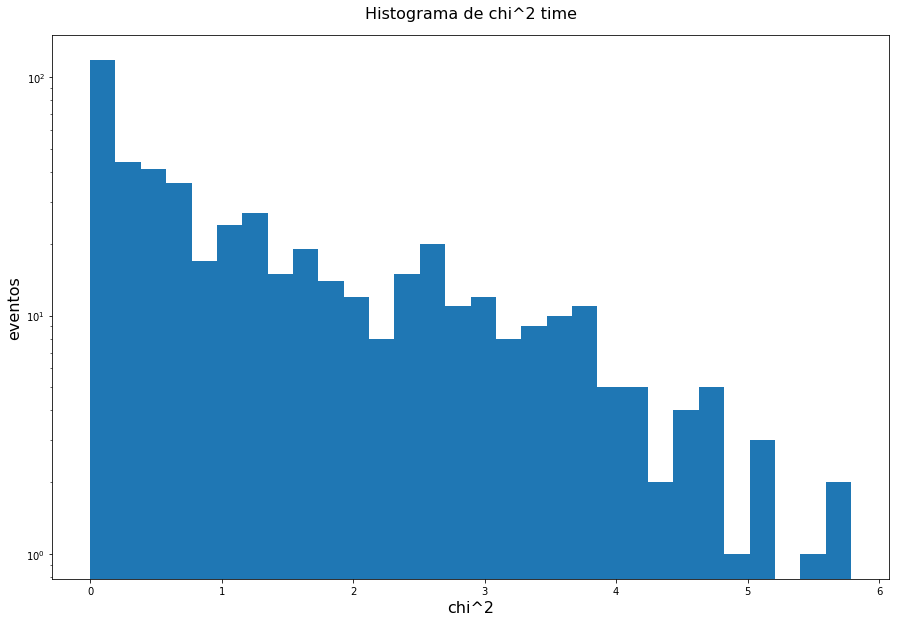

In [32]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 300])

ax.set_yscale('log')

plt.hist(h_TChi_ON, bins = 30) #, density=True)
#plt.legend(labels=[str(len(h_POFF))+' eventos OFF jun/20 - media = {0:.2f}'.format(np.mean(h_POFF)),
#                   str(len(h_PON))+' eventos ON ago/20 - media = {0:.2f}'.format(np.mean(h_PON))
#                  ],
#           loc='upper right')
plt.ylabel('eventos', size=16)
plt.xlabel('chi^2', size=16)
plt.title('Histograma de chi^2 time', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Delay_25chi2_Aceito.png')
plt.show() 

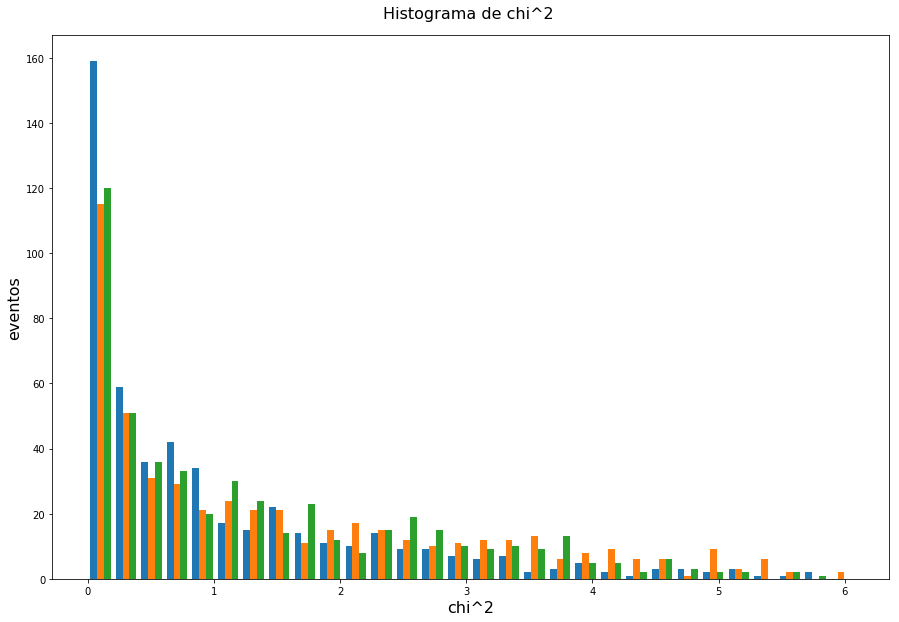

In [29]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 300])

#ax.set_yscale('log')

plt.hist([h_PChi_ON,h_DChi_ON,h_TChi_ON], bins = 30) #, density=True)
#plt.legend(labels=[str(len(h_POFF))+' eventos OFF jun/20 - media = {0:.2f}'.format(np.mean(h_POFF)),
#                   str(len(h_PON))+' eventos ON ago/20 - media = {0:.2f}'.format(np.mean(h_PON))
#                  ],
#           loc='upper right')
plt.ylabel('eventos', size=16)
plt.xlabel('chi^2', size=16)
plt.title('Histograma de chi^2 ', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Delay_25chi2_Aceito.png')
plt.show() 

In [94]:
#,,h_TChi_ON
cov_P_D = np.array([h_PChi_ON, h_DChi_ON])
#print(np.cov(cov_P_D))
print(np.cov(h_PChi_ON, h_DChi_ON))
print(np.corrcoef(h_PChi_ON, h_DChi_ON))

print('\nCorrelacao (Pearson) entre prompt/delay: ',np.corrcoef(h_PChi_ON, h_DChi_ON)[0][1])
# 0: linearmente independentes;
# 1, -1: linearmente dependentes;

#print(np.cov(h_PChi_ON, h_PChi_ON))
#print(np.corrcoef(h_PChi_ON, h_PChi_ON))
print('\n\n')
print(np.cov(h_PChi_ON, h_TChi_ON))
print(np.corrcoef(h_PChi_ON, h_TChi_ON))

print('\nCorrelacao (Pearson) entre prompt/tempo: ',np.corrcoef(h_PChi_ON, h_TChi_ON)[0][1])

print('\n\n')
print(np.cov(h_DChi_ON, h_TChi_ON))
print(np.corrcoef(h_DChi_ON, h_TChi_ON))

print('\nCorrelacao (Pearson) entre delay/tempo: ',np.corrcoef(h_DChi_ON, h_TChi_ON)[0][1])


[[ 1.4872539  -0.45820741]
 [-0.45820741  2.28161729]]
[[ 1.         -0.24874144]
 [-0.24874144  1.        ]]

Correlacao (Pearson) entre prompt/delay:  -0.24874144433786097



[[ 1.4872539  -0.33536131]
 [-0.33536131  1.79678665]]
[[ 1.         -0.20515029]
 [-0.20515029  1.        ]]

Correlacao (Pearson) entre prompt/tempo:  -0.20515029343690697



[[ 2.28161729 -0.67324537]
 [-0.67324537  1.79678665]]
[[ 1.         -0.33250924]
 [-0.33250924  1.        ]]

Correlacao (Pearson) entre delay/tempo:  -0.33250924055699693


## Teste de covariancia

In [103]:
print('Inicio',datetime.datetime.now())
c_promptChiON = []
c_delayChiON = []
c_timeChiON = []

for sListDt in list_ON:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        c_promptChiON.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
                                )]['p_Total_pe'].values)
        c_delayChiON.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_Total_pe'].values)
        c_timeChiON.extend(df[((df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_timeInverval'].values)

print('Fim',datetime.datetime.now())

Inicio 2021-12-01 16:27:33.353843
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Fim 2021-12-01 16:42:44.260178


In [105]:
print('\n\n')
print(np.cov(c_promptChiON, c_delayChiON))
print(np.corrcoef(c_promptChiON, c_delayChiON))

print('\nCorrelacao (Pearson) entre prompt/delay: ',np.corrcoef(c_promptChiON, c_delayChiON)[0][1])

print('\n\n')
print(np.cov(c_promptChiON, c_timeChiON))
print(np.corrcoef(c_promptChiON, c_timeChiON))

print('\nCorrelacao (Pearson) entre prompt/tempo: ',np.corrcoef(c_promptChiON, c_timeChiON)[0][1])

print('\n\n')
print(np.cov(c_delayChiON, c_timeChiON))
print(np.corrcoef(c_delayChiON, c_timeChiON))

print('\nCorrelacao (Pearson) entre delay/tempo: ',np.corrcoef(c_delayChiON, c_timeChiON)[0][1])





[[1291.61429429   93.67589364]
 [  93.67589364 1397.81850729]]
[[1.         0.06971657]
 [0.06971657 1.        ]]

Correlacao (Pearson) entre prompt/delay:  0.06971657294205884



[[ 1.29161429e+03 -1.47406622e+03]
 [-1.47406622e+03  2.87374955e+07]]
[[ 1.         -0.00765114]
 [-0.00765114  1.        ]]

Correlacao (Pearson) entre prompt/tempo:  -0.007651139408787654






KeyboardInterrupt



In [106]:
print('\n\n')
print(np.cov(c_delayChiON, c_timeChiON))
print(np.corrcoef(c_delayChiON, c_timeChiON))

print('\nCorrelacao (Pearson) entre delay/tempo: ',np.corrcoef(c_delayChiON, c_timeChiON)[0][1])




[[ 1.39781851e+03 -8.16065717e+02]
 [-8.16065717e+02  2.87374955e+07]]
[[ 1.        -0.0040717]
 [-0.0040717  1.       ]]

Correlacao (Pearson) entre delay/tempo:  -0.004071695402826678


In [104]:
print('\n\n')
print(np.cov(h_promptChiON, h_delayChiON))
print(np.corrcoef(h_promptChiON, h_delayChiON))

print('\nCorrelacao (Pearson) entre prompt/delay: ',np.corrcoef(h_promptChiON, h_delayChiON)[0][1])

print('\n\n')
print(np.cov(h_promptChiON, h_timeChiON))
print(np.corrcoef(h_promptChiON, h_timeChiON))

print('\nCorrelacao (Pearson) entre prompt/tempo: ',np.corrcoef(h_promptChiON, h_timeChiON)[0][1])

print('\n\n')
print(np.cov(h_delayChiON, h_timeChiON))
print(np.corrcoef(h_delayChiON, h_timeChiON))

print('\nCorrelacao (Pearson) entre delay/tempo: ',np.corrcoef(h_delayChiON, h_timeChiON)[0][1])





[[ 85.21528962  -1.00821919]
 [ -1.00821919 115.42623608]]
[[ 1.         -0.01016586]
 [-0.01016586  1.        ]]

Correlacao (Pearson) entre prompt/delay:  -0.010165855500782764



[[85.21528962 -0.25395273]
 [-0.25395273 18.69604933]]
[[ 1.         -0.00636237]
 [-0.00636237  1.        ]]

Correlacao (Pearson) entre prompt/tempo:  -0.006362374014134368



[[115.42623608  -2.6117705 ]
 [ -2.6117705   18.69604933]]
[[ 1.        -0.0562222]
 [-0.0562222  1.       ]]

Correlacao (Pearson) entre delay/tempo:  -0.05622219830369648


In [ ]:
m_data = np.histogram(m, bins=int(np.amax(m)))
    xm_data = np.linspace(0, int(np.amax(m)), num=len(m_data[0]))
    params_m, params_covariance_m = optimize.curve_fit(fnt_fit_gauss_2, xm_data, m_data[0], [3,60,1])
    print(['params m',params_m])
    w_data = np.histogram(w, bins=int(np.amax(w)))
    xw_data = np.linspace(110, int(np.amax(w)), num=len(w_data[0]))
    params_w, params_covariance_w = optimize.curve_fit(fnt_fit_gauss_2, xw_data, w_data[0], [3,200,1])
    print(['params w',params_w])
    plt.plot(xm_data, fnt_fit_passaalta(xm_data, params_m[1], params_m[2]), label='Passa Alta 3MeV', color='g')
    plt.plot(xw_data, fnt_fit_passabaixa(xw_data, params_w[1], params_w[2]), label='Passa Alta 8MeV', color='g')


## Processamento ON

In [20]:
print('Inicio',datetime.datetime.now())
h_P_ON = []
h_D_ON = []
h_PDP_ON = []
h_PDD_ON = []
h_PDT_ON = []
h_PD_pPDF_ON = []
totalPositrons_ON = 0
totalNonSat_ON = 0
i_day = 0
count_day_ON = [0, 0, 0, 0, 0, 0, 0]
Freq10_200_day_ON = [0, 0, 0, 0, 0, 0, 0]

for sListDt in list_ON:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        '''
        #seleção do prompt: pelo intervalo entre 3MeV e 8MeV e cujo próximo evento esteja entre 8us e 50us
        h_P_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=8)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                          ]['p_Total_pe'].values)
        #seleção do delay: pelo intervalo de energia simulado e evento esteja entre 8us e 50us com mais de 25PMT acionada
        h_D_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                          ]['d_Total_pe'].values)
        '''
        dff = df[(df['p_satured']==0)&(df['d_satured']==0)
                            #&(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=10)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                ]
        h_PDP_ON.extend(dff['p_Total_pe'].values)
        h_PDD_ON.extend(dff['d_Total_pe'].values)
        h_PDT_ON.extend(dff['d_timeInverval'].values)
        h_PD_pPDF_ON.extend(dff['p_PDF'].values)

        '''
        #seleção do prompt: pelo passa-banda e cujo próximo evento esteja entre 8us e 50us
        h_PDP_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=1)&(fnt_pe2MeV(df['p_Total_pe'])<=10)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                          ]['p_Total_pe'].values)
        #seleção do delay: pelo intervalo de energia simulado e evento esteja entre 8us e 50us com mais de 25PMT acionada
        h_PDD_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=8)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                          ]['d_Total_pe'].values)
        #seleção do delay: pelo intervalo de energia simulado e evento esteja entre 8us e 50us com mais de 25PMT acionada
        h_PDT_ON.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=8)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                          ]['d_timeInverval'].values)
        '''
        ## aqui farei a contagem diaria de pares viáveis (acima) e também Freq 10-200pe/dia
        dfc = df[(df['p_satured']==0)&(df['d_satured']==0)
                 &(df['p_Total_pe']>=10)&(df['p_Total_pe']<=200)
                ]
        
        Freq10_200_day_ON[i_day] += dfc.count()[0]
        count_day_ON[i_day] += df[(df['p_satured']==0)&(df['d_satured']==0)].count()[0]
        totalPositrons_ON += df.count()[0]
        totalNonSat_ON += df[(df['p_satured']==0)&(df['d_satured']==0)].count()[0]
        #break
        
    i_day += 1
    #break
                            
#print(len(h_P_ON))
#print(len(h_D_ON))
print(len(h_PDP_ON))
print(len(h_PDD_ON))
print(len(h_PDT_ON))
print('Em 5 dias: ',totalPositrons_ON)
print('Por dia: ',totalPositrons_ON/5)
print('Em Hz: ',totalPositrons_ON/5/86400) 
print('Em 5 dias (NS): ',totalNonSat_ON)
print('Por dia (NS): ',totalNonSat_ON/5)
print('Em Hz (NS): ',totalNonSat_ON/5/86400) 

        
print('Fim',datetime.datetime.now())



Inicio 2023-04-29 12:57:35.811900
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
53929
53929
53929
Em 5 dias:  80566799
Por dia:  16113359.8
Em Hz:  186.4972199074074
Em 5 dias (NS):  52656884
Por dia (NS):  10531376.8
Em Hz (NS):  121.8909351851852
Fim 2023-04-29 13:30:24.529996


In [7]:
print('Em 5 dias: ',totalPositrons_ON)
print('Por dia: ',totalPositrons_ON/5)
print('Em Hz: ',totalPositrons_ON/5/86400) 

print('Frequencia 10-200pe/dia: ',
      Freq10_200_day_ON[0],Freq10_200_day_ON[1],Freq10_200_day_ON[2],
      Freq10_200_day_ON[3],Freq10_200_day_ON[4])
print('count by day: ',
      count_day_ON[0],count_day_ON[1],count_day_ON[2],
      count_day_ON[3],count_day_ON[4])
print('Frequencia 10-200pe/s: ',Freq10_200_day_ON[0]/86400)


Em 5 dias:  80566799
Por dia:  16113359.8
Em Hz:  186.4972199074074
Frequencia 10-200pe/dia:  10443662 10503716 10419013 10153342 10544916
count by day:  10565967 10616219 10536684 10268537 10669477
Frequencia 10-200pe/s:  120.8757175925926


In [ ]:
#maxElement = int(np.amax(h_P_ON)/5)
maxElement = int(np.amax(h_D_ON)/5)

#plt.hist([h_P_ON,h_D_ON],bins=maxElement,histtype='step')
plt.hist(h_D_ON,bins=maxElement,histtype='step')
plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de delay', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Delay_chi2_Aceito.png')
plt.show()


In [21]:
# 3MeV: 'params m', array([36.7952354 , 63.94190579, 12.30416433])]
# 7MeV: ['params c', array([ 18.13818817, 167.38386784,  24.17745454])]
# 8MeV: ['params w', array([ 16.60083832, 196.41720307,  26.28364681])]

params_m= [36.7952354 , 63.94190579, 12.30416433]  #3MeV
#params_c= [ 18.13818817, 167.38386784,  24.17745454]
params_c= [ 13.57581613, 287.66548111,  22.42501536]  #10MeV
#print(params_m[1])
list_wp = []   #peso pelo passa-banda
list_wp2 = []  #corte seco entre 3 - 10MeV
i = 0 
s = 0
#acrescentado a soma da incerteza pe/DUQ - Willian - 28/09/2022
sigma_peDUQ = 0.008 #sigma_peDUQ = 0.6/78.0 = 0.008 pe/DUQ
list_sig = []
list_sig2 = []

for a in h_PDP_ON:
    p = fnt_fit_passabanda(a)
    list_wp.append(p)
    list_sig.append(p*a*sigma_peDUQ)
    
    if (fnt_pe2MeV(a)>=3)&(fnt_pe2MeV(a)<=10):
        list_wp2.append(1)
        list_sig2.append(a*sigma_peDUQ)
    else:
        list_wp2.append(0)
        list_sig2.append(0)

    i +=1
 #   if (i<=300):
  #      print(i,a, p, sigma_peDUQ, a*p*sigma_peDUQ)
    s +=p

#print('Soma eventos inteiros',i)
#print('Soma eventos fracionários',s)
print('soma passabanda: {:.0f} \u00B1 {:.0f}'.format(sum(list_wp),sum(list_sig)/(sum(list_wp)**0.5)))
print('soma entre 3 e 10MeV: {:.0f} \u00B1 {:.0f}'.format(sum(list_wp2),sum(list_sig2)/(sum(list_wp2)**0.5)))
print('soma passabanda/dia: {:.0f} \u00B1 {:.0f}'.format(sum(list_wp)/5,sum(list_sig)/(sum(list_wp)**0.5)/5))
print('soma entre 3 e 10MeV/dia: {:.0f} \u00B1 {:.0f}'.format(sum(list_wp2)/5,sum(list_sig2)/(sum(list_wp)**0.5)/5))


soma passabanda: 21398 ± 113
soma entre 3 e 10MeV: 21261 ± 114
soma passabanda/dia: 4280 ± 23
soma entre 3 e 10MeV/dia: 4252 ± 23


In [ ]:
maxElement = int(np.amax(h_P_ON)/5)
#maxElement = int(np.amax(h_D_ON)/5)

#plt.hist([h_P_ON,h_D_ON],bins=maxElement,histtype='step')
plt.hist(h_P_ON,bins=maxElement,histtype='step', weights=list_wp)
plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de prompt', size=16,y=1.02)
#plt.savefig('histogramas/Hist_Delay_chi2_Aceito.png')
plt.show()

## Histograma de candidatos prompt/delay

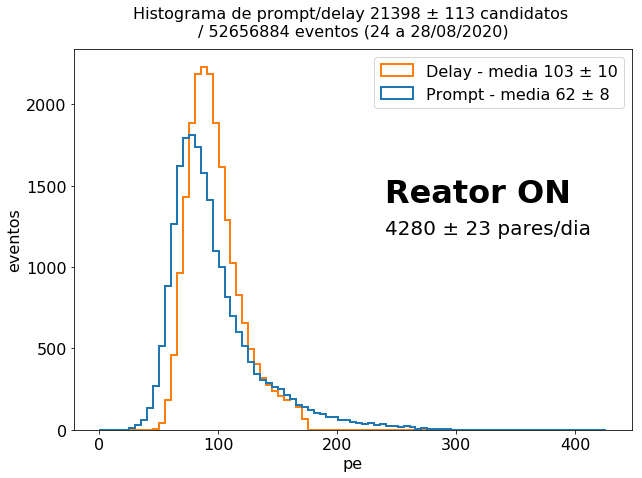

In [23]:
maxElement = int(np.amax(h_PDP_ON)/10)
maxElement = int(np.amax(h_PDP_ON)/5)
fig=plt.figure(figsize=(10,7))

plt.rcParams.update({'font.size': 16})

#plt.hist([h_P_ON,h_D_ON],bins=maxElement,histtype='step')
plt.hist([h_PDP_ON,h_PDD_ON],bins=maxElement,histtype='step', linewidth=2, 
          #       weights=[h_PD_pPDF_ON,h_PD_pPDF_ON], #weights=[list_wp,list_wp],
                 weights=[list_wp,list_wp],
                 label=['Prompt - media {:.0f} \u00b1 {:.0f}'.format(np.mean(h_PDP_ON),(np.mean(h_PDP_ON)**0.5)),
                        'Delay - media {:.0f} \u00b1 {:.0f}'.format(np.mean(h_PDD_ON),(np.mean(h_PDD_ON)**0.5))
                       ])
plt.legend(loc='upper right')

plt.text(240, 1400, 'Reator ON', fontsize=32, fontweight='bold')
plt.text(240, 1200, '{:.0f} \u00B1 {:.0f} pares/dia'.format(sum(list_wp)/5,sum(list_sig)/(sum(list_wp)**0.5)/5),
         fontsize=20)

plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)  #(passa-banda)
plt.title('Histograma de prompt/delay {:.0f} \u00B1 {:.0f} candidatos \n/ {:d} eventos (24 a 28/08/2020)'.
          format(sum(list_wp),sum(list_sig)/(sum(list_wp)**0.5), int(totalNonSat_ON)), size=16,y=1.02)
          #format(sum(h_PD_pPDF_ON),int(totalNonSat_ON)), size=16,y=1.02)
          #format(sum(h_PDP_ON),int(totalNonSat_ON)), size=16,y=1.02)
plt.savefig('histogramas/Hist_PD_ON_Simulation_PB.png')
plt.show()

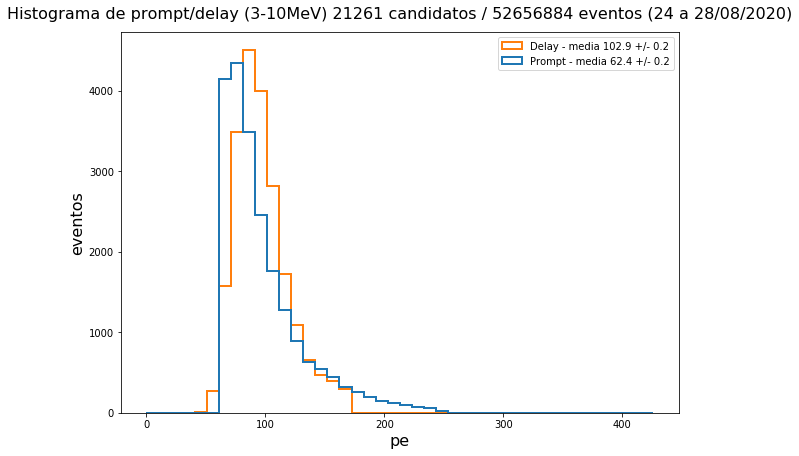

In [23]:
maxElement = int(np.amax(h_PDP_ON)/10)
#maxElement = int(np.amax(h_D_ON)/5)
fig=plt.figure(figsize=(10,7))

#plt.hist([h_P_ON,h_D_ON],bins=maxElement,histtype='step')
plt.hist([h_PDP_ON,h_PDD_ON],bins=maxElement,histtype='step', linewidth=2, 
          #       weights=[h_PD_pPDF_ON,h_PD_pPDF_ON], #weights=[list_wp,list_wp],
                 weights=[list_wp2,list_wp2],
                 label=['Prompt - media {:.1f} +/- {:.1f}'.format(np.mean(h_PDP_ON),1/(np.std(h_PDP_ON)**0.5)),
                        'Delay - media {:.1f} +/- {:.1f}'.format(np.mean(h_PDD_ON),1/(np.std(h_PDD_ON)**0.5))
                       ])
plt.legend(loc='upper right')

plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de prompt/delay (3-10MeV) {:.0f} candidatos / {:d} eventos (24 a 28/08/2020)'.
          format(sum(list_wp2),int(totalNonSat_ON)), size=16,y=1.02)
          #format(sum(h_PD_pPDF_ON),int(totalNonSat_ON)), size=16,y=1.02)
          #format(sum(h_PDP_ON),int(totalNonSat_ON)), size=16,y=1.02)
plt.savefig('histogramas/Hist_PD_ON_Simulation.png')
plt.show()

In [31]:
print(len(list_wp))

53737


In [35]:
rh, rw = 200, 200
t_subPD = [[0.0 for x in range(rw)] for y in range(rh)]  

print('Inicio',datetime.datetime.now())

for index1 in range(len(h_PDP_ON)):
    i=int(h_PDP_ON[index1]) #prompt int energy
    j=int(h_PDD_ON[index1]) #delay int energy
    if (i<rw)and(j<rh):
        t_subPD[j][i]+=list_wp[index1]
    
print('Fim',datetime.datetime.now())



Inicio 2022-07-16 11:04:18.302155
Fim 2022-07-16 11:04:18.599033


15.551926991642874
0.0


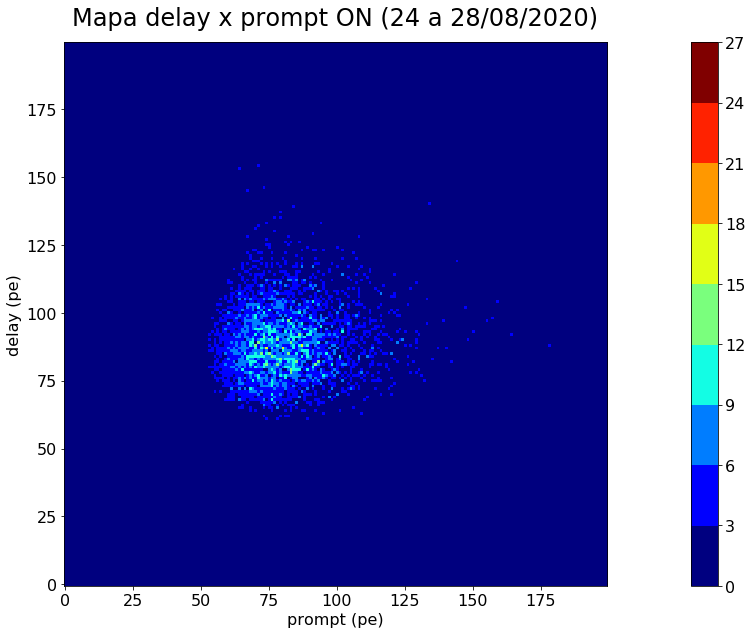

In [36]:
from matplotlib.colors import BoundaryNorm

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
print(np.max(t_subPD))
print(np.min(t_subPD))
bounds = np.linspace(np.min(t_subPD),np.max(t_subPD),7)
bounds = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
norm = BoundaryNorm(bounds, cmap.N)

fig=plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 16})

myplot=plt.imshow(t_subPD,interpolation='none',norm=norm,cmap=cmap,origin='lower')
plt.colorbar(myplot) #, format='%.00e')

plt.xlabel('prompt (pe)', size=16)
plt.ylabel('delay (pe)', size=16)
plt.title('Mapa delay x prompt ON (24 a 28/08/2020)', size=24,y=1.02)
plt.savefig('histogramas/Mapa-delay-prompt-ON-Simulation.png')
plt.show()

## Processamento para OFF

In [7]:
print('Inicio',datetime.datetime.now())
h_PDP_OFF = []
h_PDD_OFF = []
h_PDT_OFF = []
h_PD_pPDF_OFF = []
totalPositrons_OFF = 0
totalNonSat_OFF = 0

for sListDt in list_OFF:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        dff = df[(df['p_satured']==0)&(df['d_satured']==0)
                            #&(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=10)  ##Depois aplica  o PB - 29/04/23
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                ]
        h_PDP_OFF.extend(dff['p_Total_pe'].values)
        h_PDD_OFF.extend(dff['d_Total_pe'].values)
        h_PDT_OFF.extend(dff['d_timeInverval'].values)
        h_PD_pPDF_OFF.extend(dff['p_PDF'].values)

        '''
        #seleção do prompt: pelo passa-banda e cujo próximo evento esteja entre 8us e 50us
        h_PDP_OFF.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=8)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                          ]['p_Total_pe'].values)
        #seleção do delay: pelo intervalo de energia simulado e evento esteja entre 8us e 50us com mais de 25PMT acionada
        h_PDD_OFF.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=8)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                          ]['d_Total_pe'].values)
        #seleção do delay: pelo intervalo de energia simulado e evento esteja entre 8us e 50us com mais de 25PMT acionada
        h_PDT_OFF.extend(df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=8)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                          ]['d_timeInverval'].values)
        '''

        totalPositrons_OFF += df.count()[0]
        totalNonSat_OFF += df[(df['p_satured']==0)&(df['d_satured']==0)].count()[0]
        #break
    #break
                            
print(len(h_PDP_OFF))
print(len(h_PDD_OFF))
print(len(h_PDT_OFF))
print('Em 5 dias: ',totalPositrons_OFF)
print('Por dia: ',totalPositrons_OFF/5)
print('Em Hz: ',totalPositrons_OFF/5/86400) 
print('Em 5 dias (NS): ',totalNonSat_OFF)
print('Por dia (NS): ',totalNonSat_OFF/5)
print('Em Hz (NS): ',totalNonSat_OFF/5/86400) 

        
print('Fim',datetime.datetime.now())


Inicio 2023-04-29 11:38:35.871105
data/20200629
data/20200630
data/20200701
data/20200702
data/20200703
53853
53853
53853
Em 5 dias:  82407776
Por dia:  16481555.2
Em Hz:  190.75874074074073
Em 5 dias (NS):  52927482
Por dia (NS):  10585496.4
Em Hz (NS):  122.51731944444445
Fim 2023-04-29 12:00:51.854633


In [8]:
print('Inicio',datetime.datetime.now())

cday_PD_OFF = []
cday_NSat_OFF = []
cday_All_OFF = []

for sListDt in list_OFF:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    ctot_PD_OFF = 0
    ctot_NSat_OFF = 0
    ctot_All_OFF = 0
    
    for file in lista:
        df = pd.read_parquet(file)
        dff = df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=10)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                ]
        ctot_PD_OFF+=dff.count()[0]
        ctot_NSat_OFF+=df[(df['p_satured']==0)&(df['d_satured']==0)].count()[0]
        ctot_All_OFF+=df.count()[0]
        
    cday_PD_OFF.append(ctot_PD_OFF)
    cday_NSat_OFF.append(ctot_NSat_OFF)
    cday_All_OFF.append(ctot_All_OFF)

print('Contagem diária eventos filtrados (OFF)',cday_PD_OFF)
print('Contagem diária eventos não saturados (OFF)',cday_NSat_OFF)
print('Contagem diária eventos totais (OFF)',cday_All_OFF)
print('Média / DP eventos não saturados (OFF)',np.mean(cday_NSat_OFF),np.std(cday_NSat_OFF))
        
print('Fim',datetime.datetime.now())

Inicio 2023-01-25 14:52:52.427817
data/20200629
data/20200630
data/20200701
data/20200702
data/20200703
Contagem diária eventos filtrados (OFF) [4167, 4331, 4283, 4046, 4278]
Contagem diária eventos não saturados (OFF) [10385204, 10666772, 10588204, 10457313, 10829989]
Contagem diária eventos totais (OFF) [16024143, 16686411, 16823250, 16286953, 16587019]
Média / DP eventos não saturados (OFF) 10585496.4 156804.15507326327
Fim 2023-01-25 15:14:50.425434


In [65]:
print('Média / DP / Erro diária dos eventos não saturados (OFF)',np.mean(cday_NSat_OFF),np.std(cday_NSat_OFF),np.std(cday_NSat_OFF)/(sum(cday_NSat_OFF)**0.5))


Média / DP / Erro dos eventos não saturados (OFF) 10585496.4 156804.15507326327 21.553457629420944


In [9]:
print('Inicio',datetime.datetime.now())

cday_PD_ON = []
cday_NSat_ON = []
cday_All_ON = []

for sListDt in list_ON:
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    ctot_PD_ON = 0
    ctot_NSat_ON = 0
    ctot_All_ON = 0
    
    for file in lista:
        df = pd.read_parquet(file)
        dff = df[(df['p_satured']==0)&(df['d_satured']==0)
                            &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=10)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                ]
        ctot_PD_ON+=dff.count()[0]
        ctot_NSat_ON+=df[(df['p_satured']==0)&(df['d_satured']==0)].count()[0]
        ctot_All_ON+=df.count()[0]

    cday_PD_ON.append(ctot_PD_ON)
    cday_NSat_ON.append(ctot_NSat_ON)
    cday_All_ON.append(ctot_All_ON)

print('Contagem diária eventos filtrados (ON)',cday_PD_ON)
print('Contagem diária eventos não saturados (ON)',cday_NSat_ON)
print('Contagem diária eventos totais (ON)',cday_All_ON)
print('Média / DP eventos não saturados (ON)',np.mean(cday_NSat_ON),np.std(cday_NSat_ON))
print('Média / DP / Erro diária dos eventos não saturados (OFF)',np.mean(cday_NSat_ON),np.std(cday_NSat_ON),np.std(cday_NSat_ON)/(sum(cday_NSat_ON)**0.5))

        
print('Fim',datetime.datetime.now())

Inicio 2023-01-25 15:14:50.821466
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Contagem diária eventos filtrados (ON) [4260, 4243, 4147, 4082, 4529]
Contagem diária eventos não saturados (ON) [10565967, 10616219, 10536684, 10268537, 10669477]
Contagem diária eventos totais (ON) [15838519, 16276638, 16239464, 15889027, 16323151]
Média / DP eventos não saturados (ON) 10531376.8 138981.4900717358
Média / DP / Erro diária dos eventos não saturados (OFF) 10531376.8 138981.4900717358 19.152672636967864
Fim 2023-01-25 15:36:37.936393


In [34]:
##cday_PD_ON  = [4260, 4243, 4147, 4082, 4529]
##cday_PD_OFF = [4167, 4331, 4283, 4046, 4278]
print('Média / DP / Erro diária dos eventos filtrados (ON)',np.mean(cday_PD_ON),np.std(cday_PD_ON),np.std(cday_PD_ON)/(5**0.5))
print('Média / DP / Erro diária dos eventos filtrados (OFF)',np.mean(cday_PD_OFF),np.std(cday_PD_OFF),np.std(cday_PD_OFF)/(5**0.5))
print('Incerteza Filtrados',( ( (np.std(cday_PD_ON)/(5**0.5))**2 + (np.std(cday_PD_OFF)/(5**0.5))**2 )**0.5   ))
print('Incerteza Não Saturados',( ( (np.std(cday_NSat_ON)/(5**0.5))**2 + (np.std(cday_NSat_OFF)/(5**0.5))**2 )**0.5   ))


Média / DP / Erro diária dos eventos filtrados (ON) 4252.2 152.8390002584419 68.3516788381968
Média / DP / Erro diária dos eventos filtrados (OFF) 4221.0 102.69761438319782 45.92776937757809
Incerteza Filtrados 82.34872190872181
Incerteza Não Saturados 93705.28014023542


In [7]:
# 3MeV: 'params m', array([36.7952354 , 63.94190579, 12.30416433])]
# 7MeV: ['params c', array([ 18.13818817, 167.38386784,  24.17745454])]
# 8MeV: ['params w', array([ 16.60083832, 196.41720307,  26.28364681])]
'''
params_m= [36.7952354 , 63.94190579, 12.30416433]
params_c= [ 18.13818817, 167.38386784,  24.17745454]
#print(params_m[1])
list_wp_off = []
i = 0 
s = 0
for a in h_PDP_OFF:
    p = 1
    if (fnt_pe2MeV(a)>=3)&(fnt_pe2MeV(a)<=4):
        p = fnt_fit_passaalta(a,params_m[1],params_m[2])
    if (fnt_pe2MeV(a)>=7)&(fnt_pe2MeV(a)<=8):
        p = fnt_fit_passabaixa(a,params_c[1],params_c[2])
    list_wp_off.append(p)
    i +=1
    s +=p

print('Soma eventos inteiros',i)
print('Soma eventos fracionários',s)
'''

Soma eventos inteiros 21105
Soma eventos fracionários 18125.099677796967


In [8]:

list_wp_off = []   #peso pelo passa-banda
list_wp2_off = []  #corte seco entre 3 - 10MeV
i = 0 
s = 0

#acrescentado a soma da incerteza pe/DUQ - Willian - 28/09/2022
sigma_peDUQ = 0.008 #sigma_peDUQ = 0.6/78.0 = 0.008 pe/DUQ
list_sig_off = []
list_sig2_off = []


for a in h_PDP_OFF:
    p = fnt_fit_passabanda(a)
    list_wp_off.append(p)
    list_sig_off.append(p*a*sigma_peDUQ)
    
    if (fnt_pe2MeV(a)>=3)&(fnt_pe2MeV(a)<=10):
        list_wp2_off.append(1)
        list_sig2_off.append(a*sigma_peDUQ)
    else:
        list_wp2_off.append(0)
        list_sig2_off.append(0)

    i +=1
#    if (i<=300):
#        print(i,a, p)
    s +=p

#print('Soma eventos inteiros',i)
#print('Soma eventos fracionários',s)
#print('soma passabanda',sum(list_wp_off))
#print('soma entre 3 e 10MeV',sum(list_wp2_off))

#print('Soma eventos inteiros',i)
#print('Soma eventos fracionários',s)
print('soma passabanda: {:.0f} \u00B1 {:.0f}'.format(sum(list_wp_off),sum(list_sig_off)/(sum(list_wp_off)**0.5)))
print('soma entre 3 e 10MeV: {:.0f} \u00B1 {:.0f}'.format(sum(list_wp2_off),sum(list_sig2_off)/(sum(list_wp2_off)**0.5)))
print('soma passabanda/dia: {:.0f} \u00B1 {:.0f}'.format(sum(list_wp_off)/5,sum(list_sig_off)/(sum(list_wp_off)**0.5)/5))
print('soma entre 3 e 10MeV/dia: {:.0f} \u00B1 {:.0f}'.format(sum(list_wp2_off)/5,sum(list_sig2_off)/(sum(list_wp_off)**0.5)/5))

soma passabanda: 21287 ± 113
soma entre 3 e 10MeV: 21105 ± 114
soma passabanda/dia: 4257 ± 23
soma entre 3 e 10MeV/dia: 4221 ± 23


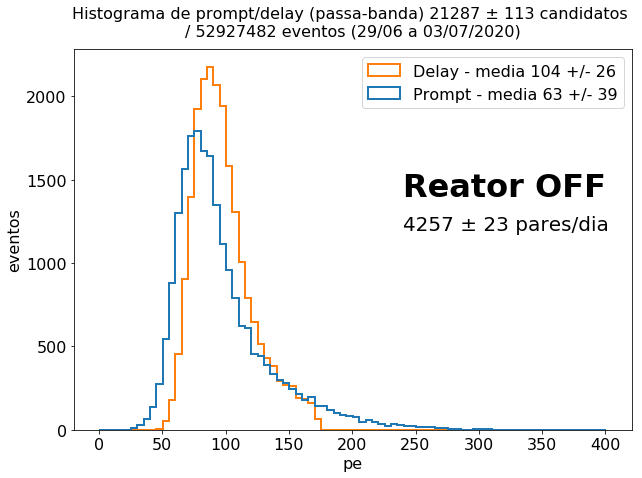

In [19]:
maxElement = int(np.amax(h_PDP_OFF)/5)

fig=plt.figure(figsize=(10,7))

plt.rcParams.update({'font.size': 16})

plt.hist([h_PDP_OFF,h_PDD_OFF],bins=maxElement,histtype='step', linewidth=2, 
#                 weights=[h_PD_pPDF_OFF,h_PD_pPDF_OFF], 
                 weights=[list_wp_off,list_wp_off],
                 label=['Prompt - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDP_OFF),np.std(h_PDP_OFF)),
                        'Delay - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDD_OFF),np.std(h_PDD_OFF))
                       ])
plt.legend(loc='upper right')
plt.text(240, 1400, 'Reator OFF', fontsize=32, fontweight='bold')
plt.text(240, 1200, '{:.0f} \u00B1 {:.0f} pares/dia'.format(sum(list_wp_off)/5,sum(list_sig_off)/(sum(list_wp_off)**0.5)/5),
         fontsize=20)

plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de prompt/delay (passa-banda) {:.0f} \u00B1 {:.0f} candidatos \n/ {:d} eventos (29/06 a 03/07/2020)'.
          format(sum(list_wp_off),sum(list_sig_off)/(sum(list_wp_off)**0.5),int(totalNonSat_OFF)), size=16,y=1.02)
          #format(sum(h_PD_pPDF_OFF),int(totalNonSat_OFF)), size=16,y=1.02)
          
plt.savefig('histogramas/Hist_PD_OFF_Simulation_PB.png')
plt.show()

80


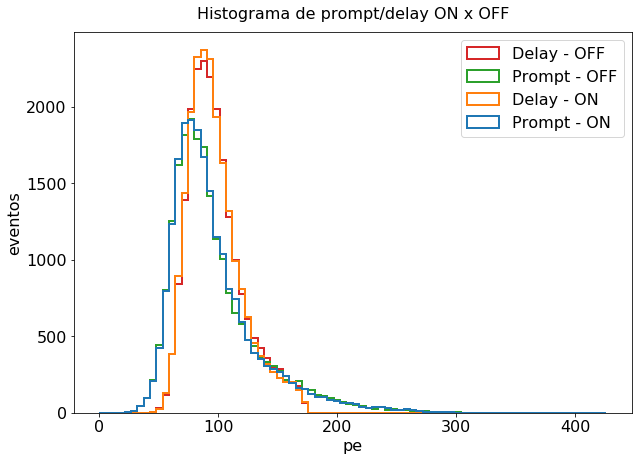

In [25]:

maxElement = int(np.amax(h_PDP_OFF)/5)
print(maxElement)

fig=plt.figure(figsize=(10,7))

plt.rcParams.update({'font.size': 16})

plt.hist([h_PDP_ON,h_PDD_ON,h_PDP_OFF,h_PDD_OFF],bins=maxElement,histtype='step', linewidth=2, 
                 weights=[list_wp,list_wp,list_wp_off,list_wp_off],
                 label=['Prompt - ON',
                        'Delay - ON',
                        'Prompt - OFF',
                        'Delay - OFF'])
'''
plt.hist([h_PDP_ON,h_PDD_ON],bins=maxElement,histtype='step', linewidth=2, 
                 weights=[list_wp,list_wp],
                 label=['Prompt - ON',
                        'Delay - ON'])
'''
                       
plt.legend(loc='upper right')

plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de prompt/delay ON x OFF', size=16,y=1.02)
          #format(sum(h_PD_pPDF_OFF),int(totalNonSat_OFF)), size=16,y=1.02)
          
plt.savefig('histogramas/Hist_PD_ON_X_OFF_Simulation_PB.png')
plt.show()

In [54]:
#print(np.std(h_PDP_ON))
#print(np.std(h_PDD_ON))
#print(np.std(h_PDP_OFF))
#print(np.std(h_PDD_OFF))

print(np.amin(h_PDP_ON))
print(np.amin(h_PDD_ON))
print(np.amin(h_PDP_OFF))
print(np.amin(h_PDD_OFF))

print(len(h_PDP_ON))
print(len(h_PDD_ON))
print(len(h_PDP_OFF))
print(len(h_PDD_OFF))

print(150/21261)

63.13494099538225
46.35710620831196
63.13494099538225
45.523345305284764
21261
21261
21105
21105
0.007055171440666008


In [42]:
histd_ON, binsd_ON = np.histogram(h_PDP_ON, bins=maxElement, normed= True)
#print(histd_ON)
#print(binsd_ON)
#print(np.diff(binsd_ON)) ## esta função traz o tamanho em cada bin
sigma_day = ( ( (np.std(cday_PD_ON)/(5**0.5))**2 + (np.std(cday_PD_OFF)/(5**0.5))**2 )**0.5   )

#sigma_day = ( ( (np.std(cday_NSat_ON)/(5**0.5))**2 + (np.std(cday_NSat_OFF)/(5**0.5))**2 )**0.5   )

#print(sigma_day)
#print(np.diff(binsd_ON)*histd_ON*sigma_day)
#print(sum(np.diff(binsd_ON)*histd_ON*sigma_day))
errbar_sigma_day = np.diff(binsd_ON)*histd_ON*sigma_day
print(errbar_sigma_day)

[7.9052604  7.50244459 6.94469961 6.25526485 5.51547811 5.52322456
 4.76407168 4.39998815 3.48977933 3.15668164 2.98625956 2.46724688
 2.18062793 2.00633263 1.73133337 1.63062941 1.23943328 1.16584193
 1.014786   0.91408205 0.82499778 0.81725132 0.76689934 0.76689934
 0.6545757  0.6003505  0.54612529 0.42218196 0.42218196 0.47253394
 0.31373155 0.27499926 0.35633707 0.22852051 0.2401402  0.20915437
 0.22852051 0.13943624 0.19753468 0.1471827  0.16267562 0.10845041
 0.09683073 0.10070395 0.12781656 0.08521104 0.0929575  0.08133781
 0.06971812]


49
63.13494099538225
[-11  90  51 -30   2  99 -52  41 -43  18  54   9  25  68 -23  57 -11 -14
 -36 -28 -33   3 -11   2   4   0  13 -42 -13  14 -18 -34  23 -13 -11  -5
  -3 -13  15  -9   4  -4   2   5   8  -7   8   7  -2   0]
[7.9052604  7.50244459 6.94469961 6.25526485 5.51547811 5.52322456
 4.76407168 4.39998815 3.48977933 3.15668164 2.98625956 2.46724688
 2.18062793 2.00633263 1.73133337 1.63062941 1.23943328 1.16584193
 1.014786   0.91408205 0.82499778 0.81725132 0.76689934 0.76689934
 0.6545757  0.6003505  0.54612529 0.42218196 0.42218196 0.47253394
 0.31373155 0.27499926 0.35633707 0.22852051 0.2401402  0.20915437
 0.22852051 0.13943624 0.19753468 0.1471827  0.16267562 0.10845041
 0.09683073 0.10070395 0.12781656 0.08521104 0.0929575  0.08133781
 0.06971812]


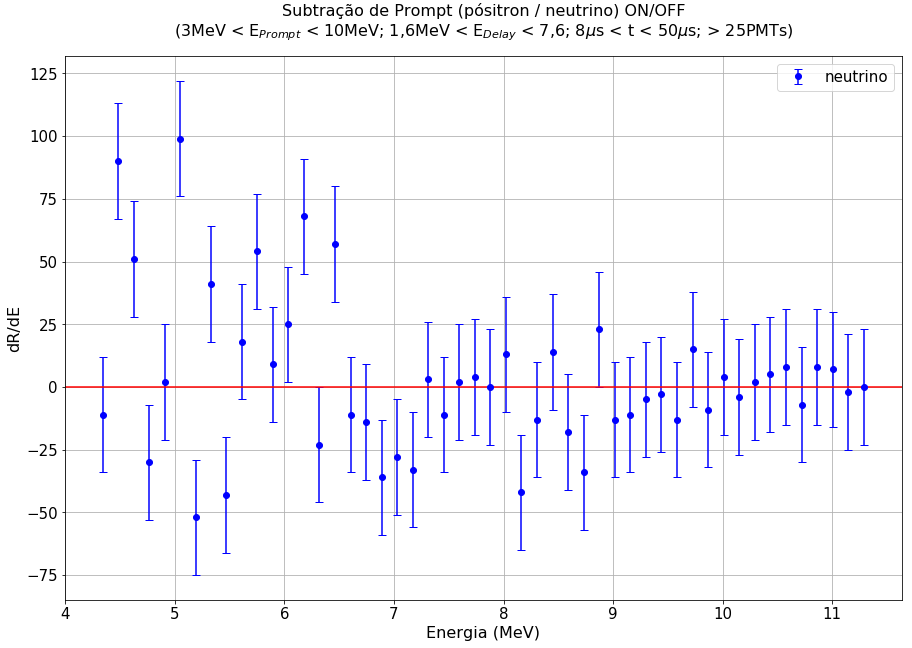

In [55]:

maxElement = int(np.amax(h_PDP_OFF)/5)
print(maxElement)

fig=plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 15})


hist1_ON, bins1_ON = np.histogram(h_PDP_ON, bins=maxElement)
hist2_ON, bins2_ON = np.histogram(h_PDD_ON, bins=maxElement)
hist3_ON = hist1_ON + hist2_ON

print(np.amin(bins1_ON))
### E_neutrino = raiz(E_positron^2 + 0,511^2) + 1,3

#print(hist3_ON)

hist1_OFF, bins1_OFF = np.histogram(h_PDP_OFF, bins=maxElement)
hist2_OFF, bins2_OFF = np.histogram(h_PDD_OFF, bins=maxElement)
hist3_OFF = hist1_OFF + hist2_OFF

#print(hist3_OFF)

#diff_hist = hist3_ON - hist3_OFF
diff_hist = hist1_ON - hist1_OFF  # somente com prompt que está relacionado com a energia do neutrino

diff_hist2 = np.append(diff_hist, [0])

print(diff_hist2)
errbar_sigma_day = np.diff(binsd_ON)*histd_ON*sigma_day
print(errbar_sigma_day)
errbar_sigma_day = np.append(errbar_sigma_day, [1])
#print(hist2_OFF)
#print(fnt_pe2MeV(bins2_OFF))

#plt.plot(diff_hist,bins=maxElement,histtype='step') ##, bins2_OFF)
#plt.bar(fnt_pe2MeV(bins2_OFF),diff_hist2) ##, bins2_OFF)
## erro de contagem por dia: 23

#plt.errorbar(fnt_pe2MeV(bins1_OFF),diff_hist2, yerr=errbar_sigma_day, marker='o', color='blue', linestyle='None', capsize=4, label='positron')
#plt.errorbar(fnt_Positron2Neutrino(fnt_pe2MeV(bins1_OFF)),diff_hist2, yerr=errbar_sigma_day, marker='o', color='orange', 
#             linestyle='None', capsize=4, label='neutrino')

plt.errorbar(fnt_Positron2Neutrino(fnt_pe2MeV(bins1_OFF)),diff_hist2, yerr=23 , marker='o', color='blue', 
             linestyle='None', capsize=4, label='neutrino')

#plt.hist([h_PDP_ON,h_PDD_ON,h_PDP_OFF,h_PDD_OFF],bins=maxElement,histtype='step', linewidth=2, 
#                 weights=[list_wp,list_wp,list_wp_off,list_wp_off],
#                 label=['Prompt - ON',
#                        'Delay - ON',
#                        'Prompt - OFF',
#                        'Delay - OFF'])
plt.legend(loc='upper right')
plt.grid(True)
plt.axhline(0,color='red')

plt.ylabel('dR/dE', size=16)
plt.xlabel('Energia (MeV)', size=16)
plt.title('Subtração de Prompt (pósitron / neutrino) ON/OFF\n'+r'(3MeV < E$_{Prompt}$ < 10MeV; 1,6MeV < E$_{Delay}$ < 7,6; 8$\mu$s < t < 50$\mu$s; > 25PMTs)', size=16,y=1.02)
          #format(sum(h_PD_pPDF_OFF),int(totalNonSat_OFF)), size=16,y=1.02)
          
plt.savefig('histogramas/Hist_PD_ON_X_OFF_Subtrac.png')
plt.show()

In [51]:
print(sum(diff_hist2))
print(sum(diff_hist2[:16]))

156
355


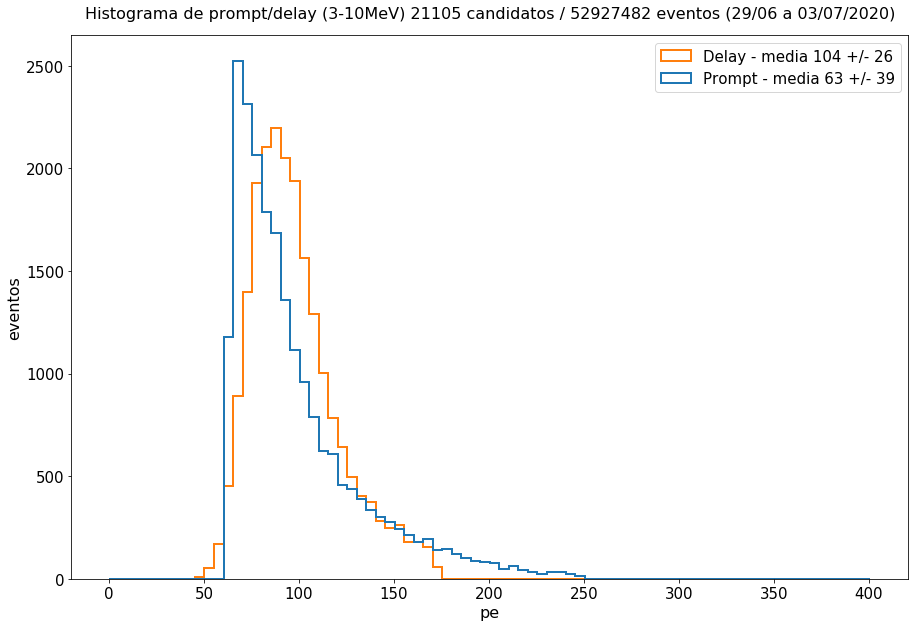

In [102]:
maxElement = int(np.amax(h_PDP_OFF)/5)

fig=plt.figure(figsize=(15,10))

plt.hist([h_PDP_OFF,h_PDD_OFF],bins=maxElement,histtype='step', linewidth=2, 
#                 weights=[h_PD_pPDF_OFF,h_PD_pPDF_OFF], 
                 weights=[list_wp2_off,list_wp2_off],
                 label=['Prompt - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDP_OFF),np.std(h_PDP_OFF)),
                        'Delay - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDD_OFF),np.std(h_PDD_OFF))
                       ])
plt.legend(loc='upper right')

plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de prompt/delay (3-10MeV) {:.0f} candidatos / {:d} eventos (29/06 a 03/07/2020)'.
          format(sum(list_wp2_off),int(totalNonSat_OFF)), size=16,y=1.02)
          #format(sum(h_PD_pPDF_OFF),int(totalNonSat_OFF)), size=16,y=1.02)
          
plt.savefig('histogramas/Hist_PD_OFF_Simulation.png')
plt.show()

In [29]:
rh, rw = 200, 200
t_subPD_OFF = [[0.0 for x in range(rw)] for y in range(rh)]  

print('Inicio',datetime.datetime.now())

for index1 in range(len(h_PDP_OFF)):
    i=int(h_PDP_OFF[index1]) #prompt int energy
    j=int(h_PDD_OFF[index1]) #delay int energy
    if (i<rw)and(j<rh):
        t_subPD_OFF[j][i]+=list_wp_off[index1]
    
print('Fim',datetime.datetime.now())


Inicio 2022-07-16 11:02:23.611015
Fim 2022-07-16 11:02:24.032899


17.39200208371251
0.0


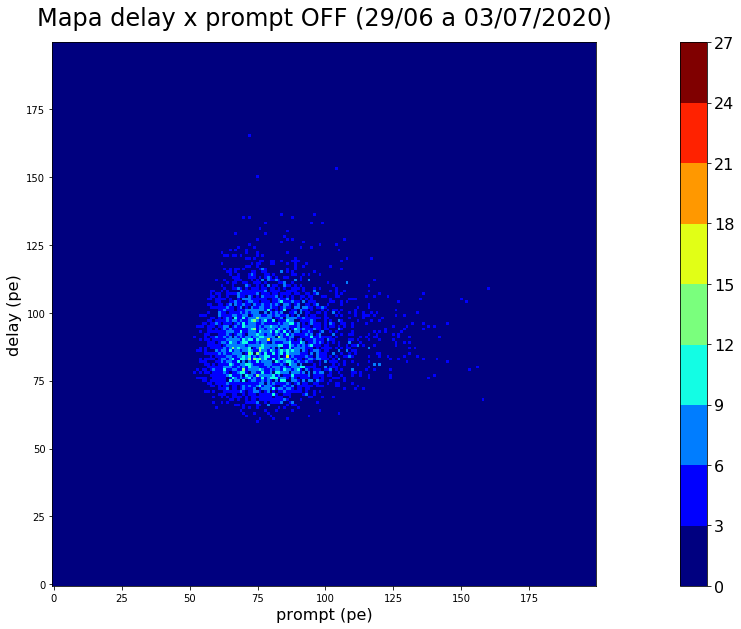

In [30]:
from matplotlib.colors import BoundaryNorm

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
print(np.max(t_subPD_OFF))
print(np.min(t_subPD_OFF))
bounds = np.linspace(np.min(t_subPD_OFF),np.max(t_subPD_OFF),7)
bounds = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
norm = BoundaryNorm(bounds, cmap.N)

fig=plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 16})

myplot=plt.imshow(t_subPD_OFF,interpolation='none',norm=norm,cmap=cmap,origin='lower')
plt.colorbar(myplot) #, format='%.00e')

plt.xlabel('prompt (pe)', size=16)
plt.ylabel('delay (pe)', size=16)
plt.title('Mapa delay x prompt OFF (29/06 a 03/07/2020)', size=24,y=1.02)
plt.savefig('histogramas/Mapa-delay-prompt-OFF-Simulation.png')
plt.show()

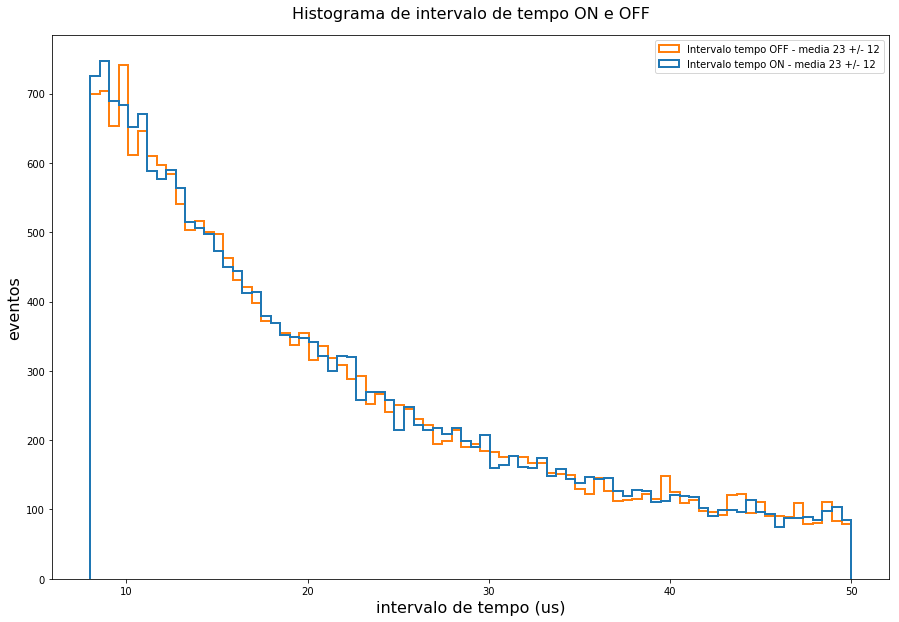

In [28]:
maxElement = int(np.amax(h_PDP_OFF)/5)

fig=plt.figure(figsize=(15,10))

plt.hist([h_PDT_ON,h_PDT_OFF],bins=maxElement,histtype='step', linewidth=2, weights=[list_wp,list_wp_off],
                 label=['Intervalo tempo ON - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDT_ON),np.std(h_PDT_ON)),
                        'Intervalo tempo OFF - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDT_OFF),np.std(h_PDT_OFF))
                       ])
#plt.hist(h_PDT_OFF,bins=maxElement,histtype='step', linewidth=2, weights=list_wp_off,
#                 label=[
#                        'Intervalo tempo OFF - media {:.0f} +/- {:.0f} us'.format(np.mean(h_PDT_OFF),np.std(h_PDT_OFF))
#                       ])
plt.legend(loc='upper right')

plt.ylabel('eventos', size=16)
plt.xlabel('intervalo de tempo (us)', size=16)
plt.title('Histograma de intervalo de tempo ON e OFF'
          #.format(len(h_PDP_OFF),int(totalPositrons_OFF))
          , size=16,y=1.02)
plt.savefig('histogramas/Hist_PD_Time_Simulation.png')
plt.show()

### Forecasting diário

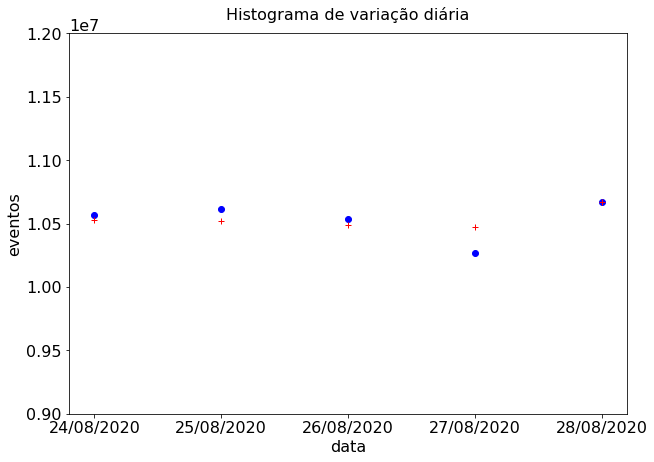

In [49]:
#print(count_day_ON)

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
#ax.set_yscale('log')
ax.set_ylim([0.9e7, 1.2e7])
#ax.set_xlim([0, 8])


plt.plot('24/08/2020',count_day_ON[0],'bo')
plt.plot('24/08/2020',(count_day_ON[0]+count_day_ON[1]+count_day_ON[2]+count_day_ON[3]+count_day_ON[4])/5,'r+')
plt.plot('25/08/2020',count_day_ON[1],'bo')
plt.plot('25/08/2020',(count_day_ON[1]+count_day_ON[2]+count_day_ON[3]+count_day_ON[4])/4,'r+')
plt.plot('26/08/2020',count_day_ON[2],'bo')
plt.plot('26/08/2020',(count_day_ON[2]+count_day_ON[3]+count_day_ON[4])/3,'r+')
plt.plot('27/08/2020',count_day_ON[3],'bo')
plt.plot('27/08/2020',(count_day_ON[3]+count_day_ON[4])/2,'r+')
plt.plot('28/08/2020',count_day_ON[4],'bo')
plt.plot('28/08/2020',count_day_ON[4],'r+')

plt.ylabel('eventos', size=16)
plt.xlabel('data', size=16)
plt.title('Histograma de variação diária', size=16,y=1.02)
plt.savefig('histogramas/Hist_Diario_ON.png')
plt.show()


# Criação dos totais por dia e armazenamento

In [15]:
print('Inicio',datetime.datetime.now())

h_PDP_ON = []
h_PDD_ON = []
h_PDT_ON = []
totalPositrons_ON = 0
totalNonSat_ON = 0
i_day = 0
Freq10_200_day_ON = 0

#for sListDt in list_ONOFF:
#    if (i_day==0):
#        i_day+=1
#        continue
for sListDt in list_ONOFF2:
        
    h_PDP_ON = []
    h_PDD_ON = []
    h_PDT_ON = []
    totalPositrons_ON = 0
    totalNonSat_ON = 0
    Freq10_200_day_ON = 0

    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)

    for file in lista:
        df = pd.read_parquet(file)
        dff = df[(df['p_satured']==0)&(df['d_satured']==0)
              #              &(fnt_pe2MeV(df['p_Total_pe'])>=3)&(fnt_pe2MeV(df['p_Total_pe'])<=10)
                            &(fnt_pe2MeV(df['d_Total_pe'])>=1.6)&(fnt_pe2MeV(df['d_Total_pe'])<=7.12)
                            &(df['d_timeInverval']>=8)&(df['d_timeInverval']<=50)
                            &(df['d_mPMTs']>=25)
                ]
        h_PDP_ON.extend(dff['p_Total_pe'].values)
        h_PDD_ON.extend(dff['d_Total_pe'].values)
        h_PDT_ON.extend(dff['d_timeInverval'].values)

        ## aqui farei a contagem diaria de pares viáveis (acima) e também Freq 10-200pe/dia
        dfc = df[(df['p_satured']==0)&(df['d_satured']==0)
                 &(df['p_Total_pe']>=10)&(df['p_Total_pe']<=200)
                ]
        
        Freq10_200_day_ON += dfc.count()[0]
        totalPositrons_ON += df.count()[0]
        totalNonSat_ON += df[(df['p_satured']==0)&(df['d_satured']==0)].count()[0]
        #break

    # dictionary of lists
    dict = {'h_PDP_ONOFF': h_PDP_ON,
            'h_PDD_ONOFF': h_PDD_ON,
            'h_PDT_ONOFF': h_PDT_ON}
 
    # creating a dataframe from dictionary
    dfw = pd.DataFrame(dict)
    dfw.to_parquet(sDir+'/PD'+sDate+'.parq', compression='gzip')

    print('Subotal de registros: '+str(len(h_PDP_ON)))
    del dict
        
    # dictionary of lists
    dict = {'len_h_PDP': [len(h_PDP_ON)],
            'Freq10_200_day_NS': [Freq10_200_day_ON],
            'totalPositrons_day': [totalPositrons_ON],
            'totalNonSat': [totalNonSat_ON]}
 
    # creating a dataframe from dictionary
    dfw2 = pd.DataFrame(dict)
    dfw2.to_parquet(sDir+'/counts_'+sDate+'.parq', compression='gzip')

    del dict
        
    i_day += 1
    #break
                                    
print('Fim',datetime.datetime.now())


Inicio 2022-08-02 16:06:15.242171
data/20200710
Subotal de registros: 10220
data/20200715
Subotal de registros: 10402
data/20200720
Subotal de registros: 10288
data/20200725
Subotal de registros: 10093
data/20200801
Subotal de registros: 9959
data/20200805
Subotal de registros: 10137
data/20200810
Subotal de registros: 10476
data/20200815
Subotal de registros: 10472
data/20200816
Subotal de registros: 10803
data/20200817
Subotal de registros: 10732
data/20200818
Subotal de registros: 11040
data/20200819
Subotal de registros: 10633
data/20200820
Subotal de registros: 10191
data/20200821
Subotal de registros: 10094
data/20200822
Subotal de registros: 9867
data/20200823
Subotal de registros: 10757
data/20200824
Subotal de registros: 10997
data/20200825
Subotal de registros: 10614
data/20200826
Subotal de registros: 10492
data/20200827
Subotal de registros: 10405
data/20200828
Subotal de registros: 11421
Fim 2022-08-02 18:05:02.201133


In [5]:
print('Inicio',datetime.datetime.now())

h_PDP_ONOFF = []
h_PDD_ONOFF = []
h_PDT_ONOFF = []
totalPositrons = []
totalNonSat = []
i_day = 0
Freq10_200_day_NS = []
len_h_PDP = []

list_ONOFF_i = []
print(len(list_ONOFF_i))
list_ONOFF_i.extend(list_ONOFF)
print(len(list_ONOFF_i))
list_ONOFF_i.extend(list_ONOFF2)
print(len(list_ONOFF_i))

for sListDt in list_ONOFF_i:
#    h_PDP_ONOFF = []
#    h_PDD_ONOFF = []
#    h_PDT_ONOFF = []
#    totalPositrons = 0
#    totalNonSat = 0
#    Freq10_200_day_NS = 0
#    len_h_PDP = 0

    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    file1 = sDir + '/PD'+sDate+'.parq'
    df1 = pd.read_parquet(file1)
    h_PDP_ONOFF.append(df1['h_PDP_ONOFF'].values)
    h_PDD_ONOFF.append(df1['h_PDD_ONOFF'].values)
    h_PDT_ONOFF.append(df1['h_PDT_ONOFF'].values)

    file2 = sDir + '/counts_'+sDate+'.parq'
    df2 = pd.read_parquet(file2)
    
    len_h_PDP.append(df2['len_h_PDP'].values[0])
    totalPositrons.append(df2['totalPositrons_day'].values[0])
    totalNonSat.append(df2['totalNonSat'].values[0])
    Freq10_200_day_NS.append(df2['Freq10_200_day_NS'].values[0])

    #plt.plot(sDate, totalPositrons,'bo')
    
    i_day += 1
    #break

    #print(len(h_PDP_ONOFF))
    #print(len(h_PDD_ONOFF))
    #print(len(h_PDT_ONOFF))
    
    '''
    print(len_h_PDP)
    print('  Total dia: ',totalPositrons)
    print('  Em Hz: ',totalPositrons/86400) 
    print('  Total dia (NS): ',totalNonSat)
    print('  Em Hz (NS): ',totalNonSat/86400) 
    print('  Total dia (Freq 10 - 200): ',Freq10_200_day_NS)
    print('  Em Hz (NS): ',Freq10_200_day_NS/86400) 
    '''

print('Fim',datetime.datetime.now())


Inicio 2023-01-07 12:19:09.236752
0
21
42
data/20200615
data/20200616
data/20200617
data/20200618
data/20200619
data/20200620
data/20200621
data/20200622
data/20200623
data/20200624
data/20200625
data/20200626
data/20200627
data/20200628
data/20200629
data/20200630
data/20200701
data/20200702
data/20200703
data/20200704
data/20200705
data/20200710
data/20200715
data/20200720
data/20200725
data/20200801
data/20200805
data/20200810
data/20200815
data/20200816
data/20200817
data/20200818
data/20200819
data/20200820
data/20200821
data/20200822
data/20200823
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Fim 2023-01-07 12:19:13.141058


In [6]:
#adaptar para diário

list_wp_onoff = []   #peso pelo passa-banda
list_wp2_onoff = []  #corte seco entre 3 - 10MeV
count_passa_banda = []
count_3x10MeV = []
i = 0 
s = 0.0
c = 0

ii = 0
#print(len(h_PDP_ONOFF))
#print(len(list_ONOFF_i))
#print(list_ONOFF_i)
#print(h_PDP_ONOFF[70])

for sDate_i in list_ONOFF_i:
    for a in h_PDP_ONOFF[ii]:
        #print(a)
        p = fnt_fit_passabanda(a)
        list_wp_onoff.append(p)
    
        if (fnt_pe2MeV(a)>=3)&(fnt_pe2MeV(a)<=10):
            list_wp2_onoff.append(1)
            c += 1
        else:
            list_wp2_onoff.append(0)
        s +=p

    count_passa_banda.append(s)
    count_3x10MeV.append(c)
    ii +=1
    s = 0.0
    c = 0

#print('Soma eventos inteiros',i)
print('Soma eventos fracionários',s)
print('soma passabanda',sum(list_wp_onoff))
print('soma entre 3 e 10MeV',sum(list_wp2_onoff))
print('matriz passa banda',count_passa_banda)
print('matriz 3 x 10 MeV',count_3x10MeV)

Soma eventos fracionários 0.0
soma passabanda 173799.51187686925
soma entre 3 e 10MeV 172578
matriz passa banda [3860.647387276987, 3911.3600934118986, 3977.860803270898, 4170.98814874245, 4267.288712744968, 4071.7373584571446, 3993.263663045136, 4170.071885120567, 4187.799929912664, 4129.621312483962, 4293.389569118172, 4367.076764587834, 4001.9089392948936, 4053.5585508565373, 4200.810006475457, 4354.962684277736, 4305.928023995872, 4107.582720687141, 4318.029898641649, 4198.930116036737, 4249.405297889427, 4020.105732848701, 4156.215890596393, 4052.3859134684394, 3849.76448530807, 3911.846580710451, 3925.406105409915, 4098.427697715165, 4143.03816385698, 4126.128617987908, 4243.518521872685, 4457.195547725779, 4219.246991825323, 3977.225761410683, 3961.393651426802, 3886.5441280686077, 4180.408488083698, 4291.056352184618, 4281.144984264592, 4165.401693635394, 4128.856595483397, 4531.978106641448]
matriz 3 x 10 MeV [3830, 3877, 3964, 4141, 4213, 4041, 3935, 4152, 4160, 4089, 4278, 4

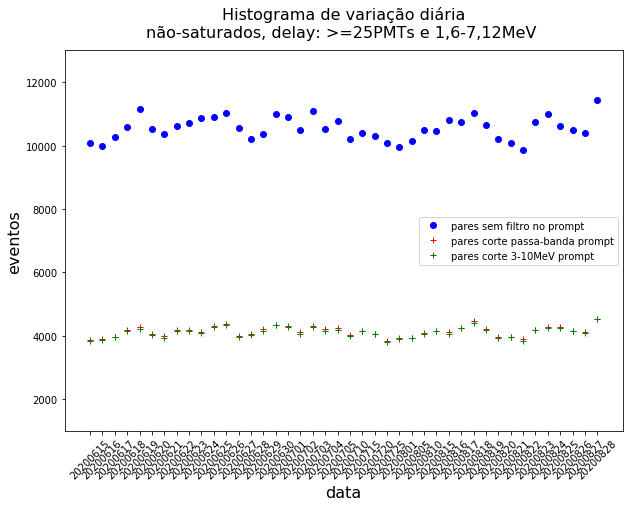

In [7]:
#print(count_day_ON)

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ax.set_ylim([1000, 13000])
ax.tick_params(axis='x', labelrotation=45)


#ax.set_yscale('log')
#ax.set_ylim([0.9e7, 1.2e7])
#ax.set_xlim([0, 8])

ii = 0

for sDate_i in list_ONOFF_i:
    if ii==0:
        plt.plot(sDate_i, len_h_PDP[ii],'bo', label = 'pares sem filtro no prompt')
        plt.plot(sDate_i, count_passa_banda[ii],'r+', label = 'pares corte passa-banda prompt')
        plt.plot(sDate_i, count_3x10MeV[ii],'g+', label = 'pares corte 3-10MeV prompt')
    else:
        plt.plot(sDate_i, len_h_PDP[ii],'bo')
        plt.plot(sDate_i, count_passa_banda[ii],'r+')
        plt.plot(sDate_i, count_3x10MeV[ii],'g+')
        
    ii+=1

#label=['Prompt - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDP_OFF),np.std(h_PDP_OFF)),
#       'Delay - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDD_OFF),np.std(h_PDD_OFF))]

plt.legend(loc='center right')

plt.ylabel('eventos', size=16)
plt.xlabel('data', size=16)
plt.title('Histograma de variação diária\nnão-saturados, delay: >=25PMTs e 1,6-7,12MeV ', size=16,y=1.02)
#plt.subtitle('cortes: não-saturados, delay: 25PMTs e 1,6-7,12MeV ')
plt.savefig('histogramas/Hist_Diario_ONOFF.png')
plt.show()


In [14]:
#err_day = []
#for sDate_i in list_ONOFF_i:
    
err_day = [100 for j in list_ONOFF_i]
print(err_day)
    

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


No handles with labels found to put in legend.


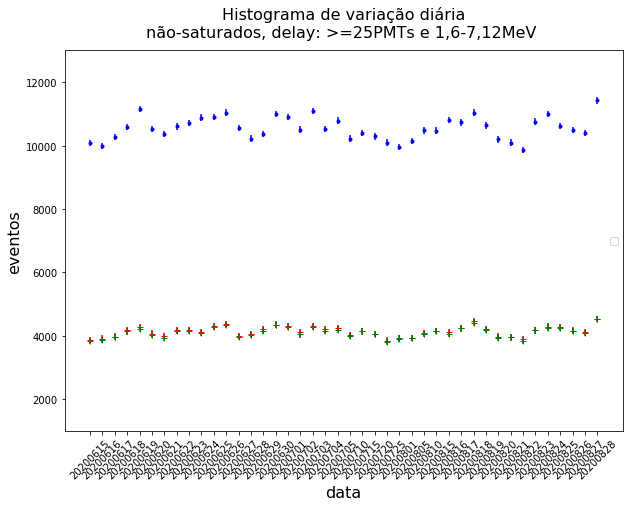

In [21]:
#print(count_day_ON)

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ax.set_ylim([1000, 13000])
ax.tick_params(axis='x', labelrotation=45)


#ax.set_yscale('log')
#ax.set_ylim([0.9e7, 1.2e7])
#ax.set_xlim([0, 8])

ii = 0

plt.errorbar(list_ONOFF_i, len_h_PDP, yerr = err_day, fmt='.', color='b') # label = 'pares sem filtro no prompt')
plt.errorbar(list_ONOFF_i, count_passa_banda, yerr = error_day, fmt = '+', color = 'r') #label = 'pares corte passa-banda prompt')
plt.errorbar(list_ONOFF_i, count_3x10MeV, yerr = error_day, fmt = '+', color='g') #label = 'pares corte 3-10MeV prompt')


#label=['Prompt - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDP_OFF),np.std(h_PDP_OFF)),
#       'Delay - media {:.0f} +/- {:.0f}'.format(np.mean(h_PDD_OFF),np.std(h_PDD_OFF))]

plt.legend(loc='center right')

plt.ylabel('eventos', size=16)
plt.xlabel('data', size=16)
plt.title('Histograma de variação diária\nnão-saturados, delay: >=25PMTs e 1,6-7,12MeV ', size=16,y=1.02)
#plt.subtitle('cortes: não-saturados, delay: 25PMTs e 1,6-7,12MeV ')
plt.savefig('histogramas/Hist_Diario_ONOFF_err.png')
plt.show()


## Teste chi^2 rejeitado

In [4]:
print('Inicio',datetime.datetime.now())
h_promptN_ChiON = []
h_delayN_ChiON = []
h_timeN_ChiON = []

print('chi^2 tabelado', chi_sq_tab)

for sListDt in list_ON:
    #print(sListDt)
    #print(sListDt[6:8])
    yyyy=int(sListDt[0:4]); mm=int(sListDt[4:6]); dd=int(sListDt[6:8])
    
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    print(sDir)
    lista = find_interval_date_pair(sDate,sDate,sDir)
    #print(lista)
    #break

    for file in lista:
        df = pd.read_parquet(file)
        #print(file)
        h_promptN_ChiON.extend(df[((df['chi_square']>=chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['p_Total_pe'].values)
        
        h_delayN_ChiON.extend(df[((df['chi_square']>=chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_Total_pe'].values)

        h_timeN_ChiON.extend(df[((df['chi_square']>=chi_sq_tab)&
                                 (df['p_satured']==0)&(df['d_satured']==0)
                                )]['d_timeInverval'].values)

    
print('Fim',datetime.datetime.now())

Inicio 2023-05-15 15:02:54.367891
chi^2 tabelado 7.815
data/20200824
data/20200825
data/20200826
data/20200827
data/20200828
Fim 2023-05-15 15:17:04.813654


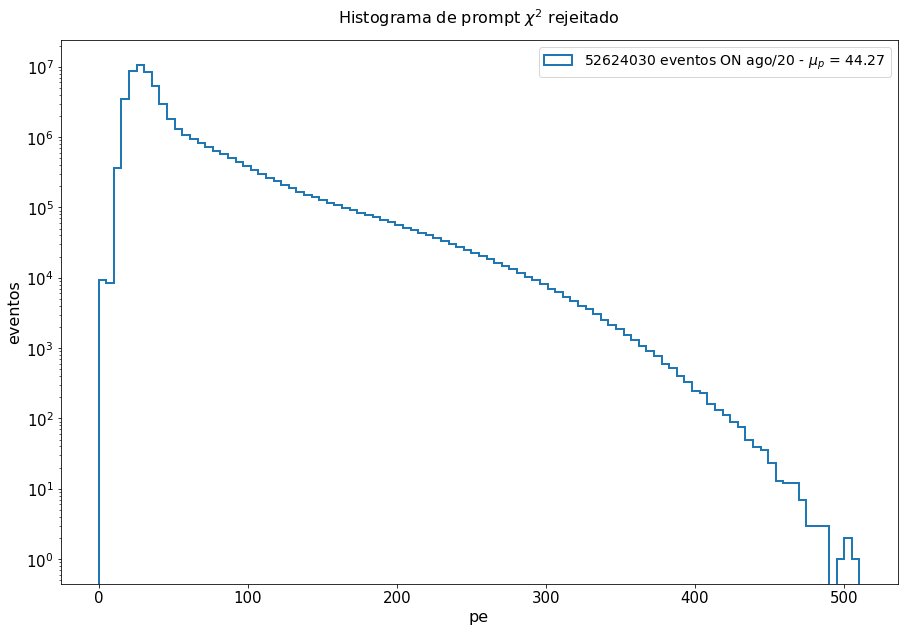

In [8]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 110])
plt.rcParams.update({'font.size': 15})
ax.set_yscale('log')

plt.hist([#h_promptChiON2,
          #h_promptChiOFF,
          h_promptN_ChiON],#], 
         bins = 100,
         histtype='step', linewidth=2) 

plt.legend(labels=[#str(len(h_promptChiON2))+' eventos ON jun/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptChiON2)),
                   #str(len(h_promptChiOFF))+' eventos OFF jun/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptChiOFF)),
                   str(len(h_promptN_ChiON))+' eventos ON ago/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptN_ChiON))],
           loc='upper right', fontsize=14)
plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de prompt $\chi^2$ rejeitado', size=16,y=1.02)
plt.savefig('histogramas/Hist_Prompt_chi2_Rejeitado.png')
plt.show() 

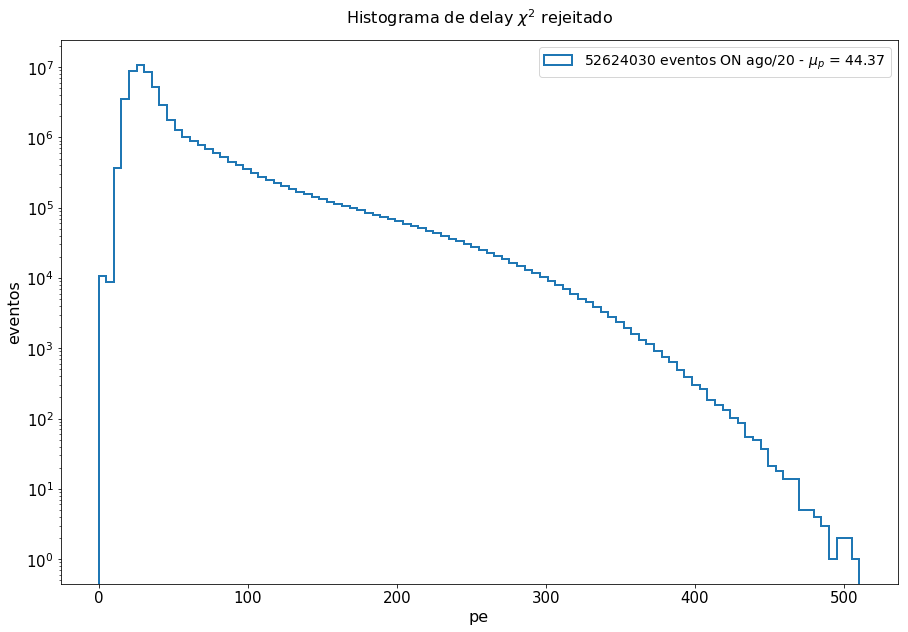

In [10]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 110])
plt.rcParams.update({'font.size': 15})
ax.set_yscale('log')

plt.hist([#h_promptChiON2,
          #h_promptChiOFF,
          h_delayN_ChiON],#], 
         bins = 100,
         histtype='step', linewidth=2) 

plt.legend(labels=[#str(len(h_promptChiON2))+' eventos ON jun/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptChiON2)),
                   #str(len(h_promptChiOFF))+' eventos OFF jun/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptChiOFF)),
                   str(len(h_delayN_ChiON))+' eventos ON ago/20 - $\mu_d$ = {0:.2f}'.format(np.average(h_delayN_ChiON))],
           loc='upper right', fontsize=14)
plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de delay $\chi^2$ rejeitado', size=16,y=1.02)
plt.savefig('histogramas/Hist_Delay_chi2_Rejeitado.png')
plt.show() 

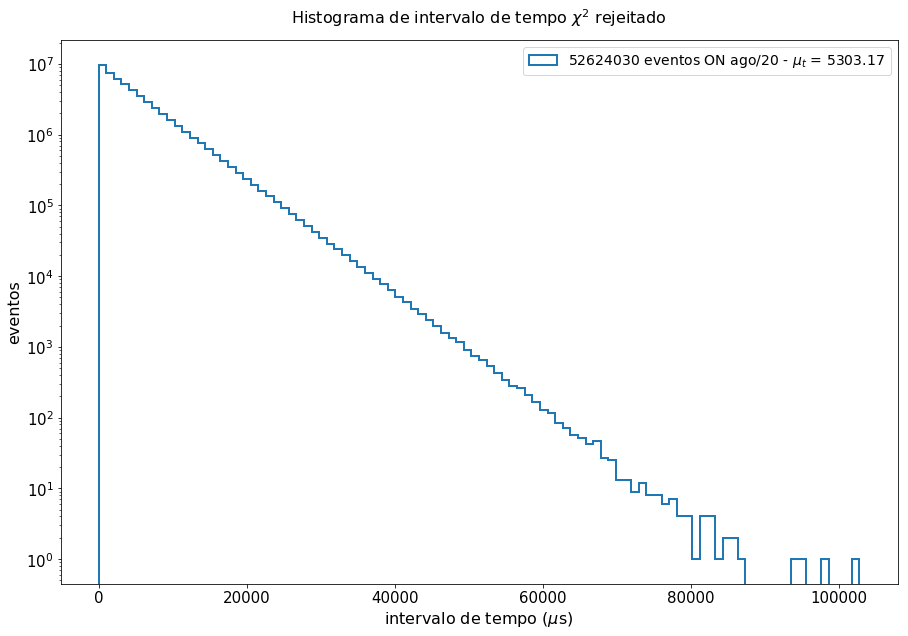

In [13]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 110])
plt.rcParams.update({'font.size': 15})
ax.set_yscale('log')

plt.hist([#h_promptChiON2,
          #h_promptChiOFF,
          h_timeN_ChiON],#], 
         bins = 100,
         histtype='step', linewidth=2) 

plt.legend(labels=[#str(len(h_promptChiON2))+' eventos ON jun/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptChiON2)),
                   #str(len(h_promptChiOFF))+' eventos OFF jun/20 - $\mu_p$ = {0:.2f}'.format(np.average(h_promptChiOFF)),
                   str(len(h_timeN_ChiON))+' eventos ON ago/20 - $\mu_t$ = {0:.2f}'.format(np.average(h_timeN_ChiON))],
           loc='upper right', fontsize=14)
plt.ylabel('eventos', size=16)
plt.xlabel('intervalo de tempo ($\mu$s)', size=16)
plt.title('Histograma de intervalo de tempo $\chi^2$ rejeitado', size=16,y=1.02)
plt.savefig('histogramas/Hist_Time_chi2_Rejeitado.png')
plt.show() 